data-07-1-projects-collaboration-with-git: Data source - https://www.citibikenyc.com/system-data

Citi Bike is the nation's largest bike share program, with 13,000 bikes and over 850 stations across Manhattan, Brooklyn, Queens and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.
This bike sharing/rental program boost of many advantages and benefits as follows:
    - SAVE MONEY: $169/year --unlimited 45-minute rides on a classic bike. https://www.citibikenyc.com/pricing
    - SAVE TIME: a fun and affordable way to get around the city; a great alternative to the subway, taxis, buses, and walking.
    - HAVE FUN: ride with friends!
    - GET EXERCISE: biking is a low impact, aerobic exercise, even when just shooting the breeze.
    - GO GREEN: no CO2 emission and therefore, zero energy footprint at point of usage.

The data includes:
    Trip Duration (seconds)
    Start Time and Date
    Stop Time and Date
    Start Station Name
    End Station Name
    Station ID
    Station Lat/Long
    Bike ID
    User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
    Gender (Zero=unknown; 1=male; 2=female)
    Year of Birth
    
This study is limited to the Jersey City, NJ and New York City, NY Bike Share market.

In [1]:
# Modules
# The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell
# https://docs.python.org/2/library/glob.html
import os
import glob
import pandas as pd
import datetime
from time import strftime
from time import gmtime

# if necessary, change directory to "Resources" to retrieve CSV files
path = "../"
os.chdir(path)

wheres_my_path = os.getcwd()
print("Current working directory %s" %wheres_my_path)


Current working directory C:\


### Upload 2019 Citi Bike Share data for the Jersey City area and save to CSV file for upload to Postgres ###


In [220]:
# Set path where the csv files are stored and confirm the path
path = "JC_Resources"

# if necessary, change diectory to "Resources" to retrieve CSV files
os.chdir(path)

wheres_my_path = os.getcwd()
print("Current working directory: %s" %wheres_my_path)

Current working directory: C:\bike\JC_Resources


In [221]:
# Use python glob to match the file typev-‘csv’
extension = 'csv'
all_csv_files = [i for i in glob.glob('*.{}'.format(extension))]

# combine all files in the list to a dataframe
# Clear the existing index and reset it in the result by setting the ignore_index option to True.
JC_bike_df = pd.concat([pd.read_csv(f) for f in all_csv_files ], ignore_index=True)

# create a column to show the estimated user age as of December 31, 2019
curr_year = 2019
JC_bike_df['Est_User_Age'] = curr_year - JC_bike_df['birth year']

# create a column to calculate the trip duration in minutes
JC_bike_df['trip duration (mins)'] = JC_bike_df['tripduration']/60

# create a column to show the 'City' location
JC_bike_df['City']="JC"

# create a column to show the estimated user age as of December 31, 2019
curr_year = 2019
JC_bike_df['Est_User_Age'] = curr_year - JC_bike_df['birth year']

JC_bike_df.head()

tripduration                 starttime                  stoptime  \
0           201  2019-01-01 03:09:09.7110  2019-01-01 03:12:30.8790   
1           505  2019-01-01 05:18:00.1060  2019-01-01 05:26:25.9050   
2           756  2019-01-01 10:36:33.3400  2019-01-01 10:49:10.2600   
3          1575  2019-01-01 12:43:38.6430  2019-01-01 13:09:54.5280   
4          1566  2019-01-01 12:43:39.6010  2019-01-01 13:09:46.5100   

   start station id start station name  start station latitude  \
0              3183     Exchange Place               40.716247   
1              3183     Exchange Place               40.716247   
2              3183     Exchange Place               40.716247   
3              3183     Exchange Place               40.716247   
4              3183     Exchange Place               40.716247   

   start station longitude  end station id    end station name  \
0               -74.033459            3214    Essex Light Rail   
1               -74.033459            3638       Washington St   
2               -74.033459            3192  Liberty Light Rail   
3               -74.033459            3638       Washington St   
4               -74.033459            3638       Washington St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.712774             -74.036486   29612  Subscriber   
1             40.724294             -74.035483   29213  Subscriber   
2             40.711242             -74.055701   26164  Subscriber   
3             40.724294             -74.035483   29672    Customer   
4             40.724294             -74.035483   29522    Customer   

   birth year  gender  Est_User_Age  trip duration (mins) City  
0        1993       1            26              3.350000   JC  
1        1972       2            47              8.416667   JC  
2        1985       1            34             12.600000   JC  
3        1969       0            50             26.250000   JC  
4        1969       0            50             26.100000   JC

In [222]:
# Evaluate the data structure

# list the column names in the Jersey City Area data file
print("The column names and associated datatypes in the Jersey City Area data file are as follows: ")
JC_bike_df.dtypes

The column names and associated datatypes in the Jersey City Area data file are as follows: 


tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
Est_User_Age                 int64
trip duration (mins)       float64
City                        object
dtype: object

In [223]:
# get the number of rows/records in the file
number_of_rows = len(JC_bike_df)
print("Number of records in the Jersey City Area data file: %s" %number_of_rows)

Number of records in the Jersey City Area data file: 404947


In [224]:
# data clean-up: check for missing values
print("Are there any missing values in the Jersey City Area data: ")
JC_bike_df.isnull().any()

Are there any missing values in the Jersey City Area data: 


tripduration               False
starttime                  False
stoptime                   False
start station id           False
start station name         False
start station latitude     False
start station longitude    False
end station id             False
end station name           False
end station latitude       False
end station longitude      False
bikeid                     False
usertype                   False
birth year                 False
gender                     False
Est_User_Age               False
trip duration (mins)       False
City                       False
dtype: bool

In [225]:
# export back to a csv file for upload to postgres
JC_bike_df.to_csv( "../Output/JC_bike_df.csv", index=False, encoding='utf-8-sig', header=True)

In [227]:
# Set path where the csv files are stored and confirm the path
path = "../Output"

# if necessary, change diectory to "Resources" to retrieve CSV files
os.chdir(path)

wheres_my_path = os.getcwd()
print("Current working directory: %s" %wheres_my_path)

Current working directory: C:\bike\Output


In [228]:
# Import the JC_bike.csv file as a DataFrame
csv_path = "../Output/JC_bike_df.csv"
JC_bike_df = pd.read_csv(csv_path, encoding="utf-8")
JC_bike_df.head()

tripduration                 starttime                  stoptime  \
0           201  2019-01-01 03:09:09.7110  2019-01-01 03:12:30.8790   
1           505  2019-01-01 05:18:00.1060  2019-01-01 05:26:25.9050   
2           756  2019-01-01 10:36:33.3400  2019-01-01 10:49:10.2600   
3          1575  2019-01-01 12:43:38.6430  2019-01-01 13:09:54.5280   
4          1566  2019-01-01 12:43:39.6010  2019-01-01 13:09:46.5100   

   start station id start station name  start station latitude  \
0              3183     Exchange Place               40.716247   
1              3183     Exchange Place               40.716247   
2              3183     Exchange Place               40.716247   
3              3183     Exchange Place               40.716247   
4              3183     Exchange Place               40.716247   

   start station longitude  end station id    end station name  \
0               -74.033459            3214    Essex Light Rail   
1               -74.033459            3638       Washington St   
2               -74.033459            3192  Liberty Light Rail   
3               -74.033459            3638       Washington St   
4               -74.033459            3638       Washington St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.712774             -74.036486   29612  Subscriber   
1             40.724294             -74.035483   29213  Subscriber   
2             40.711242             -74.055701   26164  Subscriber   
3             40.724294             -74.035483   29672    Customer   
4             40.724294             -74.035483   29522    Customer   

   birth year  gender  Est_User_Age  trip duration (mins) City  
0        1993       1            26              3.350000   JC  
1        1972       2            47              8.416667   JC  
2        1985       1            34             12.600000   JC  
3        1969       0            50             26.250000   JC  
4        1969       0            50             26.100000   JC

In [229]:
# count the user-gender distribution: 1-male, 2-female and 0-undetermined
gender_count = JC_bike_df['gender'].value_counts()
gender_count

1    286406
2     92139
0     26402
Name: gender, dtype: int64

In [230]:
# Create a visualization of the gender distribuition of Citibike Share riders in the Jersey City Area
# total_bikers = (len(JC_bike_df['gender']))
male_bikers = JC_bike_df['gender'].value_counts()[1]
female_bikers = JC_bike_df['gender'].value_counts()[2]
others = JC_bike_df['gender'].value_counts()[0]
total_bikers = Male_bikers + Female_bikers + Others

# calculate for percent breakdown and store into new set of variables
pct_male = round((male_bikers/total_bikers) * 100,1)
pct_female = round((female_bikers / total_bikers) * 100,1)
pct_others = round((others / total_bikers) * 100,1)

print("Analysis of the Citibike Share Riders By Gender")
print("-----------")
print("Number of Male Citibike Share riders in the Jersey City Area: %s" %male_bikers)
print("Percentage of Male Citibike Share riders in the Jersey City Area: %s" %pct_male)
print("-----------")
print("Number of Female Citibike Share riders in the Jersey City Area: %s" %female_bikers)
print("Percentage of Male Citibike Share riders in the Jersey City Area: %s" %pct_female)
print("-----------")
print("Number of Other Citibike Share riders in the Jersey City Area: %s" %others)
print("Percentage of Other Citibike Share riders in the Jersey City Area: %s" %pct_others)
print("-----------")

Analysis of the Citibike Share Riders By Gender
-----------
Number of Male Citibike Share riders in the Jersey City Area: 286406
Percentage of Male Citibike Share riders in the Jersey City Area: 70.7
-----------
Number of Female Citibike Share riders in the Jersey City Area: 92139
Percentage of Male Citibike Share riders in the Jersey City Area: 22.8
-----------
Number of Other Citibike Share riders in the Jersey City Area: 26402
Percentage of Other Citibike Share riders in the Jersey City Area: 6.5
-----------


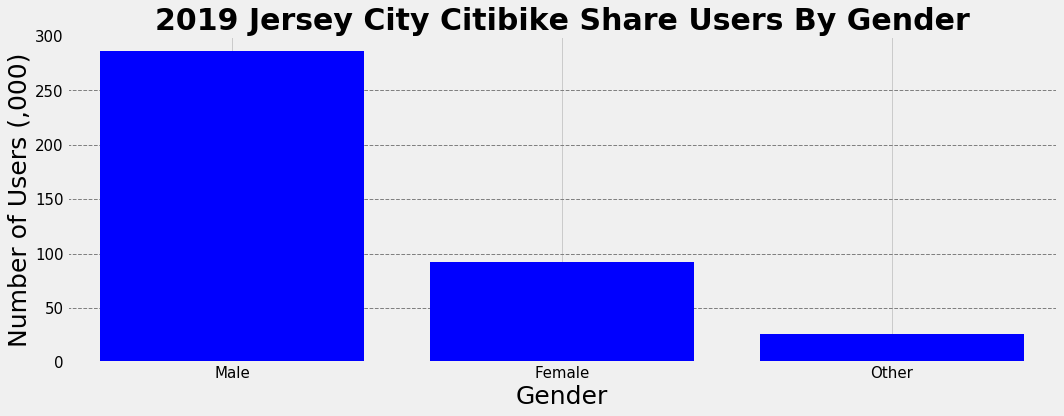

In [231]:
# Create a bar chart showing the gender distribution
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

# Define: x axis headers
riders = ["Male", "Female", "Other"]
rider_count = [male_bikers/1000, female_bikers/1000, others/1000]
x_axis = np.arange(len(rider_count))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.figure(figsize=(15,6))
plt.bar(x_axis, rider_count, color="b", align="center")

labels = ["Male", "Female", "Other"]
plt.xticks(tick_locations, riders,fontsize=15, rotation=0, ha="center")
plt.xlim([-0.5, 2.5])
plt.yticks(fontsize=15, rotation=0)
plt.ylim([0, 300])
plt.title("2019 Jersey City Citibike Share Users By Gender", fontsize=30, weight = 'bold')
plt.xlabel("Gender", fontsize=25)
plt.ylabel("Number of Users (,000)", fontsize=25)
# plt.legend(loc="upper right", fontsize=12, fancybox=True, shadow=True)

# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.grid.html
plt.grid(axis="y", linestyle="dashed", color="gray") 
 
# Save the image into a .png file
plt.savefig("../Images/2019_JC_Citibike_Users_By_Gender.png",dpi=100)

# Show the data visualization
plt.tight_layout()
plt.show()

In [232]:
# Average user age by gender
JC_bike_df.gender.replace([1, 2, 0], ['Male', 'Female', 'Others'], inplace=True)
JC_bikers = pd.DataFrame(JC_bike_df.groupby(JC_bike_df["gender"])["Est_User_Age"].mean())
JC_bikers = JC_bikers.rename(columns={"Est_User_Age": "Average User Age"})
               
JC_bikers.head()

Average User Age
gender                  
Female         35.528028
Male           37.259656
Others         48.254110

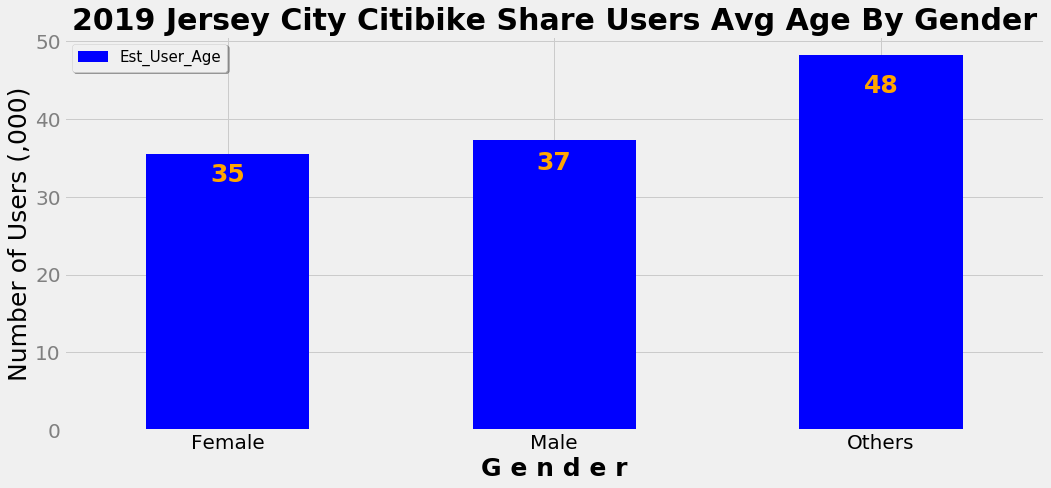

In [237]:
# Create a bar chart showing the gender distribution by average age

# Define: x axis headers
ax = pd.DataFrame(JC_bike_df.groupby(JC_bike_df["gender"])["Est_User_Age"].mean()).plot(kind='bar', figsize=(15,7),
                                        color="b", fontsize=13); 
plt.xticks(fontsize=20, rotation=0, ha="center")
plt.title("2019 Jersey City Citibike Share Users Avg Age By Gender", fontsize=30, weight = 'bold')
plt.yticks(fontsize=20, color="gray", rotation=0)
plt.xlabel("G e n d e r", fontsize=25, weight = 'bold')
plt.ylabel("Number of Users (,000)", fontsize=25)
plt.legend(loc="upper left", fontsize=15, fancybox=True, shadow=True)

# annotate bar chart with lables using "Average User Age" values
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.90 to move the text up and down
    y = 0.90 * patch.get_height() + bl[1] 
    ax.text(x,y,"%d" %(patch.get_height()),
            ha='center', rotation=0, fontsize=25, color='orange', weight = 'bold')        

# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.grid.html
# plt.grid(axis="y", linestyle="dashed", color="gray") 
 
# Save the image into a .png file
plt.savefig("../Images/2019_JC_Citibike_Users_Avg_Age_By_Gender.png",dpi=100)

# Show the data visualization
plt.tight_layout()
plt.show()

In [238]:
# Average trip duration
JC_bikers_avgtrip = pd.DataFrame(JC_bike_df.groupby(JC_bike_df["gender"])["trip duration (mins)"].mean())
JC_bikers_avgtrip.head()

trip duration (mins)
gender                      
Female             11.819427
Male                9.614186
Others             40.004784

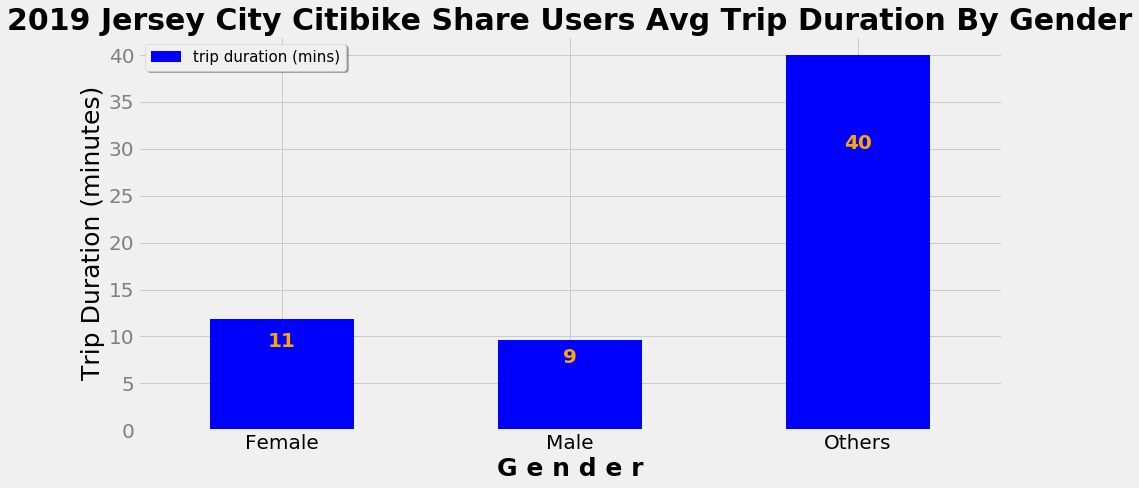

In [242]:
# Create a bar chart showing the average trip taken by gender
# Define: x axis headers
ax = pd.DataFrame(JC_bike_df.groupby(JC_bike_df["gender"])["trip duration (mins)"].mean()).plot(kind='bar', figsize=(15,7),
                                        color="b", fontsize=13); 
plt.xticks(fontsize=20, rotation=0, ha="center")
plt.title("2019 Jersey City Citibike Share Users Avg Trip Duration By Gender", fontsize=30, weight = 'bold')
plt.yticks(fontsize=20, color="gray", rotation=0)
plt.xlabel("G e n d e r", fontsize=25, weight = 'bold')
plt.ylabel("Trip Duration (minutes)", fontsize=25)
plt.legend(loc="upper left", fontsize=15, fancybox=True, shadow=True)

# annotate bar chart with lables using "Average User Age" values
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.75 = % of bar height, to move the text up and down
    y = 0.75 * patch.get_height() + bl[1] 
    ax.text(x,y,"%d" %(patch.get_height()),
            ha='center', rotation=0, fontsize=20, color='orange', weight = 'bold')        

# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.grid.html
# plt.grid(axis="y", linestyle="dashed", color="gray") 
 
# Save the image into a .png file
plt.savefig("../Images/2019_JC_Citibike_Users_AvgTrip_Duration_By_Gender.png",dpi=100)

# Show the data visualization
plt.tight_layout()
plt.show()

In [243]:
# List the top 10 busiest bike stations in Jersey City in 2019
JC_bikers_rush = JC_bike_df["start station name"].value_counts()
JC_Busy_Station = JC_bikers_rush.head(10)
JC_Busy_Station


Grove St PATH       46662
Hamilton Park       24106
Sip Ave             19085
Harborside          17877
Newport PATH        17370
Marin Light Rail    14196
Newport Pkwy        11173
Newark Ave          10604
City Hall           10186
Morris Canal        10063
Name: start station name, dtype: int64

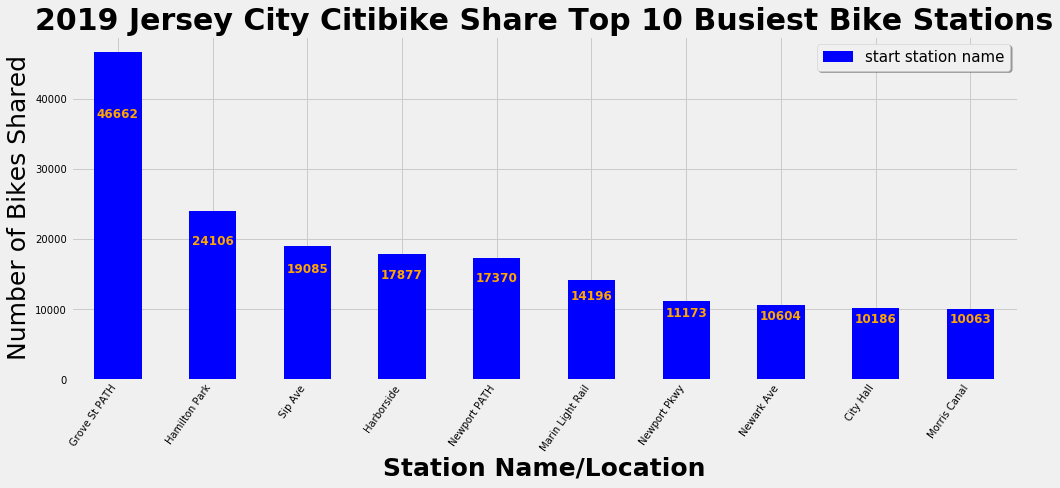

In [244]:
# Create a bar chart showing the Top 10 busiest bike stations in Jersey City
# Define: x axis headers
ax = JC_Busy_Station.plot(kind='bar', figsize=(15,7),
                                        color="b", fontsize=13); 
plt.xticks(fontsize=10, rotation=55, ha="right")
plt.title("2019 Jersey City Citibike Share Top 10 Busiest Bike Stations", fontsize=30, weight = 'bold')
plt.yticks(fontsize=10, color="black", rotation=0)
plt.xlabel("Station Name/Location", fontsize=25, weight = 'bold')
plt.ylabel("Number of Bikes Shared", fontsize=25)
plt.legend(loc="best", fontsize=15, fancybox=True, shadow=True)

# annotate bar chart with lables using number bike share activity recorded
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.5 = % of bar height, to move the text up and down
    y = 0.80 * patch.get_height() + bl[1] 
    ax.text(x,y,"%d" %(patch.get_height()),
            ha='center', rotation=0, fontsize=12, color='orange', weight = 'bold')        
 
# Save the image into a .png file
plt.savefig("../Images/2019_JC_Citibike_Busiest_Bike_Stations.png",dpi=100)

# Show the data visualization
plt.tight_layout()
plt.show()

### Upload 2019 Citi Bike Share data for the New York City area and save to CSV file for upload to Postgres ###

In [3]:
# Set path where the csv files are stored and confirm the path
path = "c:/bike/NYC_Resources"

# if necessary, change directory to "Resources" to retrieve CSV files
os.chdir(path)

wheres_my_path = os.getcwd()
print("Current working directory: %s" %wheres_my_path)

Current working directory: c:\bike\NYC_Resources


In [4]:
# Use python glob to match the file typev-‘csv’
extension = 'csv'
all_csv_files = [i for i in glob.glob('*.{}'.format(extension))]

# combine all files in the list to a dataframe
# Clear the existing index and reset it in the result by setting the ignore_index option to True.
NYC_bike_df = pd.concat([pd.read_csv(f) for f in all_csv_files ], ignore_index=True)

# create a column to show the estimated user age as of December 31, 2019
curr_year = 2019
NYC_bike_df['Est_User_Age'] = curr_year - NYC_bike_df['birth year']

# create a column to calculate the trip duration in minutes
NYC_bike_df['trip duration (mins)'] = NYC_bike_df['tripduration']/60

# create a column to show the 'City' location
NYC_bike_df['City']="JC"

# create a column to show the estimated user age as of December 31, 2019
curr_year = 2019
NYC_bike_df['Est_User_Age'] = curr_year - NYC_bike_df['birth year']

# create a column to show the 'City' location
NYC_bike_df['City']="NYC"

NYC_bike_df.head()

tripduration                 starttime                  stoptime  \
0           320  2019-01-01 00:01:47.4010  2019-01-01 00:07:07.5810   
1           316  2019-01-01 00:04:43.7360  2019-01-01 00:10:00.6080   
2           591  2019-01-01 00:06:03.9970  2019-01-01 00:15:55.4380   
3          2719  2019-01-01 00:07:03.5450  2019-01-01 00:52:22.6500   
4           303  2019-01-01 00:07:35.9450  2019-01-01 00:12:39.5020   

   start station id           start station name  start station latitude  \
0            3160.0  Central Park West & W 76 St               40.778968   
1             519.0        Pershing Square North               40.751873   
2            3171.0      Amsterdam Ave & W 82 St               40.785247   
3             504.0              1 Ave & E 16 St               40.732219   
4             229.0               Great Jones St               40.727434   

   start station longitude  end station id        end station name  \
0               -73.973747          3283.0  W 89 St & Columbus Ave   
1               -73.977706           518.0         E 39 St & 2 Ave   
2               -73.976673          3154.0         E 77 St & 3 Ave   
3               -73.981656          3709.0         W 15 St & 6 Ave   
4               -73.993790           503.0      E 20 St & Park Ave   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.788221             -73.970416   15839  Subscriber   
1             40.747804             -73.973442   32723  Subscriber   
2             40.773142             -73.958562   27451  Subscriber   
3             40.738046             -73.996430   21579  Subscriber   
4             40.738274             -73.987520   35379  Subscriber   

   birth year  gender  Est_User_Age  trip duration (mins) City  
0        1971       1            48              5.333333  NYC  
1        1964       1            55              5.266667  NYC  
2        1987       1            32              9.850000  NYC  
3        1990       1            29             45.316667  NYC  
4        1979       1            40              5.050000  NYC

In [5]:
# Evaluate the data structure

# list the column names in the New York City Area data file
print("The column names and associated datatypes in the New York City Area data file are as follows: ")
NYC_bike_df.dtypes

The column names and associated datatypes in the New York City Area data file are as follows: 


tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
Est_User_Age                 int64
trip duration (mins)       float64
City                        object
dtype: object

In [6]:
# get the number of rows/records in the file
number_of_rows = len(NYC_bike_df)
print("Number of records in the New York City Area data file: %s" %number_of_rows)

Number of records in the New York City Area data file: 20551697


In [7]:
# data clean-up: check for missing values
print("Are there any missing values in the New York City Area data?: ")
NYC_bike_df.isnull().any()

Are there any missing values in the New York City Area data?: 


tripduration               False
starttime                  False
stoptime                   False
start station id            True
start station name          True
start station latitude     False
start station longitude    False
end station id              True
end station name            True
end station latitude       False
end station longitude      False
bikeid                     False
usertype                   False
birth year                 False
gender                     False
Est_User_Age               False
trip duration (mins)       False
City                       False
dtype: bool

In [8]:
# data clean up:
# drop empty cells if any were found in the 
NYC_bike_df = NYC_bike_df.dropna(how='any')

# check for anymore missing values
print("Are there still any missing values in the New York City Area data?: ")
NYC_bike_df.isnull().any()

Are there still any missing values in the New York City Area data?: 


tripduration               False
starttime                  False
stoptime                   False
start station id           False
start station name         False
start station latitude     False
start station longitude    False
end station id             False
end station name           False
end station latitude       False
end station longitude      False
bikeid                     False
usertype                   False
birth year                 False
gender                     False
Est_User_Age               False
trip duration (mins)       False
City                       False
dtype: bool

In [9]:
# get the number of rows/records in the file
number_of_rows = len(NYC_bike_df)
print("Number of records in the New York City Area data file: %s" %number_of_rows)

Number of records in the New York City Area data file: 20551517


In [10]:
# Reset the dataframe index
NYC_bike_df.reset_index(drop=True)

tripduration                 starttime                  stoptime  \
0                  320  2019-01-01 00:01:47.4010  2019-01-01 00:07:07.5810   
1                  316  2019-01-01 00:04:43.7360  2019-01-01 00:10:00.6080   
2                  591  2019-01-01 00:06:03.9970  2019-01-01 00:15:55.4380   
3                 2719  2019-01-01 00:07:03.5450  2019-01-01 00:52:22.6500   
4                  303  2019-01-01 00:07:35.9450  2019-01-01 00:12:39.5020   
...                ...                       ...                       ...   
20551512            93  2019-12-31 23:58:18.0160  2019-12-31 23:59:51.6360   
20551513           786  2019-12-31 23:58:59.8960  2020-01-01 00:12:06.3460   
20551514           351  2019-12-31 23:59:03.6950  2020-01-01 00:04:54.8730   
20551515          1571  2019-12-31 23:59:21.3610  2020-01-01 00:25:32.9420   
20551516           310  2019-12-31 23:59:55.2960  2020-01-01 00:05:05.7270   

          start station id                start station name  \
0                   3160.0       Central Park West & W 76 St   
1                    519.0             Pershing Square North   
2                   3171.0           Amsterdam Ave & W 82 St   
3                    504.0                   1 Ave & E 16 St   
4                    229.0                    Great Jones St   
...                    ...                               ...   
20551512            3141.0                   1 Ave & E 68 St   
20551513             490.0                   8 Ave & W 33 St   
20551514            3349.0  Grand Army Plaza & Plaza St West   
20551515             252.0      MacDougal St & Washington Sq   
20551516            3351.0                  E 102 St & 1 Ave   

          start station latitude  start station longitude  end station id  \
0                      40.778968               -73.973747          3283.0   
1                      40.751873               -73.977706           518.0   
2                      40.785247               -73.976673          3154.0   
3                      40.732219               -73.981656          3709.0   
4                      40.727434               -73.993790           503.0   
...                          ...                      ...             ...   
20551512               40.765005               -73.958185          3142.0   
20551513               40.751551               -73.993934           513.0   
20551514               40.672968               -73.970880          3368.0   
20551515               40.732264               -73.998522           366.0   
20551516               40.786995               -73.941648          3379.0   

                  end station name  end station latitude  \
0           W 89 St & Columbus Ave             40.788221   
1                  E 39 St & 2 Ave             40.747804   
2                  E 77 St & 3 Ave             40.773142   
3                  W 15 St & 6 Ave             40.738046   
4               E 20 St & Park Ave             40.738274   
...                            ...                   ...   
20551512           1 Ave & E 62 St             40.761227   
20551513          W 56 St & 10 Ave             40.768254   
20551514              5 Ave & 3 St             40.672816   
20551515  Clinton Ave & Myrtle Ave             40.693261   
20551516  E 103 St & Lexington Ave             40.790305   

          end station longitude  bikeid    usertype  birth year  gender  \
0                    -73.970416   15839  Subscriber        1971       1   
1                    -73.973442   32723  Subscriber        1964       1   
2                    -73.958562   27451  Subscriber        1987       1   
3                    -73.996430   21579  Subscriber        1990       1   
4                    -73.987520   35379  Subscriber        1979       1   
...                         ...     ...         ...         ...     ...   
20551512             -73.960940   28734  Subscriber        1985       2   
20551513             -73.988639   41418  Subscriber       

In [11]:
# export back to a csv file for upload to postgres
# https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file/16923367#16923367
NYC_bike_df.to_csv( "../Output/NYC_bike_df.csv", index=False, encoding='utf-8-sig', header=True)

In [12]:
# Set path where the csv files are stored and confirm the path
path = "c:/bike/Output"

# if necessary, change diectory to "Resources" to retrieve CSV files
os.chdir(path)

wheres_my_path = os.getcwd()
print("Current working directory: %s" %wheres_my_path)

Current working directory: c:\bike\Output


In [13]:
# Import the JC_bike.csv file as a DataFrame
csv_path = "c:/bike/Output/NYC_bike_df.csv"
NYC_bike_df = pd.read_csv(csv_path, encoding="utf-8")
NYC_bike_df.head()

tripduration                 starttime                  stoptime  \
0           320  2019-01-01 00:01:47.4010  2019-01-01 00:07:07.5810   
1           316  2019-01-01 00:04:43.7360  2019-01-01 00:10:00.6080   
2           591  2019-01-01 00:06:03.9970  2019-01-01 00:15:55.4380   
3          2719  2019-01-01 00:07:03.5450  2019-01-01 00:52:22.6500   
4           303  2019-01-01 00:07:35.9450  2019-01-01 00:12:39.5020   

   start station id           start station name  start station latitude  \
0            3160.0  Central Park West & W 76 St               40.778968   
1             519.0        Pershing Square North               40.751873   
2            3171.0      Amsterdam Ave & W 82 St               40.785247   
3             504.0              1 Ave & E 16 St               40.732219   
4             229.0               Great Jones St               40.727434   

   start station longitude  end station id        end station name  \
0               -73.973747          3283.0  W 89 St & Columbus Ave   
1               -73.977706           518.0         E 39 St & 2 Ave   
2               -73.976673          3154.0         E 77 St & 3 Ave   
3               -73.981656          3709.0         W 15 St & 6 Ave   
4               -73.993790           503.0      E 20 St & Park Ave   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.788221             -73.970416   15839  Subscriber   
1             40.747804             -73.973442   32723  Subscriber   
2             40.773142             -73.958562   27451  Subscriber   
3             40.738046             -73.996430   21579  Subscriber   
4             40.738274             -73.987520   35379  Subscriber   

   birth year  gender  Est_User_Age  trip duration (mins) City  
0        1971       1            48              5.333333  NYC  
1        1964       1            55              5.266667  NYC  
2        1987       1            32              9.850000  NYC  
3        1990       1            29             45.316667  NYC  
4        1979       1            40              5.050000  NYC

In [17]:
# Create a visualization of the gender distribuition of Citibike Share riders in the New York City Area
# total_bikers = (len(JC_bike_df['gender']))
male_NYbikers = NYC_bike_df['gender'].value_counts()[1]
female_NYbikers = NYC_bike_df['gender'].value_counts()[2]
NY_others = NYC_bike_df['gender'].value_counts()[0]
total_NYbikers = male_NYbikers + female_NYbikers + NY_others

# calculate for percent breakdown and store into new set of variables
pct_NYmale = round((male_NYbikers/total_NYbikers) * 100,1)
pct_NYfemale = round((female_NYbikers / total_NYbikers) * 100,1)
pct_NYothers = round((NY_others / total_NYbikers) * 100,1)

print("Analysis of the Citibike Share Riders By Gender in the New York City Area")
print("-----------")
print("Number of Male Citibike Share riders in the New York City Area: %s" %male_NYbikers)
print("Percentage of Male Citibike Share riders in the New York City Area: %s" %pct_NYmale)
print("-----------")
print("Number of Female Citibike Share riders in the New York City Area: %s" %female_NYbikers)
print("Percentage of Male Citibike Share riders in the New York City Areaa: %s" %pct_NYfemale)
print("-----------")
print("Number of Other Citibike Share riders in the New York City Area: %s" %NY_others)
print("Percentage of Other Citibike Share riders in the New York City Area: %s" %pct_NYothers)
print("-----------")

Analysis of the Citibike Share Riders By Gender in the New York City Area
-----------
Number of Male Citibike Share riders in the New York City Area: 14052230
Percentage of Male Citibike Share riders in the New York City Area: 68.4
-----------
Number of Female Citibike Share riders in the New York City Area: 4938982
Percentage of Male Citibike Share riders in the New York City Areaa: 24.0
-----------
Number of Other Citibike Share riders in the New York City Area: 1560305
Percentage of Other Citibike Share riders in the New York City Area: 7.6
-----------


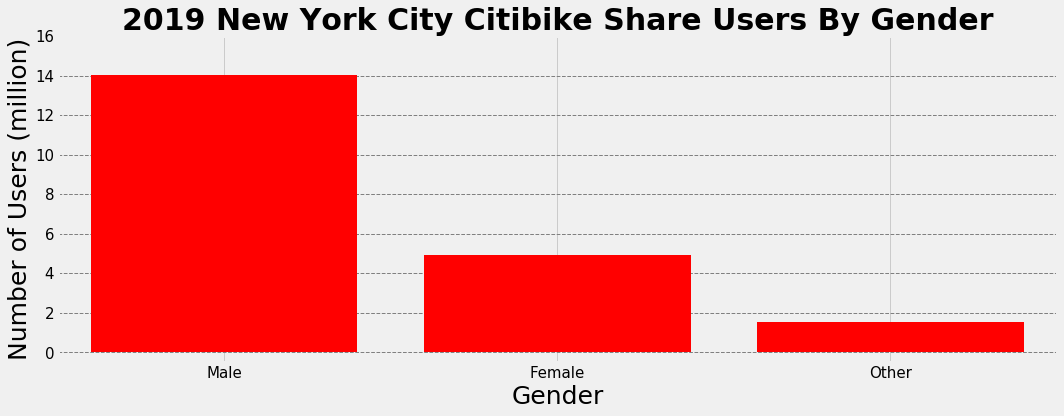

In [33]:
# Create a bar chart showing the gender distribution
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

# Define: x axis headers
NY_riders = ["Male", "Female", "Other"]
NY_rider_count = [male_NYbikers/1000000, female_NYbikers/1000000, NY_others/1000000]
x_axis = np.arange(len(NY_rider_count))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.figure(figsize=(15,6))
plt.bar(x_axis, NY_rider_count, color="r", align="center")

labels = ["Male", "Female", "Other"]
plt.xticks(tick_locations, NY_riders,fontsize=15, rotation=0, ha="center")
plt.xlim([-0.5, 2.5])
plt.yticks(fontsize=15, rotation=0)
plt.ylim([-.50, 16])
plt.title("2019 New York City Citibike Share Users By Gender", fontsize=30, weight = 'bold')
plt.xlabel("Gender", fontsize=25)
plt.ylabel("Number of Users (million)", fontsize=25)
# plt.legend(loc="upper right", fontsize=12, fancybox=True, shadow=True)

# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.grid.html
plt.grid(axis="y", linestyle="dashed", color="gray") 
 
# Save the image into a .png file
plt.savefig("../Images/2019_NYC_Citibike_Users_By_Gender.png",dpi=100)

# Show the data visualization
plt.tight_layout()
plt.show()

In [34]:
# Average user age by gender
NYC_bike_df.gender.replace([1, 2, 0], ['Male', 'Female', 'Others'], inplace=True)
NYC_bike_df = NYC_bike_df.rename(columns={"Est_User_Age": "User Age"})
NYC_bikers = pd.DataFrame(NYC_bike_df.groupby(NYC_bike_df["gender"])["User Age"].mean())
# NYC_bikers = NYC_bikers.rename(columns={"Est_User_Age": "Average User Age"})
               
NYC_bikers.head()

User Age
gender           
Female  37.128719
Male    38.292246
Others  48.666047

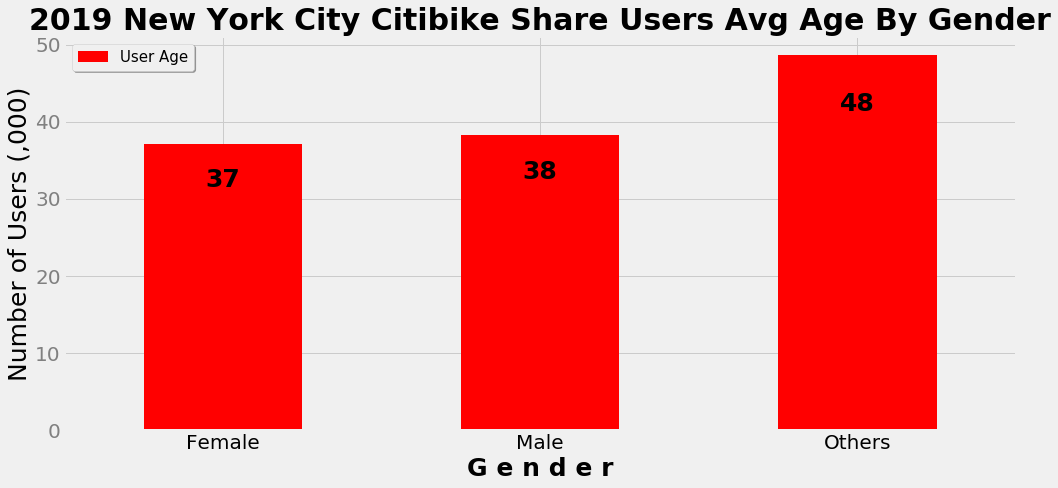

In [42]:
# Create a bar chart showing the gender distribution by average age

# Define: x axis headers
ax = pd.DataFrame(NYC_bike_df.groupby(NYC_bike_df["gender"])["User Age"].mean()).plot(kind='bar', figsize=(15,7),
                                        color="r", fontsize=13); 
plt.xticks(fontsize=20, rotation=0, ha="center")
plt.title("2019 New York City Citibike Share Users Avg Age By Gender", fontsize=30, weight = 'bold')
plt.yticks(fontsize=20, color="gray", rotation=0)
plt.xlabel("G e n d e r", fontsize=25, weight = 'bold')
plt.ylabel("Number of Users (,000)", fontsize=25)
plt.legend(loc="upper left", fontsize=15, fancybox=True, shadow=True)

# annotate bar chart with lables using "Average User Age" values
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.85 to move the text up and down
    y = 0.85 * patch.get_height() + bl[1] 
    ax.text(x,y,"%d" %(patch.get_height()),
            ha='center', rotation=0, fontsize=25, color='black', weight = 'bold')        

# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.grid.html
# plt.grid(axis="y", linestyle="dashed", color="gray") 
 
# Save the image into a .png file
plt.savefig("../Images/2019_NYC_Citibike_Users_Avg_Age_By_Gender.png",dpi=100)

# Show the data visualization
plt.tight_layout()
plt.show()

In [36]:
# Average trip duration
NYC_bikers_avgtrip = pd.DataFrame(NYC_bike_df.groupby(NYC_bike_df["gender"])["trip duration (mins)"].mean())
NYC_bikers_avgtrip.head()

trip duration (mins)
gender                      
Female             16.743258
Male               14.009008
Others             35.583445

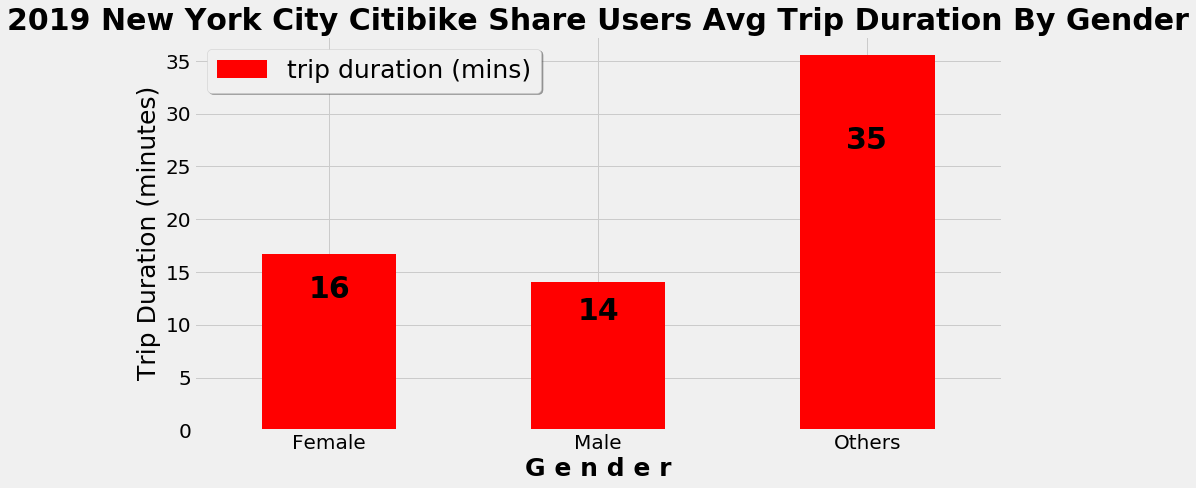

In [41]:
# Create a bar chart showing the average trip taken by gender
# Define: x axis headers
ax = pd.DataFrame(NYC_bike_df.groupby(NYC_bike_df["gender"])["trip duration (mins)"].mean()).plot(kind='bar', figsize=(15,7),
                                        color="r", fontsize=13); 
plt.xticks(fontsize=20, rotation=0, ha="center")
plt.title("2019 New York City Citibike Share Users Avg Trip Duration By Gender", fontsize=30, weight = 'bold')
plt.yticks(fontsize=20, color="black", rotation=0)
plt.xlabel("G e n d e r", fontsize=25, weight = 'bold')
plt.ylabel("Trip Duration (minutes)", fontsize=25)
plt.legend(loc="best", fontsize=25, fancybox=True, shadow=True)

# annotate bar chart with lables using "Average User Age" values
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.75 = % of bar height, to move the text up and down
    y = 0.75 * patch.get_height() + bl[1] 
    ax.text(x,y,"%d" %(patch.get_height()),
            ha='center', rotation=0, fontsize=30, color='black', weight = 'bold')        
 
# Save the image into a .png file
plt.savefig("../Images/2019_NYC_Citibike_Users_AvgTrip_Duration_By_Gender.png",dpi=100)

# Show the data visualization
plt.tight_layout()
plt.show()

In [43]:
# List the top 10 busiest bike stations in Jersey City in 2019
NYC_bikers_rush = NYC_bike_df["start station name"].value_counts()
NYC_Busy_Station = NYC_bikers_rush.head(10)
NYC_Busy_Station

Pershing Square North            156575
E 17 St & Broadway               121781
8 Ave & W 31 St                  119958
Broadway & E 22 St               113138
Broadway & E 14 St               113012
W 21 St & 6 Ave                  110305
West St & Chambers St            105636
Broadway & W 60 St               103167
Christopher St & Greenwich St    101413
12 Ave & W 40 St                  99300
Name: start station name, dtype: int64

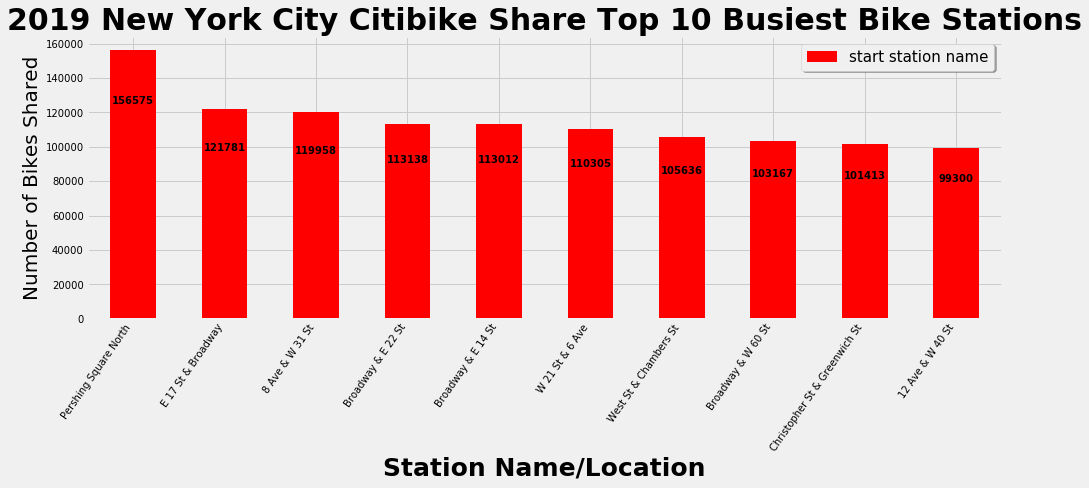

In [46]:
# Create a bar chart showing the Top 10 busiest bike stations in Jersey City
# Define: x axis headers
ax = NYC_Busy_Station.plot(kind='bar', figsize=(15,7),
                                        color="r", fontsize=13); 
plt.xticks(fontsize=10, rotation=55, ha="right")
plt.title("2019 New York City Citibike Share Top 10 Busiest Bike Stations", fontsize=30, weight = 'bold')
plt.yticks(fontsize=10, color="black", rotation=0)
plt.xlabel("Station Name/Location", fontsize=25, weight = 'bold')
plt.ylabel("Number of Bikes Shared", fontsize=20)
plt.legend(loc="best", fontsize=15, fancybox=True, shadow=True)

# annotate bar chart with lables using number bike share activity recorded
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.5 = % of bar height, to move the text up and down
    y = 0.80 * patch.get_height() + bl[1] 
    ax.text(x,y,"%d" %(patch.get_height()),
            ha='center', rotation=0, fontsize=10, color='black', weight = 'bold')        
 
# Save the image into a .png file
plt.savefig("../Images/2019_NYC_Citibike_Busiest_Bike_Stations.png",dpi=100)

# Show the data visualization
plt.tight_layout()
plt.show()

## How much does it cost for users - local residents and visitors/tourists - to rent a bike ?

In [52]:
# scrape for pricing information
# Dependencies - import libraries
from bs4 import BeautifulSoup as bs
import requests

# set URL of page to be scraped
url="https://www.citibikenyc.com/pricing"

# Retrieve page with the requests module
response=requests.get(url)

# Create BeautifulSoup object; parse with 'html.parser'
soup=bs(response.text, 'html.parser')


# determine element that contains sought info from the iterable list returned
# results are returned as an iterable list
results = soup.find_all('div', class_='spacing--one-and-half')
results=soup.find_all('h2')

## Loop through returned results
print("CitiBike Share Plans and Pricing:")
for result in results:
    plan=result.text
    print(plan)
print(" ")
print("-------------------------------------------------------- ")
print(" ")

# print the cost of a single ride pass
print("Hop On and Go Single Ride Price:")
single_ride=soup.find('div', class_="spacing--half")
print(single_ride.text)
print(" ")
print("-------------------------------------------------------- ")
print(" ")

# print the cost of an all day pass
print("Fine Day/City Exploration Day Pass:")
day_pass=soup.find_all('div', class_="spacing--half")[1]
print(day_pass.text)
print(" ")
print("-------------------------------------------------------- ")
print(" ")

# print the cost of an annual pass
print("City Residents and Citibike Patrons Annual Pass:")
annual_pass=soup.find_all('div', class_="spacing--half")[2]
print(annual_pass.text)
print("-------------------------------------------------------- ")

CitiBike Share Plans and Pricing:
Single Ride
Day Pass
Annual Membership
More Options
 
-------------------------------------------------------- 
 
Hop On and Go Single Ride Price:

$3/trip
one ride up to 30 minutes on a classic bike.

 
-------------------------------------------------------- 
 
Fine Day/City Exploration Day Pass:

$12/day
unlimited 30-minute rides in a 24-hour period on a classic bike.

 
-------------------------------------------------------- 
 
City Residents and Citibike Patrons Annual Pass:

$169/year
unlimited 45-minute rides on a classic bike.

-------------------------------------------------------- 


## How much does it  cost to ride a cab in New York City?

In [62]:
# set URL of page to be scraped
url="https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page"

# Retrieve page with the requests module
response=requests.get(url)

# Create BeautifulSoup object; parse with 'html.parser'
soup=bs(response.text, 'html.parser')


# determine element that contains sought info from the iterable list returned
# results are returned as an iterable list
results = soup.find_all('div', class_='spacing--one-and-half')
results=soup.find_all('li')

## Loop through returned results
print("New York City Taxi and Limousine Commission (TLC):")
for result in results:
    fare=result.text
    print(fare)
print(" ")
print("-------------------------------------------------------- ")
print(" ")

New York City Taxi and Limousine Commission (TLC):


                      Home


About


Passengers


Drivers


Vehicles


Businesses


TLC Online



Compliments and Complaints


Taxi Fare


Find an Accessible Ride


Passenger Frequently Asked Questions

$2.50 initial charge.
Plus 50 cents per 1/5 mile when traveling above 12mph or per 60 seconds in slow traffic or when the vehicle is stopped.
Plus 50 cents MTA State Surcharge for all trips that end in New York City or Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties.
Plus 30 cents Improvement Surcharge.
Plus 50 cents overnight surcharge 8pm to 6am.
Plus $1.00 rush hour surcharge from 4pm to 8pm on weekdays, excluding holidays.
Plus New York State Congestion Surcharge of $2.50 (Yellow Taxi) or $2.75 (Green Taxi and FHV) or 75 cents (any shared ride) for all trips that begin, end or pass through Manhattan south of 96th Street.
Plus tips and any tolls.
There is no charge for extra passengers, luggage or bags, 

## NYC Taxi fare: 
## $2.50 initial charge.
## Plus 50 cents per 1/5 mile when traveling above 12mph or per 60 seconds in slow traffic or when the vehicle is stopped.

# Bike or Cab: Which is cheaper? Which is more fun?

# Upload and clean weather information file

In [17]:
# Set path where the json file is and confirm the path
path = "../Weather_Resources"

# if necessary, change directory to "Weather_Resources" to retrieve json file
os.chdir(path)

wheres_my_path = os.getcwd()
print("Current working directory: %s" %wheres_my_path)

Current working directory: C:\bike\Weather_Resources


In [19]:
# import libraries
import json
from pprint import pprint

# read JSON file
filepath = "ny_weather.json"
with open(filepath) as jsonfile:
    json_file = json.load(jsonfile)
    
# review JSON file   
pprint(json_file)

[{'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1546300800,
  'dt_iso': '2019-01-01 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.7,
           'humidity': 90,
           'pressure': 1020,
           'temp': 43.75,
           'temp_max': 45,
           'temp_min': 42.01},
  'rain': {'1h': 3.17},
  'timezone': -18000,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 122, 'speed': 8.95}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1546304400,
  'dt_iso': '2019-01-01 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.46,
           'humidity': 95,
           'pressure': 1018.6,
           'temp': 43.88,
           'temp_max': 45,
           'temp_min': 42.01},
  'rain': {'1h': 4.39},
  'timezone': -18000,
  'weather': [{'description': 'heavy intensity rain',
  

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 314, 'speed': 13.56}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1546380000,
  'dt_iso': '2019-01-01 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.54,
           'humidity': 62,
           'pressure': 1016.7,
           'temp': 45.73,
           'temp_max': 46.99,
           'temp_min': 44.01},
  'rain': {'1h': 0.2},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 318, 'speed': 10.38}},
 {'city_name': 'Custom location',
  'clouds': {'all': 95},
  'dt': 1546383600,
  'dt_iso': '2019-01-01 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.28,
           'humidity': 63,
           'pressure': 1018,
     

  'main': {'feels_like': 30.6,
           'humidity': 61,
           'pressure': 1024.9,
           'temp': 37.85,
           'temp_max': 39.99,
           'temp_min': 35.6},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 141, 'speed': 5.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1546466400,
  'dt_iso': '2019-01-02 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 30,
           'humidity': 69,
           'pressure': 1024.5,
           'temp': 36.9,
           'temp_max': 37.99,
           'temp_min': 35.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 132, 'speed': 4.85}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1546470000,
  

           'pressure': 1013.5,
           'temp': 42.73,
           'temp_max': 44.6,
           'temp_min': 41},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 295, 'speed': 9.13}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1546531200,
  'dt_iso': '2019-01-03 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.17,
           'humidity': 65,
           'pressure': 1013.2,
           'temp': 43.7,
           'temp_max': 45,
           'temp_min': 42.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 317, 'speed': 12.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 85},
  'dt': 1546534800,
  'dt_iso': '2019-01-03 17:00:00 +0000 UTC',
  'lat': 40.751873,

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 169, 'speed': 3.94}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1546660800,
  'dt_iso': '2019-01-05 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.6,
           'humidity': 85,
           'pressure': 1008.6,
           'temp': 43.86,
           'temp_max': 46.99,
           'temp_min': 39.99},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 134, 'speed': 3.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1546664400,
  'dt_iso': '2019-01-05 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.23,
           'humidity': 87,
           'pressure': 1007.7,
           'temp': 4

 {'city_name': 'Custom location',
  'clouds': {'all': 89},
  'dt': 1546729200,
  'dt_iso': '2019-01-05 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.24,
           'humidity': 87,
           'pressure': 1001.5,
           'temp': 43.72,
           'temp_max': 45,
           'temp_min': 42.01},
  'rain': {'1h': 0.4},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 323, 'speed': 7.58}},
 {'city_name': 'Custom location',
  'clouds': {'all': 30},
  'dt': 1546732800,
  'dt_iso': '2019-01-06 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.35,
           'humidity': 88,
           'pressure': 1002.9,
           'temp': 44.35,
           'temp_max': 46.4,
           'temp_min': 42.01},
  'rain': {'1h': 0.28},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
            

               'main': 'Clear'}],
  'wind': {'deg': 325, 'speed': 13.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1546826400,
  'dt_iso': '2019-01-07 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.25,
           'humidity': 54,
           'pressure': 1023.5,
           'temp': 35.47,
           'temp_max': 37.99,
           'temp_min': 33.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 327, 'speed': 12.91}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1546830000,
  'dt_iso': '2019-01-07 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 22.14,
           'humidity': 55,
           'pressure': 1024.5,
           'temp': 34.02,
           'temp_max': 36,
           'temp_min': 32},
  'timezone': -18000,
  'weather': [{'description'

  'main': {'feels_like': 23.67,
           'humidity': 56,
           'pressure': 1028.9,
           'temp': 31.3,
           'temp_max': 34,
           'temp_min': 28.99},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 140, 'speed': 4.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1546909200,
  'dt_iso': '2019-01-08 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.18,
           'humidity': 57,
           'pressure': 1027.9,
           'temp': 31.62,
           'temp_max': 35.01,
           'temp_min': 28},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 150, 'speed': 5.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1546912800,
  'dt

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 93, 'speed': 1.95}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1547006400,
  'dt_iso': '2019-01-09 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.22,
           'humidity': 95,
           'pressure': 1001.6,
           'temp': 42.51,
           'temp_max': 46,
           'temp_min': 37.99},
  'rain': {'1h': 0.71},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 210, 'speed': 2.3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1547010000,
  'dt_iso': '2019-01-09 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.78,
           'humidity': 95,
           'pressure': 1001.7,
        

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 288, 'speed': 12.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1547089200,
  'dt_iso': '2019-01-10 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.41,
           'humidity': 57,
           'pressure': 1004.1,
           'temp': 35.35,
           'temp_max': 37.04,
           'temp_min': 34},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 288, 'speed': 12.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 4},
  'dt': 1547092800,
  'dt_iso': '2019-01-10 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 22.53,
           'humidity': 57,
           'pressure': 1003.5,
           'te

  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 305, 'speed': 12.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 86},
  'dt': 1547172000,
  'dt_iso': '2019-01-11 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 18.34,
           'humidity': 63,
           'pressure': 1014,
           'temp': 30.33,
           'temp_max': 32,
           'temp_min': 28},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 306, 'speed': 12.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 92},
  'dt': 1547175600,
  'dt_iso': '2019-01-11 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 17.69,
           'humidity': 63,
           'pressure': 1014.9,
           'temp': 29.97,
   

  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 315, 'speed': 7.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 95},
  'dt': 1547283600,
  'dt_iso': '2019-01-12 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 10.69,
           'humidity': 61,
           'pressure': 1032.2,
           'temp': 20.44,
           'temp_max': 24.01,
           'temp_min': 17.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 321, 'speed': 6.98}},
 {'city_name': 'Custom location',
  'clouds': {'all': 84},
  'dt': 1547287200,
  'dt_iso': '2019-01-12 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 10.53,
           'humidity': 66,
           'pressure': 1032.4,
           'temp': 1

  'clouds': {'all': 100},
  'dt': 1547377200,
  'dt_iso': '2019-01-13 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 18.39,
           'humidity': 70,
           'pressure': 1031.1,
           'temp': 26.02,
           'temp_max': 28.4,
           'temp_min': 24.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 33, 'speed': 4.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1547380800,
  'dt_iso': '2019-01-13 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 16.5,
           'humidity': 70,
           'pressure': 1031.3,
           'temp': 24.49,
           'temp_max': 26.01,
           'temp_min': 23},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'C

               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 8, 'speed': 5.91}},
 {'city_name': 'Custom location',
  'clouds': {'all': 4},
  'dt': 1547488800,
  'dt_iso': '2019-01-14 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 21.47,
           'humidity': 56,
           'pressure': 1023.4,
           'temp': 29.79,
           'temp_max': 33.01,
           'temp_min': 27},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 359, 'speed': 5.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1547492400,
  'dt_iso': '2019-01-14 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.07,
           'humidity': 53,
           'pressure': 1022.7,
           'temp': 31.17,
           'temp_max': 34,
           'temp_min': 28.99},
  'timezone': -18000,
  'wea

  'clouds': {'all': 95},
  'dt': 1547582400,
  'dt_iso': '2019-01-15 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.99,
           'humidity': 50,
           'pressure': 1019.7,
           'temp': 35.46,
           'temp_max': 37.99,
           'temp_min': 32.9},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 300, 'speed': 4.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 59},
  'dt': 1547586000,
  'dt_iso': '2019-01-15 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.81,
           'humidity': 60,
           'pressure': 1019.8,
           'temp': 35.44,
           'temp_max': 37.99,
           'temp_min': 33.01},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': '

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 250, 'speed': 7.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1547686800,
  'dt_iso': '2019-01-17 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.67,
           'humidity': 64,
           'pressure': 1020.4,
           'temp': 37.36,
           'temp_max': 39.2,
           'temp_min': 35.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 256, 'speed': 7.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 30},
  'dt': 1547690400,
  'dt_iso': '2019-01-17 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.14,
           'humidity': 64,
           'pressure': 1021,
           'temp': 37.54

 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1547780400,
  'dt_iso': '2019-01-18 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.17,
           'humidity': 70,
           'pressure': 1024.2,
           'temp': 30.99,
           'temp_max': 33.8,
           'temp_min': 28},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 79, 'speed': 3.67}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1547784000,
  'dt_iso': '2019-01-18 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.69,
           'humidity': 70,
           'pressure': 1024.2,
           'temp': 31.15,
           'temp_max': 33.8,
           'temp_min': 28.76},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id'

  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 305, 'speed': 4.81}},
 {'city_name': 'Custom location',
  'clouds': {'all': 23},
  'dt': 1547881200,
  'dt_iso': '2019-01-19 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.01,
           'humidity': 77,
           'pressure': 1022.8,
           'temp': 32.9,
           'temp_max': 36,
           'temp_min': 28},
  'rain': {},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 300, 'speed': 4.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 14},
  'dt': 1547884800,
  'dt_iso': '2019-01-19 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 25.54,
           'humidity': 75,
           'pressure': 1023.4,
         

               'icon': '10n',
               'id': 502,
               'main': 'Rain'},
              {'description': 'heavy snow',
               'icon': '13n',
               'id': 602,
               'main': 'Snow'},
              {'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 73, 'speed': 9.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1547971200,
  'dt_iso': '2019-01-20 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.96,
           'humidity': 94,
           'pressure': 1003.3,
           'temp': 35.1,
           'temp_max': 37.99,
           'temp_min': 32},
  'rain': {'1h': 2.55},
  'snow': {'1h': 3.56},
  'timezone': -18000,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'},
              {'description': 'snow',
               'icon': '13n',
  

  'wind': {'deg': 305, 'speed': 15.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 52},
  'dt': 1548050400,
  'dt_iso': '2019-01-21 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': -2.45,
           'humidity': 63,
           'pressure': 1009.8,
           'temp': 12.96,
           'temp_max': 17.01,
           'temp_min': 9},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 304, 'speed': 16.4}},
 {'city_name': 'Custom location',
  'clouds': {'all': 49},
  'dt': 1548054000,
  'dt_iso': '2019-01-21 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': -4.22,
           'humidity': 64,
           'pressure': 1011.1,
           'temp': 11.3,
           'temp_max': 15.8,
           'temp_min': 7},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'scat

  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 291, 'speed': 9.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548151200,
  'dt_iso': '2019-01-22 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 2.64,
           'humidity': 65,
           'pressure': 1035,
           'temp': 14.16,
           'temp_max': 17.01,
           'temp_min': 10},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 284, 'speed': 9.64}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548154800,
  'dt_iso': '2019-01-22 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 2.8,
           'humidity': 65,
           'pressure': 1036.3,
           'temp': 14.29,
           't

               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 199, 'speed': 7.05}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1548241200,
  'dt_iso': '2019-01-23 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 21.74,
           'humidity': 63,
           'pressure': 1029.4,
           'temp': 30.97,
           'temp_max': 34,
           'temp_min': 28.99},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 211, 'speed': 7.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1548244800,
  'dt_iso': '2019-01-23 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 21.87,
           'humidity': 64,
           'pressure': 1029.1,
           'temp': 30.9,
           'temp_max': 34,
           'temp_mi

  'lon': -73.977706,
  'main': {'feels_like': 42.6,
           'humidity': 94,
           'pressure': 1006.9,
           'temp': 51.03,
           'temp_max': 55.94,
           'temp_min': 45},
  'rain': {'1h': 0.32},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 191, 'speed': 14.79}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1548327600,
  'dt_iso': '2019-01-24 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.46,
           'humidity': 94,
           'pressure': 1005.7,
           'temp': 51.28,
           'temp_max': 57.38,
           'temp_min': 46},
  'rain': {'1h': 0.32},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 188, 'speed': 15.61}},
 {'city_name': 'Custom loc

  'main': {'feels_like': 25.34,
           'humidity': 64,
           'pressure': 1010.2,
           'temp': 34.66,
           'temp_max': 37,
           'temp_min': 32},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 282, 'speed': 8.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548403200,
  'dt_iso': '2019-01-25 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.91,
           'humidity': 64,
           'pressure': 1010.3,
           'temp': 34.11,
           'temp_max': 35.6,
           'temp_min': 32},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 286, 'speed': 8.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 15

  'main': {'feels_like': 17.96,
           'humidity': 41,
           'pressure': 1022.1,
           'temp': 28.78,
           'temp_max': 30.99,
           'temp_min': 25},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 283, 'speed': 8.75}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548478800,
  'dt_iso': '2019-01-26 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 17.73,
           'humidity': 41,
           'pressure': 1022.9,
           'temp': 27.61,
           'temp_max': 30,
           'temp_min': 24.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 283, 'speed': 6.96}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548482400,
  'dt_iso': '2

               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 153, 'speed': 5.19}},
 {'city_name': 'Custom location',
  'clouds': {'all': 15},
  'dt': 1548579600,
  'dt_iso': '2019-01-27 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 22.57,
           'humidity': 85,
           'pressure': 1021.2,
           'temp': 29.93,
           'temp_max': 36,
           'temp_min': 21.99},
  'timezone': -18000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 147, 'speed': 5.32}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1548583200,
  'dt_iso': '2019-01-27 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.04,
           'humidity': 90,
           'pressure': 1020.6,
           'temp': 31.03,
           'temp_max': 37.99,
           'temp_min': 

           'temp_min': 28.99},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 341, 'speed': 8.86}},
 {'city_name': 'Custom location',
  'clouds': {'all': 57},
  'dt': 1548669600,
  'dt_iso': '2019-01-28 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.69,
           'humidity': 57,
           'pressure': 1016.9,
           'temp': 29.55,
           'temp_max': 32,
           'temp_min': 27},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 347, 'speed': 8.05}},
 {'city_name': 'Custom location',
  'clouds': {'all': 55},
  'dt': 1548673200,
  'dt_iso': '2019-01-28 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 18.3,
           'humidity': 58,
          

           'temp': 24.66,
           'temp_max': 28.99,
           'temp_min': 19},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 51, 'speed': 3.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1548763200,
  'dt_iso': '2019-01-29 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.47,
           'humidity': 80,
           'pressure': 1016.1,
           'temp': 26.4,
           'temp_max': 30.2,
           'temp_min': 21},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 71, 'speed': 3.6}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1548766800,
  'dt_iso': '2019-01-29 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.97770

  'wind': {'deg': 289, 'speed': 9.35}},
 {'city_name': 'Custom location',
  'clouds': {'all': 4},
  'dt': 1548849600,
  'dt_iso': '2019-01-30 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 9.54,
           'humidity': 59,
           'pressure': 1013.8,
           'temp': 20.26,
           'temp_max': 21.99,
           'temp_min': 18},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 286, 'speed': 8.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 22},
  'dt': 1548853200,
  'dt_iso': '2019-01-30 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 10.09,
           'humidity': 57,
           'pressure': 1014.7,
           'temp': 20.44,
           'temp_max': 23,
           'temp_min': 18},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'few clou

  'wind': {'deg': 262, 'speed': 8.97}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548939600,
  'dt_iso': '2019-01-31 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': -8.82,
           'humidity': 52,
           'pressure': 1030.2,
           'temp': 3.36,
           'temp_max': 6.08,
           'temp_min': 1},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 264, 'speed': 9.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1548943200,
  'dt_iso': '2019-01-31 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': -7.62,
           'humidity': 51,
           'pressure': 1030.9,
           'temp': 5.16,
           'temp_max': 8.6,
           'temp_min': 3},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear

  'dt_iso': '2019-02-02 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 9.7,
           'humidity': 68,
           'pressure': 1029,
           'temp': 17.8,
           'temp_max': 21,
           'temp_min': 14},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 286, 'speed': 4.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1549083600,
  'dt_iso': '2019-02-02 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 8.76,
           'humidity': 68,
           'pressure': 1029.4,
           'temp': 17.1,
           'temp_max': 20.12,
           'temp_min': 14},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 287, 'speed': 4.36}},
 {'city_name': '

           'humidity': 62,
           'pressure': 1020,
           'temp': 32.97,
           'temp_max': 35.06,
           'temp_min': 30.92},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 232, 'speed': 9.04}},
 {'city_name': 'Custom location',
  'clouds': {'all': 8},
  'dt': 1549148400,
  'dt_iso': '2019-02-02 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 21.58,
           'humidity': 65,
           'pressure': 1019.5,
           'temp': 32.31,
           'temp_max': 33.98,
           'temp_min': 30},
  'snow': {'1h': 0.7},
  'timezone': -18000,
  'weather': [{'description': 'snow',
               'icon': '13n',
               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 236, 'speed': 10.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 10},
  'dt': 1549152000,
  'dt_iso': '2019-02-03 00:

               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 232, 'speed': 5.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1549263600,
  'dt_iso': '2019-02-04 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 30.43,
           'humidity': 87,
           'pressure': 1019.6,
           'temp': 36.66,
           'temp_max': 43,
           'temp_min': 28.99},
  'timezone': -18000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 251, 'speed': 5.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 13},
  'dt': 1549267200,
  'dt_iso': '2019-02-04 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.95,
           'humidity': 86,
           'pressure': 1019.7,
           'temp': 36.21,
           'temp_max': 43,
           'temp_min': 28

 {'city_name': 'Custom location',
  'clouds': {'all': 68},
  'dt': 1549342800,
  'dt_iso': '2019-02-05 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.87,
           'humidity': 89,
           'pressure': 1015.4,
           'temp': 41.47,
           'temp_max': 48.99,
           'temp_min': 33.01},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 235, 'speed': 5.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 86},
  'dt': 1549346400,
  'dt_iso': '2019-02-05 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.25,
           'humidity': 90,
           'pressure': 1015.2,
           'temp': 39.96,
           'temp_max': 46.94,
           'temp_min': 32},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id

  'main': {'feels_like': 31.57,
           'humidity': 79,
           'pressure': 1020.7,
           'temp': 38.43,
           'temp_max': 42.08,
           'temp_min': 35.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 351, 'speed': 5.97}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1549443600,
  'dt_iso': '2019-02-06 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 30.96,
           'humidity': 79,
           'pressure': 1021.5,
           'temp': 37.72,
           'temp_max': 41,
           'temp_min': 34},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 356, 'speed': 5.64}},
 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'dt': 1549447200,
  '

  'clouds': {'all': 100},
  'dt': 1549537200,
  'dt_iso': '2019-02-07 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.97,
           'humidity': 95,
           'pressure': 1017.3,
           'temp': 38.97,
           'temp_max': 39.99,
           'temp_min': 37.58},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 353, 'speed': 5.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1549540800,
  'dt_iso': '2019-02-07 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.7,
           'humidity': 95,
           'pressure': 1017.1,
           'temp': 39.06,
           'temp_max': 39.99,
           'temp_min': 37.94},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id

  'lon': -73.977706,
  'main': {'feels_like': 34.57,
           'humidity': 89,
           'pressure': 1013.2,
           'temp': 43.88,
           'temp_max': 46,
           'temp_min': 42.01},
  'rain': {'1h': 0.48},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50d',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 260, 'speed': 12.86}},
 {'city_name': 'Custom location',
  'clouds': {'all': 89},
  'dt': 1549645200,
  'dt_iso': '2019-02-08 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.25,
           'humidity': 72,
           'pressure': 1012.6,
           'temp': 46.54,
           'temp_max': 48.99,
           'temp_min': 43.88},
  'rain': {'1h': 0.25},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d

  'dt_iso': '2019-02-09 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 9.84,
           'humidity': 47,
           'pressure': 1035.7,
           'temp': 24.96,
           'temp_max': 27,
           'temp_min': 23},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 313, 'speed': 16.33}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1549724400,
  'dt_iso': '2019-02-09 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 11.28,
           'humidity': 45,
           'pressure': 1036.1,
           'temp': 26.67,
           'temp_max': 28.99,
           'temp_min': 24.8},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 3

               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 306, 'speed': 5.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1549807200,
  'dt_iso': '2019-02-10 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 17.91,
           'humidity': 65,
           'pressure': 1038.9,
           'temp': 25.92,
           'temp_max': 28.99,
           'temp_min': 23},
  'timezone': -18000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 299, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1549810800,
  'dt_iso': '2019-02-10 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.76,
           'humidity': 56,
           'pressure': 1038,
           'temp': 27.79,
           'temp_max': 32,
           'temp_min': 24.01},
  'timezone': -18000,
 

  'main': {'feels_like': 26.37,
           'humidity': 75,
           'pressure': 1026.1,
           'temp': 31.75,
           'temp_max': 33.08,
           'temp_min': 30},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 348, 'speed': 1.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1549893600,
  'dt_iso': '2019-02-11 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.07,
           'humidity': 72,
           'pressure': 1026.5,
           'temp': 32.76,
           'temp_max': 34,
           'temp_min': 30.99},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 19, 'speed': 2.08}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1549897200,
  '

  'lon': -73.977706,
  'main': {'feels_like': 17.73,
           'humidity': 71,
           'pressure': 1028.3,
           'temp': 28.65,
           'temp_max': 30.99,
           'temp_min': 26.01},
  'snow': {'1h': 0.24},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13d',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 77, 'speed': 10.6}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1549983600,
  'dt_iso': '2019-02-12 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 13.82,
           'humidity': 81,
           'pressure': 1027.4,
           'temp': 25.7,
           'temp_max': 28.4,
           'temp_min': 23},
  'snow': {'1h': 0.49, '3h': 0.8},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13d',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 82, 'speed': 12.35}},
 {'city_name': '

  'lon': -73.977706,
  'main': {'feels_like': 26.37,
           'humidity': 85,
           'pressure': 1004.5,
           'temp': 35.92,
           'temp_max': 37.99,
           'temp_min': 33.01},
  'rain': {'1h': 0.56},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 267, 'speed': 10.6}},
 {'city_name': 'Custom location',
  'clouds': {'all': 6},
  'dt': 1550066400,
  'dt_iso': '2019-02-13 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.66,
           'humidity': 76,
           'pressure': 1005.1,
           'temp': 38.08,
           'temp_max': 39.2,
           'temp_min': 35.01},
  'rain': {'1h': 0.81},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 271, 'speed': 11.95}},
 {'city_name': 'Custom 

  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 262, 'speed': 7.74}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1550149200,
  'dt_iso': '2019-02-14 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 25.25,
           'humidity': 60,
           'pressure': 1017.7,
           'temp': 33.87,
           'temp_max': 36,
           'temp_min': 32},
  'rain': {},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 257, 'speed': 6.69}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1550152800,
  'dt_iso': '2019-02-14 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 25.61,
           'humidity': 58,
    

               'main': 'Clouds'}],
  'wind': {'deg': 195, 'speed': 8.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 95},
  'dt': 1550246400,
  'dt_iso': '2019-02-15 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.9,
           'humidity': 65,
           'pressure': 1007.3,
           'temp': 47.77,
           'temp_max': 53.6,
           'temp_min': 42.01},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 202, 'speed': 8.9}},
 {'city_name': 'Custom location',
  'clouds': {'all': 85},
  'dt': 1550250000,
  'dt_iso': '2019-02-15 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.79,
           'humidity': 63,
           'pressure': 1006.2,
           'temp': 49.53,
           'temp_max': 55.58,
           'temp_min': 44.01},
  'rain': {},
  'timezone': 

           'temp_min': 37.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 322, 'speed': 7.4}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1550361600,
  'dt_iso': '2019-02-17 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.15,
           'humidity': 52,
           'pressure': 1013.8,
           'temp': 37.49,
           'temp_max': 39.2,
           'temp_min': 35.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 328, 'speed': 7.96}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1550365200,
  'dt_iso': '2019-02-17 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.82,
           'humidity': 53,
           

  'main': {'feels_like': 27.97,
           'humidity': 81,
           'pressure': 1016.2,
           'temp': 34.57,
           'temp_max': 36,
           'temp_min': 33.01},
  'rain': {'1h': 0.27, '3h': 0.3},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 123, 'speed': 4.72}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550462400,
  'dt_iso': '2019-02-18 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.68,
           'humidity': 86,
           'pressure': 1015.2,
           'temp': 33.82,
           'temp_max': 35.6,
           'temp_min': 32},
  'rain': {'1h': 0.63},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 118, 'speed': 4.07}},
 {'city_name': 'Custom location',
  'c

  'clouds': {'all': 0},
  'dt': 1550545200,
  'dt_iso': '2019-02-19 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 16.16,
           'humidity': 58,
           'pressure': 1025.8,
           'temp': 27.97,
           'temp_max': 30.2,
           'temp_min': 26.01},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 316, 'speed': 11.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1550548800,
  'dt_iso': '2019-02-19 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 14.95,
           'humidity': 58,
           'pressure': 1027.1,
           'temp': 26.76,
           'temp_max': 28.94,
           'temp_min': 25},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
     

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 335, 'speed': 1.97}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550653200,
  'dt_iso': '2019-02-20 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 20.57,
           'humidity': 49,
           'pressure': 1036.6,
           'temp': 27.34,
           'temp_max': 28.99,
           'temp_min': 25},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 357, 'speed': 1.86}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550656800,
  'dt_iso': '2019-02-20 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.69,
           'humidity': 44,
           'pressure': 1036.5,
           'temp': 27.

              {'description': 'snow',
               'icon': '13n',
               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 65, 'speed': 7.16}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550732400,
  'dt_iso': '2019-02-21 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.25,
           'humidity': 96,
           'pressure': 1014.1,
           'temp': 33.67,
           'temp_max': 34.52,
           'temp_min': 33.08},
  'rain': {'1h': 0.5},
  'snow': {'1h': 0.55},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'},
              {'description': 'snow',
               'icon': '13n',
               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 36, 'speed': 5.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1550736000,
  'dt_iso': '2019-02-21 08:00:00 +0000 UTC',


  'dt': 1550815200,
  'dt_iso': '2019-02-22 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.86,
           'humidity': 57,
           'pressure': 1022.3,
           'temp': 42.75,
           'temp_max': 44.01,
           'temp_min': 42.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 305, 'speed': 6.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550818800,
  'dt_iso': '2019-02-22 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.95,
           'humidity': 57,
           'pressure': 1023.3,
           'temp': 40.91,
           'temp_max': 43,
           'temp_min': 37.99},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],

           'temp_min': 28.99},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 14, 'speed': 3.89}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550923200,
  'dt_iso': '2019-02-23 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 25.38,
           'humidity': 77,
           'pressure': 1032.5,
           'temp': 32.14,
           'temp_max': 35.06,
           'temp_min': 28.99},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 28, 'speed': 4.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1550926800,
  'dt_iso': '2019-02-23 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.29,
           '

           'humidity': 96,
           'pressure': 1005.8,
           'temp': 41.02,
           'temp_max': 46,
           'temp_min': 37.4},
  'rain': {'1h': 1.1},
  'timezone': -18000,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50d',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 64, 'speed': 6.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1551020400,
  'dt_iso': '2019-02-24 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.45,
           'humidity': 94,
           'pressure': 1002.5,
           'temp': 41.47,
           'temp_max': 44.6,
           'temp_min': 39.02},
  'rain': {'1h': 0.28, '3h': 4.63},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
             

  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 281, 'speed': 24.32}},
 {'city_name': 'Custom location',
  'clouds': {'all': 91},
  'dt': 1551110400,
  'dt_iso': '2019-02-25 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 18.39,
           'humidity': 44,
           'pressure': 1009.2,
           'temp': 37.89,
           'temp_max': 39.99,
           'temp_min': 36},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 283, 'speed': 25.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 48},
  'dt': 1551114000,
  'dt_iso': '2019-02-25 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.85,
           'humidity': 40,
           'pressure': 1010.2,
       

  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 299, 'speed': 11.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 52},
  'dt': 1551193200,
  'dt_iso': '2019-02-26 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 17.62,
           'humidity': 44,
           'pressure': 1027.4,
           'temp': 29.57,
           'temp_max': 32,
           'temp_min': 27},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 295, 'speed': 11.01}},
 {'city_name': 'Custom location',
  'clouds': {'all': 71},
  'dt': 1551196800,
  'dt_iso': '2019-02-26 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.27,
           'humidity': 43,
           'pressure': 1027.4,
         

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 107, 'speed': 2.8}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1551283200,
  'dt_iso': '2019-02-27 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 18.23,
           'humidity': 50,
           'pressure': 1029.4,
           'temp': 26.19,
           'temp_max': 28.99,
           'temp_min': 23},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 123, 'speed': 3.87}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1551286800,
  'dt_iso': '2019-02-27 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 18.97,
           'humidity': 54,
           'pressure': 1028.6,
           'temp': 27.5,

               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 346, 'speed': 10.02}},
 {'city_name': 'Custom location',
  'clouds': {'all': 76},
  'dt': 1551384000,
  'dt_iso': '2019-02-28 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.1,
           'humidity': 42,
           'pressure': 1022,
           'temp': 35.74,
           'temp_max': 37.99,
           'temp_min': 33.01},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 352, 'speed': 7.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 67},
  'dt': 1551387600,
  'dt_iso': '2019-02-28 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.53,
           'humidity': 41,
           'pressure': 1022.2,
           'temp': 35.38,
           'temp_max': 37.4,
           'temp_min': 33.62},
  'rai

  'main': {'feels_like': 28.13,
           'humidity': 78,
           'pressure': 1025,
           'temp': 34.36,
           'temp_max': 36,
           'temp_min': 32.54},
  'rain': {},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 86, 'speed': 3.8}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1551481200,
  'dt_iso': '2019-03-01 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.11,
           'humidity': 80,
           'pressure': 1024.9,
           'temp': 34,
           'temp_max': 36,
           'temp_min': 32},
  'rain': {},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 74, 'speed': 3.24}},
 {'city_name': 'Custom location',
  '

           'pressure': 1019,
           'temp': 36.3,
           'temp_max': 37.99,
           'temp_min': 34},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 319, 'speed': 5.91}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1551607200,
  'dt_iso': '2019-03-03 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.19,
           'humidity': 78,
           'pressure': 1019.7,
           'temp': 36.14,
           'temp_max': 37.94,
           'temp_min': 33.01},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 324, 'speed': 5.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1551610800,
  'dt_iso': '2019-03-03 11:00:00 +0000 U

           'temp_min': 32},
  'rain': {'1h': 0.61, '3h': 1},
  'snow': {'1h': 0.6, '3h': 4.9},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'},
              {'description': 'snow',
               'icon': '13n',
               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 353, 'speed': 10.42}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1551693600,
  'dt_iso': '2019-03-04 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.26,
           'humidity': 91,
           'pressure': 1005.4,
           'temp': 33.46,
           'temp_max': 35.06,
           'temp_min': 32},
  'rain': {'1h': 0.64},
  'snow': {'1h': 2.03},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'},
              {'description': 'snow',
    

  'main': {'feels_like': 13.59,
           'humidity': 70,
           'pressure': 1018.7,
           'temp': 21.69,
           'temp_max': 24.8,
           'temp_min': 18},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 312, 'speed': 4.54}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1551780000,
  'dt_iso': '2019-03-05 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 12.6,
           'humidity': 56,
           'pressure': 1019.2,
           'temp': 21.09,
           'temp_max': 24.8,
           'temp_min': 17.01},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 297, 'speed': 4.61}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt'

  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 281, 'speed': 8.39}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1551873600,
  'dt_iso': '2019-03-06 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 7.9,
           'humidity': 57,
           'pressure': 1020.3,
           'temp': 18.73,
           'temp_max': 21.2,
           'temp_min': 16},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 276, 'speed': 8.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1551877200,
  'dt_iso': '2019-03-06 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 7.99,
           'humidity': 58,
           'pressure': 1020.7,
           'temp': 19.56

  'clouds': {'all': 97},
  'dt': 1551978000,
  'dt_iso': '2019-03-07 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 15.01,
           'humidity': 54,
           'pressure': 1025.8,
           'temp': 28.33,
           'temp_max': 30.99,
           'temp_min': 26.01},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 269, 'speed': 13.87}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1551981600,
  'dt_iso': '2019-03-07 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 16.34,
           'humidity': 55,
           'pressure': 1025,
           'temp': 29.59,
           'temp_max': 32,
           'temp_min': 27.5},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'C

  'wind': {'deg': 205, 'speed': 2.46}},
 {'city_name': 'Custom location',
  'clouds': {'all': 95},
  'dt': 1552064400,
  'dt_iso': '2019-03-08 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.03,
           'humidity': 47,
           'pressure': 1029.1,
           'temp': 34.86,
           'temp_max': 37.99,
           'temp_min': 31.28},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 208, 'speed': 4.52}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1552068000,
  'dt_iso': '2019-03-08 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.04,
           'humidity': 45,
           'pressure': 1028.3,
           'temp': 36.43,
           'temp_max': 39.2,
           'temp_min': 33.8},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
     

  'clouds': {'all': 69},
  'dt': 1552165200,
  'dt_iso': '2019-03-09 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.39,
           'humidity': 51,
           'pressure': 1026.5,
           'temp': 45.95,
           'temp_max': 48.2,
           'temp_min': 42.01},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 116, 'speed': 2.75}},
 {'city_name': 'Custom location',
  'clouds': {'all': 53},
  'dt': 1552168800,
  'dt_iso': '2019-03-09 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.13,
           'humidity': 54,
           'pressure': 1026.1,
           'temp': 44.87,
           'temp_max': 48.92,
           'temp_min': 39.92},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Cl

 {'city_name': 'Custom location',
  'clouds': {'all': 86},
  'dt': 1552273200,
  'dt_iso': '2019-03-11 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.31,
           'humidity': 95,
           'pressure': 1015.3,
           'temp': 40.6,
           'temp_max': 43,
           'temp_min': 37.58},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 271, 'speed': 5.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 72},
  'dt': 1552276800,
  'dt_iso': '2019-03-11 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.73,
           'humidity': 95,
           'pressure': 1015.3,
           'temp': 41.58,
           'temp_max': 44.6,
           'temp_min': 37.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon':

  'dt': 1552366800,
  'dt_iso': '2019-03-12 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.65,
           'humidity': 54,
           'pressure': 1019.2,
           'temp': 39.07,
           'temp_max': 39.99,
           'temp_min': 37.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 322, 'speed': 10.33}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1552370400,
  'dt_iso': '2019-03-12 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.54,
           'humidity': 54,
           'pressure': 1019.4,
           'temp': 37.67,
           'temp_max': 39.2,
           'temp_min': 36},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 311, 

  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 260, 'speed': 5.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1552478400,
  'dt_iso': '2019-03-13 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.71,
           'humidity': 64,
           'pressure': 1029.12,
           'temp': 31.57,
           'temp_max': 36,
           'temp_min': 25},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 250, 'speed': 3.44}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1552482000,
  'dt_iso': '2019-03-13 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.98,
           'humidity': 52,
           'pressure': 1029.46,
           'temp': 34.68,
         

               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 139, 'speed': 8.08}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1552590000,
  'dt_iso': '2019-03-14 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.85,
           'humidity': 54,
           'pressure': 1020.4,
           'temp': 54.54,
           'temp_max': 59,
           'temp_min': 48.99},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 139, 'speed': 9.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 94},
  'dt': 1552593600,
  'dt_iso': '2019-03-14 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.54,
           'humidity': 57,
           'pressure': 1020.2,
           'temp': 53.89,
           'temp_max': 59,
           'temp_min'

              {'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 267, 'speed': 11.07}},
 {'city_name': 'Custom location',
  'clouds': {'all': 37},
  'dt': 1552705200,
  'dt_iso': '2019-03-16 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.42,
           'humidity': 71,
           'pressure': 1006,
           'temp': 59.4,
           'temp_max': 62.06,
           'temp_min': 57},
  'rain': {'1h': 0.8, '3h': 8.38},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 283, 'speed': 10.74}},
 {'city_name': 'Custom location',
  'clouds': {'all': 25},
  'dt': 1552708800,
  'dt_iso': '2019-03-16 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.11,
           'humidity': 62,
           'pressure': 1006.9,
          

               'main': 'Clouds'}],
  'wind': {'deg': 300, 'speed': 9.15}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1552834800,
  'dt_iso': '2019-03-17 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27,
           'humidity': 44,
           'pressure': 1023.3,
           'temp': 37.33,
           'temp_max': 39.99,
           'temp_min': 34.88},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 299, 'speed': 9.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1552838400,
  'dt_iso': '2019-03-17 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.44,
           'humidity': 42,
           'pressure': 1022.9,
           'temp': 38.79,
           'temp_max': 41,
           'temp_min': 36},
  'timezone': -14400,
  'weather': [{'descript

           'pressure': 1025.1,
           'temp': 30.67,
           'temp_max': 35.01,
           'temp_min': 24.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 274, 'speed': 2.98}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1552910400,
  'dt_iso': '2019-03-18 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.08,
           'humidity': 66,
           'pressure': 1025.6,
           'temp': 33.4,
           'temp_max': 37,
           'temp_min': 26.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 289, 'speed': 4.72}},
 {'city_name': 'Custom location',
  'clouds': {'all': 3},
  'dt': 1552914000,
  'dt_iso': '2019-03-18 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon

  'wind': {'deg': 285, 'speed': 2.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1553000400,
  'dt_iso': '2019-03-19 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.2,
           'humidity': 66,
           'pressure': 1031.1,
           'temp': 37.54,
           'temp_max': 39.99,
           'temp_min': 34},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 297, 'speed': 2.01}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1553004000,
  'dt_iso': '2019-03-19 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.85,
           'humidity': 54,
           'pressure': 1031,
           'temp': 39.07,
           'temp_max': 41,
           'temp_min': 36.86},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon'

           'pressure': 1029.1,
           'temp': 48.42,
           'temp_max': 51.01,
           'temp_min': 44.24},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 204, 'speed': 6.6}},
 {'city_name': 'Custom location',
  'clouds': {'all': 62},
  'dt': 1553101200,
  'dt_iso': '2019-03-20 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.01,
           'humidity': 37,
           'pressure': 1028.8,
           'temp': 50.68,
           'temp_max': 55,
           'temp_min': 45.68},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 197, 'speed': 7.54}},
 {'city_name': 'Custom location',
  'clouds': {'all': 92},
  'dt': 1553104800,
  'dt_iso': '2019-03-20 18:00:00 +0000 UTC',
  'lat': 40.751873,
  '

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.18,
           'humidity': 89,
           'pressure': 1016.3,
           'temp': 46.2,
           'temp_max': 48,
           'temp_min': 44.01},
  'rain': {'1h': 0.51},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 50, 'speed': 14.99}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1553194800,
  'dt_iso': '2019-03-21 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.67,
           'humidity': 86,
           'pressure': 1013.7,
           'temp': 46.4,
           'temp_max': 48.99,
           'temp_min': 42.8},
  'rain': {'1h': 0.4},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 87, 'speed': 12.44}},
 {'city_

           'temp': 46.87,
           'temp_max': 50,
           'temp_min': 44.01},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 299, 'speed': 20.4}},
 {'city_name': 'Custom location',
  'clouds': {'all': 85},
  'dt': 1553284800,
  'dt_iso': '2019-03-22 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.33,
           'humidity': 51,
           'pressure': 994.8,
           'temp': 48.51,
           'temp_max': 50,
           'temp_min': 45.86},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 297, 'speed': 20.38}},
 {'city_name': 'Custom location',
  'clouds': {'all': 32},
  'dt': 1553288400,
  'dt_iso': '2019-03-22 21:00:00 +0000 UTC',
  'lat': 40.751873

           'temp_min': 45},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 301, 'speed': 17.25}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1553374800,
  'dt_iso': '2019-03-23 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.06,
           'humidity': 31,
           'pressure': 1014.5,
           'temp': 47.71,
           'temp_max': 50,
           'temp_min': 46},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 301, 'speed': 16.91}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1553378400,
  'dt_iso': '2019-03-23 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.54,
           'humidity': 30,
           'pres

           'pressure': 1016.9,
           'temp': 58.5,
           'temp_max': 60.8,
           'temp_min': 55.58},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 249, 'speed': 7.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1553472000,
  'dt_iso': '2019-03-25 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.28,
           'humidity': 33,
           'pressure': 1017,
           'temp': 57.36,
           'temp_max': 59,
           'temp_min': 55},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 245, 'speed': 7.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1553475600,
  'dt_iso': '2019-03-25 01:00:00 +0000 UTC',
  'lat': 40.751873,
  

               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 292, 'speed': 4.07}},
 {'city_name': 'Custom location',
  'clouds': {'all': 80},
  'dt': 1553569200,
  'dt_iso': '2019-03-26 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 38.91,
           'humidity': 49,
           'pressure': 1018.8,
           'temp': 45.72,
           'temp_max': 46.99,
           'temp_min': 43.16},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 325, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 68},
  'dt': 1553572800,
  'dt_iso': '2019-03-26 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.4,
           'humidity': 41,
           'pressure': 1019.3,
           'temp': 44.46,
           'temp_max': 46.99,
           'temp_min': 42.01},
  'timezone': -14

  'main': {'feels_like': 25.03,
           'humidity': 49,
           'pressure': 1030.3,
           'temp': 34.39,
           'temp_max': 37.94,
           'temp_min': 30},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 4, 'speed': 7.31}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1553677200,
  'dt_iso': '2019-03-27 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.37,
           'humidity': 51,
           'pressure': 1031,
           'temp': 33.58,
           'temp_max': 37.4,
           'temp_min': 28.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 8, 'speed': 7.07}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1553680800,
  'dt_iso': '2019-

               'main': 'Clear'}],
  'wind': {'deg': 201, 'speed': 3.67}},
 {'city_name': 'Custom location',
  'clouds': {'all': 10},
  'dt': 1553778000,
  'dt_iso': '2019-03-28 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.66,
           'humidity': 74,
           'pressure': 1032.1,
           'temp': 40.03,
           'temp_max': 43,
           'temp_min': 37},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 199, 'speed': 5.08}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1553781600,
  'dt_iso': '2019-03-28 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.4,
           'humidity': 68,
           'pressure': 1031.5,
           'temp': 42.78,
           'temp_max': 45,
           'temp_min': 40.28},
  'timezone': -14400,
  'weather': [{'description': 'o

               'main': 'Clouds'}],
  'wind': {'deg': 255, 'speed': 5.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1553914800,
  'dt_iso': '2019-03-30 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.67,
           'humidity': 83,
           'pressure': 1019.8,
           'temp': 53.31,
           'temp_max': 57.92,
           'temp_min': 48.99},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 254, 'speed': 4.05}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1553918400,
  'dt_iso': '2019-03-30 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.58,
           'humidity': 82,
           'pressure': 1019.9,
           'temp': 52.47,
           'temp_max': 57.2,
           'temp_min': 46.99},
  'timezone': -14400,
  'weather': [{'d

  'lon': -73.977706,
  'main': {'feels_like': 49.5,
           'humidity': 54,
           'pressure': 1012.5,
           'temp': 58.28,
           'temp_max': 66,
           'temp_min': 50},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 171, 'speed': 12.26}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1553990400,
  'dt_iso': '2019-03-31 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 48.13,
           'humidity': 56,
           'pressure': 1012.4,
           'temp': 56.79,
           'temp_max': 62.96,
           'temp_min': 49.46},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 173, 'speed': 11.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'd

  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 307, 'speed': 13.4}},
 {'city_name': 'Custom location',
  'clouds': {'all': 31},
  'dt': 1554091200,
  'dt_iso': '2019-04-01 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.67,
           'humidity': 54,
           'pressure': 1014.2,
           'temp': 39.61,
           'temp_max': 41,
           'temp_min': 37.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 306, 'speed': 14.9}},
 {'city_name': 'Custom location',
  'clouds': {'all': 12},
  'dt': 1554094800,
  'dt_iso': '2019-04-01 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 25.57,
           'humidity': 52,
      

               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 126, 'speed': 4.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 30},
  'dt': 1554195600,
  'dt_iso': '2019-04-02 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.42,
           'humidity': 82,
           'pressure': 1029.4,
           'temp': 34.75,
           'temp_max': 40.64,
           'temp_min': 25},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 127, 'speed': 4.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 77},
  'dt': 1554199200,
  'dt_iso': '2019-04-02 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.63,
           'humidity': 80,
           'pressure': 1029.8,
           'temp': 34.84,
           'temp_max': 41,
           'temp_min': 25},
  'timezone': -14400,


  'wind': {'deg': 299, 'speed': 7.83}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1554292800,
  'dt_iso': '2019-04-03 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.7,
           'humidity': 76,
           'pressure': 1016.3,
           'temp': 42.31,
           'temp_max': 44.01,
           'temp_min': 39.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 286, 'speed': 8.08}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1554296400,
  'dt_iso': '2019-04-03 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.63,
           'humidity': 68,
           'pressure': 1016.2,
           'temp': 45.57,
           'temp_max': 46.99,
           'temp_min': 44.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': '

  'dt_iso': '2019-04-04 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.64,
           'humidity': 32,
           'pressure': 1027.4,
           'temp': 58.14,
           'temp_max': 61,
           'temp_min': 54.86},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 285, 'speed': 11.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 56},
  'dt': 1554408000,
  'dt_iso': '2019-04-04 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 48.65,
           'humidity': 30,
           'pressure': 1027.3,
           'temp': 59.2,
           'temp_max': 61,
           'temp_min': 56.3},
  'rain': {'1h': 3.05},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg':

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.57,
           'humidity': 61,
           'pressure': 1031.8,
           'temp': 40.24,
           'temp_max': 42.01,
           'temp_min': 39},
  'rain': {'1h': 0.36},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 104, 'speed': 8.08}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1554487200,
  'dt_iso': '2019-04-05 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.68,
           'humidity': 66,
           'pressure': 1031,
           'temp': 40.3,
           'temp_max': 42.08,
           'temp_min': 39},
  'rain': {'1h': 0.28},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 112, 'speed': 8.43}},
 {'city_na

  'dt_iso': '2019-04-06 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 60.06,
           'humidity': 57,
           'pressure': 1021.2,
           'temp': 63.99,
           'temp_max': 68,
           'temp_min': 59.54},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 316, 'speed': 6.38}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1554580800,
  'dt_iso': '2019-04-06 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.73,
           'humidity': 53,
           'pressure': 1021.3,
           'temp': 65.16,
           'temp_max': 68,
           'temp_min': 60.8},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind

           'temp_min': 51.8},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1554688800,
  'dt_iso': '2019-04-08 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.28,
           'humidity': 61,
           'pressure': 1020.7,
           'temp': 56.7,
           'temp_max': 60.98,
           'temp_min': 51.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1554692400,
  'dt_iso': '2019-04-08 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 51.62,
    

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 79, 'speed': 2.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1554807600,
  'dt_iso': '2019-04-09 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.69,
           'humidity': 93,
           'pressure': 1006.9,
           'temp': 45.91,
           'temp_max': 46.99,
           'temp_min': 42.8},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 84, 'speed': 3.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1554811200,
  'dt_iso': '2019-04-09 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 43.68,
           'humidity': 93,
           'pressure': 1006.6,
         

  'main': {'feels_like': 40.01,
           'humidity': 67,
           'pressure': 1006.4,
           'temp': 46.63,
           'temp_max': 50,
           'temp_min': 39.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 305, 'speed': 6.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1554886800,
  'dt_iso': '2019-04-10 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.55,
           'humidity': 66,
           'pressure': 1007,
           'temp': 47.57,
           'temp_max': 50,
           'temp_min': 43},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 303, 'speed': 7.47}},
 {'city_name': 'Custom location',
  'clouds': {'all': 2},
  'dt': 155

           'temp_max': 55,
           'temp_min': 45.68},
  'rain': {'1h': 0.5, '3h': 1.3},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 136, 'speed': 6.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 60},
  'dt': 1555020000,
  'dt_iso': '2019-04-11 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.24,
           'humidity': 46,
           'pressure': 1024.6,
           'temp': 49.12,
           'temp_max': 54,
           'temp_min': 44.24},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 139, 'speed': 5.19}},
 {'city_name': 'Custom location',
  'clouds': {'all': 88},
  'dt': 1555023600,
  'dt_iso': '2019-04-11 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main':

               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 113, 'speed': 4.52}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1555088400,
  'dt_iso': '2019-04-12 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 51.71,
           'humidity': 61,
           'pressure': 1023.6,
           'temp': 56.64,
           'temp_max': 59,
           'temp_min': 51.08},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 131, 'speed': 6.02}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1555092000,
  'dt_iso': '2019-04-12 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 54.75,
           'humidity': 61,
           'pressure': 1022.2,
           'temp': 60.8,
           'temp_max': 66,
           'temp_min': 54.32},
  'timezone': -1440

  'rain': {'1h': 0.51},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 223, 'speed': 6.15}},
 {'city_name': 'Custom location',
  'clouds': {'all': 76},
  'dt': 1555182000,
  'dt_iso': '2019-04-13 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73.31,
           'humidity': 58,
           'pressure': 1016.7,
           'temp': 74.57,
           'temp_max': 78.01,
           'temp_min': 66},
  'rain': {'1h': 1.02},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 222, 'speed': 7.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 80},
  'dt': 1555185600,
  'dt_iso': '2019-04-13 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73.51,
           'humidity': 

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 136, 'speed': 5.99}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1555286400,
  'dt_iso': '2019-04-15 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 59.41,
           'humidity': 90,
           'pressure': 1004.2,
           'temp': 60.62,
           'temp_max': 64.99,
           'temp_min': 55.4},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 144, 'speed': 6.46}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1555290000,
  'dt_iso': '2019-04-15 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 58.5,
           'humidity': 91,
           'pressure': 1004,
           'temp

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 297, 'speed': 18.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'dt': 1555372800,
  'dt_iso': '2019-04-16 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.52,
           'humidity': 57,
           'pressure': 1005.7,
           'temp': 48.07,
           'temp_max': 50,
           'temp_min': 46},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 302, 'speed': 18.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1555376400,
  'dt_iso': '2019-04-16 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.93,
           'humidity': 58,
           'pressure': 1007.5,
         

           'humidity': 65,
           'pressure': 1018.1,
           'temp': 51.75,
           'temp_max': 54,
           'temp_min': 48.99},
  'rain': {'1h': 0.14},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 357, 'speed': 6.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1555480800,
  'dt_iso': '2019-04-17 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.96,
           'humidity': 69,
           'pressure': 1018.2,
           'temp': 50.34,
           'temp_max': 52,
           'temp_min': 47.84},
  'rain': {'1h': 0.28},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 9, 'speed': 5.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1555484400,
  '

               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 130, 'speed': 7.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1555563600,
  'dt_iso': '2019-04-18 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.31,
           'humidity': 60,
           'pressure': 1023.2,
           'temp': 50.94,
           'temp_max': 53.06,
           'temp_min': 48.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 131, 'speed': 7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1555567200,
  'dt_iso': '2019-04-18 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.71,
           'humidity': 65,
           'pressure': 1022.6,
           'temp': 51.04,
           'temp_max': 53.06,
           'temp_min': 48.99},
  

  'dt_iso': '2019-04-19 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 64.4,
           'humidity': 74,
           'pressure': 1010.2,
           'temp': 68.7,
           'temp_max': 71.6,
           'temp_min': 59.54},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 205, 'speed': 13.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 55},
  'dt': 1555686000,
  'dt_iso': '2019-04-19 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.41,
           'humidity': 68,
           'pressure': 1010.2,
           'temp': 68.52,
           'temp_max': 73.4,
           'temp_min': 60.01},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 201, 'speed': 13.3

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 59.27,
           'humidity': 92,
           'pressure': 1006.4,
           'temp': 60.67,
           'temp_max': 64.4,
           'temp_min': 57},
  'rain': {'3h': 0.3},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 157, 'speed': 7.25}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1555758000,
  'dt_iso': '2019-04-20 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.78,
           'humidity': 93,
           'pressure': 1006.9,
           'temp': 60.57,
           'temp_max': 64.4,
           'temp_min': 57},
  'rain': {'1h': 1.65},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 140, 'speed': 9.82}},
 {'city

           'temp_max': 55.4,
           'temp_min': 52},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 100, 'speed': 5.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1555848000,
  'dt_iso': '2019-04-21 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.68,
           'humidity': 87,
           'pressure': 1014.1,
           'temp': 55.17,
           'temp_max': 57,
           'temp_min': 53.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 119, 'speed': 5.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'dt': 1555851600,
  'dt_iso': '2019-04-21 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main

           'pressure': 1017.8,
           'temp': 58.37,
           'temp_max': 60.98,
           'temp_min': 56.3},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 350, 'speed': 7.2}},
 {'city_name': 'Custom location',
  'clouds': {'all': 84},
  'dt': 1555941600,
  'dt_iso': '2019-04-22 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.7,
           'humidity': 79,
           'pressure': 1017.3,
           'temp': 61.18,
           'temp_max': 64.99,
           'temp_min': 57},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 345, 'speed': 8.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 89},
  'dt': 1555945200,
  'dt_iso': '2019-04-22 15:00:00 +0000 UTC',
  'lat': 40.751873,
 

  'wind': {'deg': 184, 'speed': 3.87}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1556060400,
  'dt_iso': '2019-04-23 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.05,
           'humidity': 62,
           'pressure': 1010.4,
           'temp': 65.26,
           'temp_max': 71.6,
           'temp_min': 59},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 161, 'speed': 5.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 82},
  'dt': 1556064000,
  'dt_iso': '2019-04-24 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.52,
           'humidity': 66,
           'pressure': 1008.8,
           'temp': 64.09,
           'temp_max': 69.98,
           'temp_min': 57.2},
  'rain': {'1h': 0.19},
  'timezone': -14400,
  'weather': [{'des

  'main': {'feels_like': 62.37,
           'humidity': 43,
           'pressure': 1008,
           'temp': 69.06,
           'temp_max': 72,
           'temp_min': 64.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 304, 'speed': 10.07}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1556143200,
  'dt_iso': '2019-04-24 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.93,
           'humidity': 43,
           'pressure': 1008.7,
           'temp': 68.97,
           'temp_max': 72,
           'temp_min': 66},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 317, 'speed': 7.09}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 15

  'wind': {'deg': 131, 'speed': 4.5}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1556254800,
  'dt_iso': '2019-04-26 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.48,
           'humidity': 76,
           'pressure': 1012,
           'temp': 53.29,
           'temp_max': 55.4,
           'temp_min': 51.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 135, 'speed': 5.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1556258400,
  'dt_iso': '2019-04-26 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.18,
           'humidity': 76,
           'pressure': 1011.3,
           'temp': 53.91,
           'temp_max': 55.4,
           'temp_min': 52},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'o

           'temp_min': 48},
  'rain': {'1h': 0.78},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 294, 'speed': 14.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 92},
  'dt': 1556352000,
  'dt_iso': '2019-04-27 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.82,
           'humidity': 72,
           'pressure': 996.4,
           'temp': 50.16,
           'temp_max': 53.01,
           'temp_min': 48},
  'rain': {'1h': 0.85},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 287, 'speed': 13.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 64},
  'dt': 1556355600,
  'dt_iso': '2019-04-27 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.4

               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 298, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 80},
  'dt': 1556438400,
  'dt_iso': '2019-04-28 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.35,
           'humidity': 67,
           'pressure': 1014.1,
           'temp': 48.36,
           'temp_max': 50,
           'temp_min': 46},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 290, 'speed': 2.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 94},
  'dt': 1556442000,
  'dt_iso': '2019-04-28 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.58,
           'humidity': 67,
           'pressure': 1014,
           'temp': 47.71,
           'temp_max': 50,
           't

  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 5.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 9},
  'dt': 1556539200,
  'dt_iso': '2019-04-29 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.61,
           'humidity': 63,
           'pressure': 1029.7,
           'temp': 46.17,
           'temp_max': 48.99,
           'temp_min': 41},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 354, 'speed': 2.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1556542800,
  'dt_iso': '2019-04-29 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 43.57,
           'humidity': 56,
           '

  'main': {'feels_like': 55.6,
           'humidity': 73,
           'pressure': 1023.5,
           'temp': 59.41,
           'temp_max': 64.99,
           'temp_min': 53.6},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 331, 'speed': 7.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1556654400,
  'dt_iso': '2019-04-30 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57,
           'humidity': 69,
           'pressure': 1023.8,
           'temp': 60.08,
           'temp_max': 64,
           'temp_min': 55.04},
  'rain': {'3h': 0.3},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 6, 'speed': 5.55}},
 {'city_name': 'Custom location',
  'clouds': {'all': 

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 126, 'speed': 8.19}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1556744400,
  'dt_iso': '2019-05-01 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.76,
           'humidity': 73,
           'pressure': 1026.7,
           'temp': 52.68,
           'temp_max': 55.4,
           'temp_min': 50},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 130, 'speed': 8.16}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1556748000,
  'dt_iso': '2019-05-01 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.99,
           'humidity': 83,
           'pressure': 1026.5,
           'temp': 51.5

 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1556859600,
  'dt_iso': '2019-05-03 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.35,
           'humidity': 90,
           'pressure': 1022.6,
           'temp': 51.51,
           'temp_max': 54,
           'temp_min': 50},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 88, 'speed': 6.89}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1556863200,
  'dt_iso': '2019-05-03 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.05,
           'humidity': 90,
           'pressure': 1021.8,
           'temp': 51.39,
           'temp_max': 53.6,
           'temp_min': 50},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '

  'wind': {'deg': 50, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1556928000,
  'dt_iso': '2019-05-04 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.95,
           'humidity': 89,
           'pressure': 1015.7,
           'temp': 54.07,
           'temp_max': 55.99,
           'temp_min': 51.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 80, 'speed': 2.55}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1556931600,
  'dt_iso': '2019-05-04 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.2,
           'humidity': 89,
           'pressure': 1015.9,
           'temp': 53.67,
           'temp_max': 55.99,
           'temp_min': 52},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': '

           'temp_min': 53.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 87, 'speed': 2.98}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557032400,
  'dt_iso': '2019-05-05 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.53,
           'humidity': 93,
           'pressure': 1010.3,
           'temp': 55.69,
           'temp_max': 59,
           'temp_min': 53.01},
  'rain': {'1h': 0.3},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 79, 'speed': 2.33}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557036000,
  'dt_iso': '2019-05-05 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.96,

 {'city_name': 'Custom location',
  'clouds': {'all': 48},
  'dt': 1557118800,
  'dt_iso': '2019-05-06 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.52,
           'humidity': 92,
           'pressure': 1010.3,
           'temp': 51.94,
           'temp_max': 53.6,
           'temp_min': 50},
  'rain': {'1h': 0.32},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 27, 'speed': 7.85}},
 {'city_name': 'Custom location',
  'clouds': {'all': 43},
  'dt': 1557122400,
  'dt_iso': '2019-05-06 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.07,
           'humidity': 92,
           'pressure': 1011,
           'temp': 51.51,
           'temp_max': 53.6,
           'temp_min': 48.92},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'ico

           'pressure': 1021.2,
           'temp': 53.98,
           'temp_max': 55.99,
           'temp_min': 51.08},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 166, 'speed': 5.39}},
 {'city_name': 'Custom location',
  'clouds': {'all': 16},
  'dt': 1557212400,
  'dt_iso': '2019-05-07 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.78,
           'humidity': 85,
           'pressure': 1021.1,
           'temp': 52.86,
           'temp_max': 55,
           'temp_min': 51.01},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 181, 'speed': 4.9}},
 {'city_name': 'Custom location',
  'clouds': {'all': 13},
  'dt': 1557216000,
  'dt_iso': '2019-05-07 08:00:00 +0000 UTC',
  'lat': 40.751873,


  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 24, 'speed': 7.63}},
 {'city_name': 'Custom location',
  'clouds': {'all': 52},
  'dt': 1557320400,
  'dt_iso': '2019-05-08 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 54.7,
           'humidity': 75,
           'pressure': 1023.5,
           'temp': 58.55,
           'temp_max': 62.01,
           'temp_min': 55},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 28, 'speed': 7.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1557324000,
  'dt_iso': '2019-05-08 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.43,
           'humidity': 72,
           '

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 105, 'speed': 10.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557421200,
  'dt_iso': '2019-05-09 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.97,
           'humidity': 58,
           'pressure': 1026.1,
           'temp': 58.46,
           'temp_max': 62.01,
           'temp_min': 54.86},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 113, 'speed': 10.71}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557424800,
  'dt_iso': '2019-05-09 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 51.28,
           'humidity': 60,
           'pressure': 1026.2,
           'temp'

 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557504000,
  'dt_iso': '2019-05-10 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.3,
           'humidity': 68,
           'pressure': 1016.5,
           'temp': 64.78,
           'temp_max': 69.01,
           'temp_min': 59.9},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 186, 'speed': 8.34}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557507600,
  'dt_iso': '2019-05-10 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.82,
           'humidity': 68,
           'pressure': 1015.8,
           'temp': 66.9,
           'temp_max': 71.6,
           'temp_min': 62.01},
  'rain': {'1h': 0.2},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d

  'dt_iso': '2019-05-11 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.31,
           'humidity': 51,
           'pressure': 1015.2,
           'temp': 67.12,
           'temp_max': 70,
           'temp_min': 63.32},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 268, 'speed': 0.83}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557619200,
  'dt_iso': '2019-05-12 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 64.99,
           'humidity': 54,
           'pressure': 1015.2,
           'temp': 66.02,
           'temp_max': 69.01,
           'temp_min': 62.6},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'win

  'main': {'feels_like': 35.4,
           'humidity': 90,
           'pressure': 1012.8,
           'temp': 43.38,
           'temp_max': 45.14,
           'temp_min': 42.01},
  'rain': {'1h': 0.46},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 59, 'speed': 10.42}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557727200,
  'dt_iso': '2019-05-13 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.88,
           'humidity': 89,
           'pressure': 1012.2,
           'temp': 42.91,
           'temp_max': 44.96,
           'temp_min': 42.01},
  'rain': {'1h': 0.26},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 61, 'speed': 10.27}},
 {'city_name': 'Custom location',
  'clouds

               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 66, 'speed': 4.72}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557813600,
  'dt_iso': '2019-05-14 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.93,
           'humidity': 89,
           'pressure': 1009.8,
           'temp': 45.16,
           'temp_max': 46.99,
           'temp_min': 44.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 62, 'speed': 4.32}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1557817200,
  'dt_iso': '2019-05-14 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.48,
           'humidity': 89,
           'pressure': 1009.5,
           'temp': 44.69,
           'temp_max': 46.4,
 

  'wind': {'deg': 313, 'speed': 8.66}},
 {'city_name': 'Custom location',
  'clouds': {'all': 67},
  'dt': 1557907200,
  'dt_iso': '2019-05-15 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.27,
           'humidity': 90,
           'pressure': 1010.8,
           'temp': 45.68,
           'temp_max': 48.2,
           'temp_min': 43},
  'rain': {'1h': 0.2},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 314, 'speed': 8.5}},
 {'city_name': 'Custom location',
  'clouds': {'all': 47},
  'dt': 1557910800,
  'dt_iso': '2019-05-15 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 38.84,
           'humidity': 91,
           'pressure': 1011,
           'temp': 45.28,
           'temp_max': 47.3,
           'temp_min': 42.01},
  'rain': {'3h': 0.3},
  'timezone': -14400,
  'weather': [{'descr

  'dt_iso': '2019-05-16 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 51.37,
           'humidity': 72,
           'pressure': 1010.84,
           'temp': 55.94,
           'temp_max': 59,
           'temp_min': 53.01},
  'rain': {'1h': 0.92},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 50, 'speed': 6.91}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1557990000,
  'dt_iso': '2019-05-16 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.43,
           'humidity': 82,
           'pressure': 1010.5,
           'temp': 55.33,
           'temp_max': 57.99,
           'temp_min': 53.01},
  'rain': {'1h': 0.38},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],


  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 220, 'speed': 5.75}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1558087200,
  'dt_iso': '2019-05-17 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.29,
           'humidity': 80,
           'pressure': 1010.2,
           'temp': 57.97,
           'temp_max': 64,
           'temp_min': 51.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 200, 'speed': 5.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1558090800,
  'dt_iso': '2019-05-17 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.83,
           'humidity': 77,
           'pressure': 1010.5,
           'temp': 6

           'temp_min': 52},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 331, 'speed': 7.52}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1558170000,
  'dt_iso': '2019-05-18 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.2,
           'humidity': 55,
           'pressure': 1011.85,
           'temp': 57.15,
           'temp_max': 61,
           'temp_min': 50},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 0, 'speed': 3.44}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1558173600,
  'dt_iso': '2019-05-18 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.2,
           'humidity

  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1558270800,
  'dt_iso': '2019-05-19 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 64.8,
           'humidity': 77,
           'pressure': 1018.96,
           'temp': 64.98,
           'temp_max': 68,
           'temp_min': 62.01},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 280, 'speed': 4.61}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1558274400,
  'dt_iso': '2019-05-19 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.43,
           'humidity': 75,
           'pressure': 1018.6,
           'temp': 68.38,
      

  'dt': 1558375200,
  'dt_iso': '2019-05-20 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.12,
           'humidity': 40,
           'pressure': 1007.4,
           'temp': 84.74,
           'temp_max': 88,
           'temp_min': 80.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 260, 'speed': 16.11}},
 {'city_name': 'Custom location',
  'clouds': {'all': 32},
  'dt': 1558378800,
  'dt_iso': '2019-05-20 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 83.08,
           'humidity': 53,
           'pressure': 1007.6,
           'temp': 84.76,
           'temp_max': 89.01,
           'temp_min': 77.72},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'ma

  'dt': 1558476000,
  'dt_iso': '2019-05-21 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.91,
           'humidity': 34,
           'pressure': 1014.3,
           'temp': 71.15,
           'temp_max': 73,
           'temp_min': 69.01},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 315, 'speed': 11.16}},
 {'city_name': 'Custom location',
  'clouds': {'all': 50},
  'dt': 1558479600,
  'dt_iso': '2019-05-21 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.29,
           'humidity': 34,
           'pressure': 1014.7,
           'temp': 70.16,
           'temp_max': 71.6,
           'temp_min': 69.01},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'

           'temp': 66.42,
           'temp_max': 70,
           'temp_min': 60.98},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 198, 'speed': 5.73}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1558580400,
  'dt_iso': '2019-05-23 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.82,
           'humidity': 66,
           'pressure': 1023.8,
           'temp': 65.37,
           'temp_max': 69.8,
           'temp_min': 60.8},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 216, 'speed': 6.58}},
 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'dt': 1558584000,
  'dt_iso': '2019-05-23 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main

  'lon': -73.977706,
  'main': {'feels_like': 62.28,
           'humidity': 61,
           'pressure': 1011,
           'temp': 67.32,
           'temp_max': 69.8,
           'temp_min': 64},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 292, 'speed': 10.83}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1558702800,
  'dt_iso': '2019-05-24 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.36,
           'humidity': 59,
           'pressure': 1011.6,
           'temp': 68.25,
           'temp_max': 71.06,
           'temp_min': 64.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 299, 'speed': 14.09}},
 {'city_name': 'Custom location',
  'clou

  'wind': {'deg': 180, 'speed': 5.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1558789200,
  'dt_iso': '2019-05-25 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 59.43,
           'humidity': 75,
           'pressure': 1024.3,
           'temp': 61.72,
           'temp_max': 64.99,
           'temp_min': 58.46},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 185, 'speed': 6.11}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1558792800,
  'dt_iso': '2019-05-25 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 60.49,
           'humidity': 62,
           'pressure': 1024.7,
           'temp': 64.6,
           'temp_max': 68,
           'temp_min': 62.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
          

           'temp': 86.49,
           'temp_max': 90,
           'temp_min': 82},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 300, 'speed': 13.87}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1558897200,
  'dt_iso': '2019-05-26 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 86.36,
           'humidity': 41,
           'pressure': 1011.8,
           'temp': 86.88,
           'temp_max': 91,
           'temp_min': 82},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 250, 'speed': 6.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 74},
  'dt': 1558900800,
  'dt_iso': '2019-05-26 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels

  'dt': 1558998000,
  'dt_iso': '2019-05-27 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.33,
           'humidity': 51,
           'pressure': 1011.9,
           'temp': 78.89,
           'temp_max': 81,
           'temp_min': 75.56},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 306, 'speed': 2.75}},
 {'city_name': 'Custom location',
  'clouds': {'all': 75},
  'dt': 1559001600,
  'dt_iso': '2019-05-28 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.02,
           'humidity': 44,
           'pressure': 1012.3,
           'temp': 76.59,
           'temp_max': 80.01,
           'temp_min': 71.6},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 

  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 228, 'speed': 6.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1559091600,
  'dt_iso': '2019-05-29 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73,
           'humidity': 96,
           'pressure': 1005.1,
           'temp': 68.54,
           'temp_max': 73.99,
           'temp_min': 64.4},
  'rain': {'1h': 1.62},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 0, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1559095200,
  'dt_iso': '2019-05-29 02:00:00 +0000 UTC',
  'lat': 40.751

           'pressure': 1007.7,
           'temp': 57.52,
           'temp_max': 59,
           'temp_min': 55.94},
  'rain': {'3h': 0.65},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 84, 'speed': 3.96}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1559188800,
  'dt_iso': '2019-05-30 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.89,
           'humidity': 93,
           'pressure': 1007.6,
           'temp': 57.18,
           'temp_max': 59,
           'temp_min': 55.4},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 70, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1559192400,
  'dt_iso': '2019-05-30 05:00:00 

  'lon': -73.977706,
  'main': {'feels_like': 64.78,
           'humidity': 96,
           'pressure': 1005.7,
           'temp': 62.74,
           'temp_max': 64.4,
           'temp_min': 60.98},
  'rain': {'1h': 0.8},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 224, 'speed': 3.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1559271600,
  'dt_iso': '2019-05-31 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 64.81,
           'humidity': 94,
           'pressure': 1005.5,
           'temp': 63.18,
           'temp_max': 64.99,
           'temp_min': 62.01},
  'rain': {'1h': 0.25, '3h': 3.95},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 239, 'speed': 3.87}},
 {'city_nam

  'main': {'feels_like': 74.3,
           'humidity': 74,
           'pressure': 1009.2,
           'temp': 71.98,
           'temp_max': 77,
           'temp_min': 66},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 240, 'speed': 3.94}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1559358000,
  'dt_iso': '2019-06-01 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73.67,
           'humidity': 84,
           'pressure': 1009,
           'temp': 70.3,
           'temp_max': 75,
           'temp_min': 64.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 256, 'speed': 3.6}},
 {'city_name': 'Custom location',
  'clouds': {'all': 2},
  'dt': 155936

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 145, 'speed': 6.55}},
 {'city_name': 'Custom location',
  'clouds': {'all': 92},
  'dt': 1559437200,
  'dt_iso': '2019-06-02 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 67.93,
           'humidity': 76,
           'pressure': 1008.8,
           'temp': 68.13,
           'temp_max': 72,
           'temp_min': 64.04},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 154, 'speed': 6.33}},
 {'city_name': 'Custom location',
  'clouds': {'all': 88},
  'dt': 1559440800,
  'dt_iso': '2019-06-02 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 67.33,
           'humidity': 80,
           'pressure': 1009.3,
           'temp': 67.1,

           'temp_max': 78.01,
           'temp_min': 69.08},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 255, 'speed': 6.04}},
 {'city_name': 'Custom location',
  'clouds': {'all': 70},
  'dt': 1559523600,
  'dt_iso': '2019-06-03 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.54,
           'humidity': 80,
           'pressure': 1005,
           'temp': 73.49,
           'temp_max': 77,
           'temp_min': 68.72},
  'rain': {'1h': 0.57},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 264, 'speed': 7.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1559527200,
  'dt_iso': '2019-06-03 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,

  'lon': -73.977706,
  'main': {'feels_like': 58.06,
           'humidity': 44,
           'pressure': 1016.8,
           'temp': 63.07,
           'temp_max': 65.12,
           'temp_min': 57.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 311, 'speed': 5.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1559617200,
  'dt_iso': '2019-06-04 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.87,
           'humidity': 60,
           'pressure': 1017.3,
           'temp': 61.56,
           'temp_max': 64.4,
           'temp_min': 55},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 314, 'speed': 5.55}},
 {'city_name': 'Custom location',
  'clou

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 235, 'speed': 9.26}},
 {'city_name': 'Custom location',
  'clouds': {'all': 89},
  'dt': 1559728800,
  'dt_iso': '2019-06-05 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.43,
           'humidity': 71,
           'pressure': 1014.2,
           'temp': 64.54,
           'temp_max': 66.2,
           'temp_min': 63},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 245, 'speed': 8.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 94},
  'dt': 1559732400,
  'dt_iso': '2019-06-05 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.17,
           'humidity': 72,
           'pressure': 1014.4,
           'temp': 64.74,

  'wind': {'deg': 237, 'speed': 7.52}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1559811600,
  'dt_iso': '2019-06-06 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73.26,
           'humidity': 93,
           'pressure': 1004.9,
           'temp': 70.23,
           'temp_max': 73,
           'temp_min': 67.1},
  'rain': {'3h': 0.83},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 255, 'speed': 6.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 86},
  'dt': 1559815200,
  'dt_iso': '2019-06-06 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73,
           'humidity': 88,
           'pressure': 1005.2,
           'temp': 70.11,
           'temp_max': 73,
           'temp_min': 66.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 

  'dt': 1559908800,
  'dt_iso': '2019-06-07 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.97,
           'humidity': 73,
           'pressure': 1012.7,
           'temp': 68.88,
           'temp_max': 72,
           'temp_min': 64.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 4, 'speed': 5.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1559912400,
  'dt_iso': '2019-06-07 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 71.19,
           'humidity': 72,
           'pressure': 1012.9,
           'temp': 70.66,
           'temp_max': 73.4,
           'temp_min': 68},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clo

           'temp_max': 75.99,
           'temp_min': 68},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 58, 'speed': 8.77}},
 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'dt': 1560002400,
  'dt_iso': '2019-06-08 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.84,
           'humidity': 60,
           'pressure': 1020,
           'temp': 74.98,
           'temp_max': 78.01,
           'temp_min': 71.6},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 61, 'speed': 9.71}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1560006000,
  'dt_iso': '2019-06-08 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 71.53,
    

           'humidity': 46,
           'pressure': 1026.3,
           'temp': 75.04,
           'temp_max': 80.01,
           'temp_min': 69.8},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 101, 'speed': 10.92}},
 {'city_name': 'Custom location',
  'clouds': {'all': 95},
  'dt': 1560099600,
  'dt_iso': '2019-06-09 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.6,
           'humidity': 44,
           'pressure': 1026.3,
           'temp': 75.38,
           'temp_max': 80.01,
           'temp_min': 70.52},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 108, 'speed': 11.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1560103200,
  'dt_iso': '2019-06-09 18:00:

  'dt_iso': '2019-06-10 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.61,
           'humidity': 92,
           'pressure': 1014.1,
           'temp': 67.23,
           'temp_max': 69.08,
           'temp_min': 64.99},
  'rain': {'1h': 0.38, '3h': 10.27},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 109, 'speed': 10.33}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1560204000,
  'dt_iso': '2019-06-10 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.74,
           'humidity': 96,
           'pressure': 1013.7,
           'temp': 67.23,
           'temp_max': 69.8,
           'temp_min': 64.99},
  'rain': {'1h': 0.2},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'm

  'lon': -73.977706,
  'main': {'feels_like': 70.3,
           'humidity': 42,
           'pressure': 1013.9,
           'temp': 77.38,
           'temp_max': 80.6,
           'temp_min': 74.66},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 321, 'speed': 13.94}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1560286800,
  'dt_iso': '2019-06-11 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.14,
           'humidity': 41,
           'pressure': 1014.4,
           'temp': 77.27,
           'temp_max': 80.6,
           'temp_min': 73.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 322, 'speed': 13.65}},
 {'city_name': 'Custom location',
  'c

  'dt_iso': '2019-06-13 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 60.98,
           'humidity': 66,
           'pressure': 1020.1,
           'temp': 64.22,
           'temp_max': 66.2,
           'temp_min': 62.01},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 131, 'speed': 7.2}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1560394800,
  'dt_iso': '2019-06-13 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.4,
           'humidity': 79,
           'pressure': 1020,
           'temp': 64.04,
           'temp_max': 66,
           'temp_min': 62.01},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 127, 'speed': 7.07}}

           'pressure': 1009,
           'temp': 61.07,
           'temp_max': 62.6,
           'temp_min': 60.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 225, 'speed': 7.09}},
 {'city_name': 'Custom location',
  'clouds': {'all': 11},
  'dt': 1560495600,
  'dt_iso': '2019-06-14 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 59.54,
           'humidity': 94,
           'pressure': 1008.7,
           'temp': 60.91,
           'temp_max': 63,
           'temp_min': 59},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 235, 'speed': 7.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 4},
  'dt': 1560499200,
  'dt_iso': '2019-06-14 08:00:00 +0000 UTC',

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.49,
           'humidity': 71,
           'pressure': 1020,
           'temp': 59.16,
           'temp_max': 64.99,
           'temp_min': 52},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 264, 'speed': 3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1560596400,
  'dt_iso': '2019-06-15 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 60.22,
           'humidity': 70,
           'pressure': 1020.7,
           'temp': 62.04,
           'temp_max': 66,
           'temp_min': 57.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 241, 'speed': 4.45}},
 {'city_name': 'Custom loc

           'temp_min': 69.8},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 220, 'speed': 8.05}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1560697200,
  'dt_iso': '2019-06-16 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.46,
           'humidity': 55,
           'pressure': 1011.1,
           'temp': 76.08,
           'temp_max': 79,
           'temp_min': 71.6},
  'rain': {'1h': 0.5, '3h': 0.5},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 200, 'speed': 11.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1560700800,
  'dt_iso': '2019-06-16 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 8

  'wind': {'deg': 0, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1560801600,
  'dt_iso': '2019-06-17 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.54,
           'humidity': 78,
           'pressure': 1016.3,
           'temp': 73.58,
           'temp_max': 75.99,
           'temp_min': 71.01},
  'rain': {'1h': 0.3},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 260, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1560805200,
  'dt_iso': '2019-06-17 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.87,
           'humidity': 79,
           'pressure': 1015.4,
           'temp': 74.46,
           'temp_max': 78.08,
           'temp_min': 71.01},
  'rain': {'3h': 0.3},
  'timezone': -14400,
  'weather': [

  'dt_iso': '2019-06-18 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.36,
           'humidity': 96,
           'pressure': 1011.8,
           'temp': 71.91,
           'temp_max': 75.99,
           'temp_min': 69.01},
  'rain': {'1h': 2.37},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 130, 'speed': 8.05}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1560891600,
  'dt_iso': '2019-06-18 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.41,
           'humidity': 84,
           'pressure': 1010.8,
           'temp': 70.74,
           'temp_max': 73.4,
           'temp_min': 68},
  'rain': {'1h': 1, '3h': 7.88},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main':

           'pressure': 1008.4,
           'temp': 68.41,
           'temp_max': 71.06,
           'temp_min': 66},
  'rain': {'1h': 0.2},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 106, 'speed': 6.58}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1560985200,
  'dt_iso': '2019-06-19 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.41,
           'humidity': 96,
           'pressure': 1009.1,
           'temp': 67.93,
           'temp_max': 70,
           'temp_min': 66},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'mist',
               'icon': '50d',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 88, 'speed': 6.38}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1560988800,
  'dt_iso': '2019-06-20 00:00:00 +0000 UTC',
  'la

  'dt_iso': '2019-06-21 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.66,
           'humidity': 91,
           'pressure': 997.7,
           'temp': 73.6,
           'temp_max': 75.99,
           'temp_min': 69.8},
  'rain': {'1h': 1.02},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 286, 'speed': 3.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 91},
  'dt': 1561078800,
  'dt_iso': '2019-06-21 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.19,
           'humidity': 91,
           'pressure': 997.6,
           'temp': 73.06,
           'temp_max': 75.92,
           'temp_min': 70.16},
  'rain': {'1h': 1.99},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain

           'pressure': 1008.9,
           'temp': 71.37,
           'temp_max': 73.4,
           'temp_min': 68},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 315, 'speed': 10.4}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1561172400,
  'dt_iso': '2019-06-22 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.82,
           'humidity': 61,
           'pressure': 1009.7,
           'temp': 69.55,
           'temp_max': 72,
           'temp_min': 64.99},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 313, 'speed': 9.66}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1561176000,
  'dt_iso': '2019-06-22 04:00:00 +0000 

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1561258800,
  'dt_iso': '2019-06-23 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.15,
           'humidity': 65,
           'pressure': 1015.3,
           'temp': 71.28,
           'temp_max': 73.99,
           'temp_min': 66.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 319, 'speed': 8.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1561262400,
  'dt_iso': '2019-06-23 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 67.71,
           'humidity': 65,
           'pressure': 1015.7,
           'temp': 70.09,
           'temp_max': 73,
           'temp_min': 66},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',


  'dt': 1561374000,
  'dt_iso': '2019-06-24 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.45,
           'humidity': 78,
           'pressure': 1012.4,
           'temp': 68.61,
           'temp_max': 73,
           'temp_min': 63},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 281, 'speed': 3.56}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1561377600,
  'dt_iso': '2019-06-24 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.13,
           'humidity': 71,
           'pressure': 1012.5,
           'temp': 72.07,
           'temp_max': 75.99,
           'temp_min': 68},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 27

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50d',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 0, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1561471200,
  'dt_iso': '2019-06-25 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.1,
           'humidity': 94,
           'pressure': 1009.8,
           'temp': 72.46,
           'temp_max': 73.99,
           'temp_min': 71.01},
  'rain': {'1h': 0.93},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 170, 'speed': 4.12}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1561474800,
  'dt_iso': '2019-06-25 15:00:00 +0000 UTC',
  'lat': 40.75187

  'lon': -73.977706,
  'main': {'feels_like': 88.63,
           'humidity': 51,
           'pressure': 1016.3,
           'temp': 85.55,
           'temp_max': 90,
           'temp_min': 82},
  'rain': {'1h': 0.51},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 290, 'speed': 4.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 12},
  'dt': 1561572000,
  'dt_iso': '2019-06-26 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 90.14,
           'humidity': 49,
           'pressure': 1015.9,
           'temp': 86.92,
           'temp_max': 91,
           'temp_min': 82.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 283, 'speed': 3.98}},
 {'city_name': 'Custom location',
  'cl

  'dt': 1561669200,
  'dt_iso': '2019-06-27 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 90.3,
           'humidity': 45,
           'pressure': 1018.9,
           'temp': 88.88,
           'temp_max': 93,
           'temp_min': 84.99},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 321, 'speed': 6.67}},
 {'city_name': 'Custom location',
  'clouds': {'all': 75},
  'dt': 1561672800,
  'dt_iso': '2019-06-27 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 91.94,
           'humidity': 49,
           'pressure': 1019.1,
           'temp': 88.77,
           'temp_max': 91.99,
           'temp_min': 84.99},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 3

           'temp_min': 75.92},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 173, 'speed': 5.32}},
 {'city_name': 'Custom location',
  'clouds': {'all': 63},
  'dt': 1561770000,
  'dt_iso': '2019-06-29 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.18,
           'humidity': 64,
           'pressure': 1020.2,
           'temp': 80.62,
           'temp_max': 84.92,
           'temp_min': 75.92},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 181, 'speed': 4.9}},
 {'city_name': 'Custom location',
  'clouds': {'all': 43},
  'dt': 1561773600,
  'dt_iso': '2019-06-29 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.07,
           'hu

           'temp': 74.84,
           'temp_max': 77,
           'temp_min': 73.76},
  'rain': {'1h': 1.14},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 238, 'speed': 8.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1561856400,
  'dt_iso': '2019-06-30 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.27,
           'humidity': 83,
           'pressure': 1012.4,
           'temp': 74.64,
           'temp_max': 77,
           'temp_min': 72.68},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 245, 'speed': 8.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1561860000,
  'dt_iso': '2019-06-30 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': 

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 63.93,
           'humidity': 78,
           'pressure': 1012.9,
           'temp': 65.89,
           'temp_max': 69.01,
           'temp_min': 62.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 333, 'speed': 8.55}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1561975200,
  'dt_iso': '2019-07-01 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 64.11,
           'humidity': 70,
           'pressure': 1012.7,
           'temp': 66.11,
           'temp_max': 69.01,
           'temp_min': 63},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 344, 'speed': 6.89}},
 {'city_name': 'Cust

  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 262, 'speed': 6.2}},
 {'city_name': 'Custom location',
  'clouds': {'all': 9},
  'dt': 1562065200,
  'dt_iso': '2019-07-02 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.79,
           'humidity': 73,
           'pressure': 1011.4,
           'temp': 71.78,
           'temp_max': 75.92,
           'temp_min': 69.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 265, 'speed': 5.86}},
 {'city_name': 'Custom location',
  'clouds': {'all': 18},
  'dt': 1562068800,
  'dt_iso': '2019-07-02 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.64,
           'humidity': 71,
           'pressure': 1011.3,
           'temp': 74.68,


 {'city_name': 'Custom location',
  'clouds': {'all': 81},
  'dt': 1562155200,
  'dt_iso': '2019-07-03 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.96,
           'humidity': 78,
           'pressure': 1010.2,
           'temp': 78.42,
           'temp_max': 80.96,
           'temp_min': 75},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 329, 'speed': 2.84}},
 {'city_name': 'Custom location',
  'clouds': {'all': 84},
  'dt': 1562158800,
  'dt_iso': '2019-07-03 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 87.15,
           'humidity': 76,
           'pressure': 1010.6,
           'temp': 80.01,
           'temp_max': 82.99,
           'temp_min': 76.82},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
      

  'main': {'feels_like': 89.55,
           'humidity': 74,
           'pressure': 1018.3,
           'temp': 83.5,
           'temp_max': 86,
           'temp_min': 77.54},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 270, 'speed': 6.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1562252400,
  'dt_iso': '2019-07-04 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 86.77,
           'humidity': 54,
           'pressure': 1017.6,
           'temp': 85.26,
           'temp_max': 89.01,
           'temp_min': 81},
  'rain': {'1h': 1.01, '3h': 1},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 50, 'speed': 8.05}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 270, 'speed': 8.05}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1562349600,
  'dt_iso': '2019-07-05 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 87.89,
           'humidity': 69,
           'pressure': 1020.5,
           'temp': 82.44,
           'temp_max': 88,
           'temp_min': 75.74},
  'rain': {'1h': 0.14},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 155, 'speed': 4.99}},
 {'city_name': 'Custom location',
  'clouds': {'all': 86},
  'dt': 1562353200,
  'dt_iso': '2019-07-05 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 88.3,
           'humidity': 70,
           'pressure': 1019.7,
        

  'main': {'feels_like': 83.17,
           'humidity': 89,
           'pressure': 1010.2,
           'temp': 76.75,
           'temp_max': 79,
           'temp_min': 73.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 309, 'speed': 5.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1562475600,
  'dt_iso': '2019-07-07 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 82.65,
           'humidity': 90,
           'pressure': 1010.1,
           'temp': 76.46,
           'temp_max': 78.8,
           'temp_min': 73},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 324, 'speed': 5.68}},
 {'city_name': 'Custom location',
  'clouds': {'all': 9

 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1562565600,
  'dt_iso': '2019-07-08 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.87,
           'humidity': 87,
           'pressure': 1014.1,
           'temp': 71.38,
           'temp_max': 73.4,
           'temp_min': 69.98},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 125, 'speed': 3.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1562569200,
  'dt_iso': '2019-07-08 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.31,
           'humidity': 86,
           'pressure': 1013.8,
           'temp': 70.97,
           'temp_max': 73.04,
           'temp_min': 69.01},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
             

  'dt_iso': '2019-07-09 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73.96,
           'humidity': 87,
           'pressure': 1016.1,
           'temp': 70.56,
           'temp_max': 73.99,
           'temp_min': 66.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 239, 'speed': 4.54}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1562652000,
  'dt_iso': '2019-07-09 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73.33,
           'humidity': 87,
           'pressure': 1016,
           'temp': 70.36,
           'temp_max': 71.96,
           'temp_min': 69.08},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 234, 'spee

  'lon': -73.977706,
  'main': {'feels_like': 81.48,
           'humidity': 90,
           'pressure': 1017.1,
           'temp': 74.89,
           'temp_max': 80.6,
           'temp_min': 68},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 267, 'speed': 3.47}},
 {'city_name': 'Custom location',
  'clouds': {'all': 94},
  'dt': 1562742000,
  'dt_iso': '2019-07-10 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.67,
           'humidity': 90,
           'pressure': 1016.8,
           'temp': 74.39,
           'temp_max': 80.01,
           'temp_min': 70},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 274, 'speed': 3.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt'

  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 224, 'speed': 6.17}},
 {'city_name': 'Custom location',
  'clouds': {'all': 12},
  'dt': 1562832000,
  'dt_iso': '2019-07-11 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.05,
           'humidity': 78,
           'pressure': 1014.6,
           'temp': 75.36,
           'temp_max': 78.08,
           'temp_min': 73},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 222, 'speed': 5.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 14},
  'dt': 1562835600,
  'dt_iso': '2019-07-11 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.33,
           'humidity': 82,
           'pressure': 1014.9,
           'temp': 74.19,
        

 {'city_name': 'Custom location',
  'clouds': {'all': 82},
  'dt': 1562929200,
  'dt_iso': '2019-07-12 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.62,
           'humidity': 90,
           'pressure': 1006.5,
           'temp': 72.52,
           'temp_max': 75.2,
           'temp_min': 70},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 273, 'speed': 5.75}},
 {'city_name': 'Custom location',
  'clouds': {'all': 69},
  'dt': 1562932800,
  'dt_iso': '2019-07-12 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.35,
           'humidity': 89,
           'pressure': 1006.7,
           'temp': 74.5,
           'temp_max': 77,
           'temp_min': 72},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',


  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 279, 'speed': 6.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 2},
  'dt': 1563040800,
  'dt_iso': '2019-07-13 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 86.7,
           'humidity': 54,
           'pressure': 1013.4,
           'temp': 84.65,
           'temp_max': 88,
           'temp_min': 80.78},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 268, 'speed': 6.64}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1563044400,
  'dt_iso': '2019-07-13 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 87.93,
           'humidity': 54,
           'pressure': 1013,
          

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 86.07,
           'humidity': 50,
           'pressure': 1014,
           'temp': 84.85,
           'temp_max': 87.8,
           'temp_min': 81},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 310, 'speed': 6.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1563152400,
  'dt_iso': '2019-07-15 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 83.44,
           'humidity': 50,
           'pressure': 1014.4,
           'temp': 83.08,
           'temp_max': 84.99,
           'temp_min': 80.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 315, 'speed': 6.89}},
 {'city_name': 'Custom location',
  'clouds': {'all

  'clouds': {'all': 97},
  'dt': 1563238800,
  'dt_iso': '2019-07-16 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 85.41,
           'humidity': 59,
           'pressure': 1016.4,
           'temp': 81.79,
           'temp_max': 84.2,
           'temp_min': 77.18},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 277, 'speed': 3.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'dt': 1563242400,
  'dt_iso': '2019-07-16 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.29,
           'humidity': 65,
           'pressure': 1016.9,
           'temp': 80.35,
           'temp_max': 84,
           'temp_min': 73.99},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'C

  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 230, 'speed': 5.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 45},
  'dt': 1563346800,
  'dt_iso': '2019-07-17 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 85.37,
           'humidity': 80,
           'pressure': 1015.3,
           'temp': 79.45,
           'temp_max': 82.99,
           'temp_min': 75.92},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 235, 'speed': 5.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 67},
  'dt': 1563350400,
  'dt_iso': '2019-07-17 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 85.03,
           'humidity': 81,
           'pressure': 1014.6

               'main': 'Rain'}],
  'wind': {'deg': 274, 'speed': 4.47}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1563444000,
  'dt_iso': '2019-07-18 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.9,
           'humidity': 93,
           'pressure': 1012.2,
           'temp': 74.3,
           'temp_max': 75.99,
           'temp_min': 73},
  'rain': {'1h': 0.41},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 333, 'speed': 2.04}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1563447600,
  'dt_iso': '2019-07-18 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 82.02,
           'humidity': 92,
           'pressure': 1012.6,
           'temp': 74.7,
           'temp_max': 75.99,
           'temp_min': 73},
  'rain': {},
  'timezone': -14

  'clouds': {'all': 80},
  'dt': 1563552000,
  'dt_iso': '2019-07-19 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 89.58,
           'humidity': 70,
           'pressure': 1012.8,
           'temp': 83.97,
           'temp_max': 87.8,
           'temp_min': 79},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 248, 'speed': 6.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 59},
  'dt': 1563555600,
  'dt_iso': '2019-07-19 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 92.37,
           'humidity': 67,
           'pressure': 1012.3,
           'temp': 86.34,
           'temp_max': 91,
           'temp_min': 80.6},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'mai

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 287, 'speed': 5.73}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1563631200,
  'dt_iso': '2019-07-20 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 98.83,
           'humidity': 73,
           'pressure': 1010.9,
           'temp': 89.1,
           'temp_max': 93,
           'temp_min': 85.46},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 304, 'speed': 5.84}},
 {'city_name': 'Custom location',
  'clouds': {'all': 83},
  'dt': 1563634800,
  'dt_iso': '2019-07-20 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 100.33,
           'humidity': 62,
           'pressure': 1011.3,
           'temp': 91.83

           'humidity': 75,
           'pressure': 1009.6,
           'temp': 89.65,
           'temp_max': 93,
           'temp_min': 86.54},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 267, 'speed': 4.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 40},
  'dt': 1563721200,
  'dt_iso': '2019-07-21 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 94.35,
           'humidity': 53,
           'pressure': 1008.4,
           'temp': 91.51,
           'temp_max': 95,
           'temp_min': 88},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 310, 'speed': 10.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 23},
  'dt': 1563724800,
  'dt_iso': '2019-07-21 16:00:00 +00

  'wind': {'deg': 161, 'speed': 2.68}},
 {'city_name': 'Custom location',
  'clouds': {'all': 68},
  'dt': 1563811200,
  'dt_iso': '2019-07-22 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 97.09,
           'humidity': 74,
           'pressure': 1009.6,
           'temp': 87.12,
           'temp_max': 90,
           'temp_min': 84.2},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 177, 'speed': 3.71}},
 {'city_name': 'Custom location',
  'clouds': {'all': 20},
  'dt': 1563814800,
  'dt_iso': '2019-07-22 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 92.84,
           'humidity': 59,
           'pressure': 1009.1,
           'temp': 88.11,
           'temp_max': 91.94,
           'temp_min': 86},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'i

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 5, 'speed': 6.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1563904800,
  'dt_iso': '2019-07-23 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.27,
           'humidity': 71,
           'pressure': 1010.9,
           'temp': 73.31,
           'temp_max': 75.2,
           'temp_min': 71.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 16, 'speed': 4.65}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1563908400,
  'dt_iso': '2019-07-23 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.15,
           'humidity': 71,
           'pressure': 1011.6,
         

               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 350, 'speed': 4.05}},
 {'city_name': 'Custom location',
  'clouds': {'all': 73},
  'dt': 1564005600,
  'dt_iso': '2019-07-24 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 87.03,
           'humidity': 55,
           'pressure': 1013.6,
           'temp': 82.58,
           'temp_max': 87.08,
           'temp_min': 78.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 30, 'speed': 1.3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 58},
  'dt': 1564009200,
  'dt_iso': '2019-07-24 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.94,
           'humidity': 55,
           'pressure': 1014.2,
           'temp': 81.28,
           'temp_max': 84.99,
    

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.31,
           'humidity': 65,
           'pressure': 1021.1,
           'temp': 77.31,
           'temp_max': 80.96,
           'temp_min': 73},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 157, 'speed': 3.74}},
 {'city_name': 'Custom location',
  'clouds': {'all': 9},
  'dt': 1564106400,
  'dt_iso': '2019-07-26 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.28,
           'humidity': 71,
           'pressure': 1021.4,
           'temp': 76.64,
           'temp_max': 80.6,
           'temp_min': 73},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 165, 'speed': 4.12}},
 {'city_name': 'Custom location',
  'clouds': {

 {'city_name': 'Custom location',
  'clouds': {'all': 29},
  'dt': 1564196400,
  'dt_iso': '2019-07-27 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.12,
           'humidity': 79,
           'pressure': 1024.8,
           'temp': 76.5,
           'temp_max': 79,
           'temp_min': 73.99},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 168, 'speed': 4.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 31},
  'dt': 1564200000,
  'dt_iso': '2019-07-27 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.49,
           'humidity': 80,
           'pressure': 1024.8,
           'temp': 75.69,
           'temp_max': 79,
           'temp_min': 73},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 

           'pressure': 1021.2,
           'temp': 73.67,
           'temp_max': 77,
           'temp_min': 70},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 222, 'speed': 7.47}},
 {'city_name': 'Custom location',
  'clouds': {'all': 5},
  'dt': 1564300800,
  'dt_iso': '2019-07-28 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.58,
           'humidity': 81,
           'pressure': 1020.7,
           'temp': 73.4,
           'temp_max': 75.99,
           'temp_min': 70},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 225, 'speed': 7.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 2},
  'dt': 1564304400,
  'dt_iso': '2019-07-28 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.

  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 258, 'speed': 6.11}},
 {'city_name': 'Custom location',
  'clouds': {'all': 9},
  'dt': 1564387200,
  'dt_iso': '2019-07-29 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.52,
           'humidity': 80,
           'pressure': 1016.3,
           'temp': 74.23,
           'temp_max': 78.98,
           'temp_min': 69.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 254, 'speed': 5.68}},
 {'city_name': 'Custom location',
  'clouds': {'all': 3},
  'dt': 1564390800,
  'dt_iso': '2019-07-29 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.25,
           'humidity': 83,
           'pressure': 1016.1,
           'temp'

  'dt': 1564491600,
  'dt_iso': '2019-07-30 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 91.02,
           'humidity': 81,
           'pressure': 1016.4,
           'temp': 82.09,
           'temp_max': 84.99,
           'temp_min': 78.01},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 225, 'speed': 3.24}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1564495200,
  'dt_iso': '2019-07-30 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 92.88,
           'humidity': 67,
           'pressure': 1016.6,
           'temp': 85.44,
           'temp_max': 89.01,
           'temp_min': 80.96},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 0, 

               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 287, 'speed': 0.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1564588800,
  'dt_iso': '2019-07-31 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 92.71,
           'humidity': 63,
           'pressure': 1017.3,
           'temp': 85.98,
           'temp_max': 90,
           'temp_min': 82},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 250, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1564592400,
  'dt_iso': '2019-07-31 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 92.84,
           'humidity': 57,
           'pressure': 1016.9,
           'temp': 87.1,
           'temp_max': 90,
           'temp_min': 83.66},

           'temp_max': 90,
           'temp_min': 80.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 34, 'speed': 2.42}},
 {'city_name': 'Custom location',
  'clouds': {'all': 51},
  'dt': 1564682400,
  'dt_iso': '2019-08-01 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 90.05,
           'humidity': 47,
           'pressure': 1019.1,
           'temp': 86.41,
           'temp_max': 90,
           'temp_min': 81.86},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 3, 'speed': 2.01}},
 {'city_name': 'Custom location',
  'clouds': {'all': 56},
  'dt': 1564686000,
  'dt_iso': '2019-08-01 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'f

  'dt': 1564772400,
  'dt_iso': '2019-08-02 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 85.24,
           'humidity': 50,
           'pressure': 1019.4,
           'temp': 83.84,
           'temp_max': 88,
           'temp_min': 79},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 167, 'speed': 5.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1564776000,
  'dt_iso': '2019-08-02 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.45,
           'humidity': 51,
           'pressure': 1019.2,
           'temp': 83.35,
           'temp_max': 87.8,
           'temp_min': 79},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 174

  'main': {'feels_like': 90.16,
           'humidity': 65,
           'pressure': 1014.1,
           'temp': 84.67,
           'temp_max': 89.01,
           'temp_min': 80.24},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 181, 'speed': 5.26}},
 {'city_name': 'Custom location',
  'clouds': {'all': 37},
  'dt': 1564866000,
  'dt_iso': '2019-08-03 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 89.13,
           'humidity': 66,
           'pressure': 1013.6,
           'temp': 83.64,
           'temp_max': 87.01,
           'temp_min': 79.88},
  'rain': {'1h': 0.14},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 178, 'speed': 4.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 70},


  'lon': -73.977706,
  'main': {'feels_like': 83.7,
           'humidity': 60,
           'pressure': 1012.1,
           'temp': 79.27,
           'temp_max': 82.4,
           'temp_min': 76.46},
  'rain': {'1h': 1.27},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 49, 'speed': 0.87}},
 {'city_name': 'Custom location',
  'clouds': {'all': 34},
  'dt': 1564966800,
  'dt_iso': '2019-08-05 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.87,
           'humidity': 62,
           'pressure': 1013.3,
           'temp': 77.27,
           'temp_max': 82.4,
           'temp_min': 71.6},
  'rain': {'1h': 5.6},
  'timezone': -14400,
  'weather': [{'description': 'heavy intensity rain',
               'icon': '10n',
               'id': 502,
               'main': 'Rain'}],
  'wind': {'deg': 56, 'speed': 1.66}},
 {'city_name': '

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 157, 'speed': 3.09}},
 {'city_name': 'Custom location',
  'clouds': {'all': 93},
  'dt': 1565074800,
  'dt_iso': '2019-08-06 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 78.66,
           'humidity': 91,
           'pressure': 1012.7,
           'temp': 72.68,
           'temp_max': 75.99,
           'temp_min': 68},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 160, 'speed': 2.86}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1565078400,
  'dt_iso': '2019-08-06 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.21,
           'humidity': 92,
           'pressure': 1012.6,
           'temp': 72.43

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.39,
           'humidity': 73,
           'pressure': 1009.6,
           'temp': 79.16,
           'temp_max': 82.99,
           'temp_min': 75.2},
  'rain': {'1h': 9.14},
  'timezone': -14400,
  'weather': [{'description': 'heavy intensity rain',
               'icon': '10d',
               'id': 502,
               'main': 'Rain'}],
  'wind': {'deg': 171, 'speed': 9.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1565208000,
  'dt_iso': '2019-08-07 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.11,
           'humidity': 73,
           'pressure': 1007.6,
           'temp': 75.34,
           'temp_max': 78.8,
           'temp_min': 72},
  'rain': {'1h': 2.9},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 185, 'speed': 10.

  'clouds': {'all': 39},
  'dt': 1565280000,
  'dt_iso': '2019-08-08 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.76,
           'humidity': 67,
           'pressure': 1007.1,
           'temp': 81.01,
           'temp_max': 84.99,
           'temp_min': 77},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 233, 'speed': 6.02}},
 {'city_name': 'Custom location',
  'clouds': {'all': 35},
  'dt': 1565283600,
  'dt_iso': '2019-08-08 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 85.91,
           'humidity': 62,
           'pressure': 1006.6,
           'temp': 82.94,
           'temp_max': 87.01,
           'temp_min': 79.7},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 

 {'city_name': 'Custom location',
  'clouds': {'all': 24},
  'dt': 1565373600,
  'dt_iso': '2019-08-09 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 79.95,
           'humidity': 49,
           'pressure': 1007.3,
           'temp': 80.91,
           'temp_max': 87.01,
           'temp_min': 75.02},
  'rain': {'1h': 0.28},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 276, 'speed': 7.47}},
 {'city_name': 'Custom location',
  'clouds': {'all': 38},
  'dt': 1565377200,
  'dt_iso': '2019-08-09 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.97,
           'humidity': 49,
           'pressure': 1006.8,
           'temp': 82.58,
           'temp_max': 87.01,
           'temp_min': 79.16},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
           

  'main': {'feels_like': 77.61,
           'humidity': 44,
           'pressure': 1009.5,
           'temp': 81.54,
           'temp_max': 84.99,
           'temp_min': 78.8},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 300, 'speed': 11.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 39},
  'dt': 1565470800,
  'dt_iso': '2019-08-10 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.91,
           'humidity': 43,
           'pressure': 1009.4,
           'temp': 81.09,
           'temp_max': 84.2,
           'temp_min': 77.9},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 306, 'speed': 11.01}},
 {'city_name': 'Custom location',
  'clouds': {'all': 31},
  '

  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 292, 'speed': 6.51}},
 {'city_name': 'Custom location',
  'clouds': {'all': 16},
  'dt': 1565560800,
  'dt_iso': '2019-08-11 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.06,
           'humidity': 49,
           'pressure': 1015.3,
           'temp': 80.42,
           'temp_max': 84,
           'temp_min': 77.36},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 302, 'speed': 6.11}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1565564400,
  'dt_iso': '2019-08-11 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.24,
           'humidity': 51,
           'pressure': 1015.3,
           'temp': 79.27,
      

           'humidity': 60,
           'pressure': 1012.1,
           'temp': 78.89,
           'temp_max': 82.99,
           'temp_min': 73.99},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 199, 'speed': 4.34}},
 {'city_name': 'Custom location',
  'clouds': {'all': 92},
  'dt': 1565665200,
  'dt_iso': '2019-08-13 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.37,
           'humidity': 71,
           'pressure': 1012.2,
           'temp': 78.01,
           'temp_max': 80.6,
           'temp_min': 73.99},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 211, 'speed': 5.68}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1565668800,
  'dt_iso': '2019-08-13 04:00:0

  'dt': 1565758800,
  'dt_iso': '2019-08-14 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 82.72,
           'humidity': 93,
           'pressure': 1008.2,
           'temp': 75.16,
           'temp_max': 77,
           'temp_min': 73.4},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 234, 'speed': 2.95}},
 {'city_name': 'Custom location',
  'clouds': {'all': 88},
  'dt': 1565762400,
  'dt_iso': '2019-08-14 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 81.95,
           'humidity': 94,
           'pressure': 1007.7,
           'temp': 74.44,
           'temp_max': 75.92,
           'temp_min': 72.5},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg'

  'main': {'feels_like': 78.04,
           'humidity': 95,
           'pressure': 1014.1,
           'temp': 71.82,
           'temp_max': 73.4,
           'temp_min': 69.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 33, 'speed': 2.77}},
 {'city_name': 'Custom location',
  'clouds': {'all': 65},
  'dt': 1565863200,
  'dt_iso': '2019-08-15 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.17,
           'humidity': 90,
           'pressure': 1014.5,
           'temp': 71.19,
           'temp_max': 73.4,
           'temp_min': 68},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 9, 'speed': 3.04}},
 {'city_name': 'Custom location',
  'clouds': {'all': 63},


           'temp_min': 66.99},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 57, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1565956800,
  'dt_iso': '2019-08-16 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 74.84,
           'humidity': 86,
           'pressure': 1017.2,
           'temp': 70.57,
           'temp_max': 72,
           'temp_min': 68},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 84, 'speed': 2.75}},
 {'city_name': 'Custom location',
  'clouds': {'all': 89},
  'dt': 1565960400,
  'dt_iso': '2019-08-16 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.07,
           'humidity': 84,
       

           'pressure': 1015.9,
           'temp': 84.6,
           'temp_max': 87.01,
           'temp_min': 81},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 50, 'speed': 11.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 34},
  'dt': 1566068400,
  'dt_iso': '2019-08-17 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 92.34,
           'humidity': 69,
           'pressure': 1015.4,
           'temp': 85.08,
           'temp_max': 87.98,
           'temp_min': 78.62},
  'rain': {'1h': 0.18},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 114, 'speed': 4.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 47},
  'dt': 1566072000,
  'dt_iso': '2019-08-17 20:00:00 +0000 UTC'

  'dt': 1566165600,
  'dt_iso': '2019-08-18 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 91.49,
           'humidity': 87,
           'pressure': 1015.5,
           'temp': 82.26,
           'temp_max': 87.01,
           'temp_min': 79},
  'rain': {'1h': 0.36},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 239, 'speed': 5.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 57},
  'dt': 1566169200,
  'dt_iso': '2019-08-18 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 87.96,
           'humidity': 85,
           'pressure': 1014.6,
           'temp': 80.02,
           'temp_max': 82.99,
           'temp_min': 77},
  'rain': {'1h': 8.6},
  'timezone': -14400,
  'weather': [{'description': 'heavy intensity rain',
               'icon': '10d',
               'id': 502,
       

           'temp_max': 81,
           'temp_min': 72},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 306, 'speed': 4.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 73},
  'dt': 1566280800,
  'dt_iso': '2019-08-20 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 82.74,
           'humidity': 92,
           'pressure': 1016.6,
           'temp': 75.88,
           'temp_max': 80.6,
           'temp_min': 71.01},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 304, 'speed': 4.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 82},
  'dt': 1566284400,
  'dt_iso': '2019-08-20 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 82.22,
    

           'temp': 78.58,
           'temp_max': 80.96,
           'temp_min': 75.92},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 179, 'speed': 4.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 26},
  'dt': 1566356400,
  'dt_iso': '2019-08-21 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.83,
           'humidity': 86,
           'pressure': 1017.1,
           'temp': 77.72,
           'temp_max': 80.06,
           'temp_min': 75},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 167, 'speed': 3.94}},
 {'city_name': 'Custom location',
  'clouds': {'all': 22},
  'dt': 1566360000,
  'dt_iso': '2019-08-21 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  '

               'main': 'Rain'}],
  'wind': {'deg': 213, 'speed': 6.44}},
 {'city_name': 'Custom location',
  'clouds': {'all': 30},
  'dt': 1566442800,
  'dt_iso': '2019-08-22 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 85.06,
           'humidity': 90,
           'pressure': 1011.6,
           'temp': 77.92,
           'temp_max': 81,
           'temp_min': 75},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 224, 'speed': 5.44}},
 {'city_name': 'Custom location',
  'clouds': {'all': 83},
  'dt': 1566446400,
  'dt_iso': '2019-08-22 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 85.73,
           'humidity': 90,
           'pressure': 1011.8,
           'temp': 78.01,
           'temp_max': 80.6,
           'temp_min': 75},
  'rain': {},
  'timezone': -14400,


  'main': {'feels_like': 77.16,
           'humidity': 89,
           'pressure': 1013.1,
           'temp': 72.66,
           'temp_max': 73.99,
           'temp_min': 71.01},
  'rain': {'1h': 3.62},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 326, 'speed': 4.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1566543600,
  'dt_iso': '2019-08-23 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.81,
           'humidity': 90,
           'pressure': 1012.5,
           'temp': 72.28,
           'temp_max': 75.2,
           'temp_min': 69.01},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 327, 'speed': 6.55}},
 {'city_name': 'Custom location',
  'clo

  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 5, 'speed': 7.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 35},
  'dt': 1566651600,
  'dt_iso': '2019-08-24 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.85,
           'humidity': 71,
           'pressure': 1021.7,
           'temp': 68.25,
           'temp_max': 72,
           'temp_min': 64},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 4, 'speed': 7.31}},
 {'city_name': 'Custom location',
  'clouds': {'all': 45},
  'dt': 1566655200,
  'dt_iso': '2019-08-24 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.52,
           'humidity': 63,
           'pressure': 1022,
           'temp'

           'humidity': 81,
           'pressure': 1024.9,
           'temp': 67.08,
           'temp_max': 69.01,
           'temp_min': 64.99},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 41, 'speed': 11.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 31},
  'dt': 1566741600,
  'dt_iso': '2019-08-25 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.9,
           'humidity': 74,
           'pressure': 1024.7,
           'temp': 69.62,
           'temp_max': 72,
           'temp_min': 66.99},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 41, 'speed': 11.3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 34},
  'dt': 1566745200,
  'dt_iso': '2019-08-25 15:00:00 

  'dt_iso': '2019-08-26 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 71.78,
           'humidity': 66,
           'pressure': 1020.4,
           'temp': 71.11,
           'temp_max': 73.4,
           'temp_min': 69.01},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 107, 'speed': 4.07}},
 {'city_name': 'Custom location',
  'clouds': {'all': 62},
  'dt': 1566864000,
  'dt_iso': '2019-08-27 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.52,
           'humidity': 72,
           'pressure': 1020.5,
           'temp': 69.39,
           'temp_max': 71.96,
           'temp_min': 66},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 117, 'speed': 3.76}},

           'temp': 70.34,
           'temp_max': 72,
           'temp_min': 68.72},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 156, 'speed': 3.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1566950400,
  'dt_iso': '2019-08-28 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 71.02,
           'humidity': 78,
           'pressure': 1016.5,
           'temp': 68.97,
           'temp_max': 70,
           'temp_min': 68},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 146, 'speed': 3.4}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1566954000,
  'dt_iso': '2019-08-28 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'

  'wind': {'deg': 285, 'speed': 2.8}},
 {'city_name': 'Custom location',
  'clouds': {'all': 62},
  'dt': 1567047600,
  'dt_iso': '2019-08-29 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.45,
           'humidity': 93,
           'pressure': 1010,
           'temp': 71.74,
           'temp_max': 73.94,
           'temp_min': 70},
  'rain': {'3h': 0.3},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 293, 'speed': 3.09}},
 {'city_name': 'Custom location',
  'clouds': {'all': 56},
  'dt': 1567051200,
  'dt_iso': '2019-08-29 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.55,
           'humidity': 93,
           'pressure': 1010.1,
           'temp': 71.6,
           'temp_max': 73.94,
           'temp_min': 69.01},
  'rain': {'1h': 0.27},
  'timezone': -14400,
  'weather': [{'des

           'humidity': 76,
           'pressure': 1017.2,
           'temp': 66.97,
           'temp_max': 71.6,
           'temp_min': 62.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 242, 'speed': 6.85}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567166400,
  'dt_iso': '2019-08-30 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.99,
           'humidity': 74,
           'pressure': 1017.2,
           'temp': 69.04,
           'temp_max': 73,
           'temp_min': 64.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 238, 'speed': 6.17}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567170000,
  'dt_iso': '2019-08-30 13:00:00 +0000 UTC',

  'wind': {'deg': 333, 'speed': 4.07}},
 {'city_name': 'Custom location',
  'clouds': {'all': 56},
  'dt': 1567278000,
  'dt_iso': '2019-08-31 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.2,
           'humidity': 42,
           'pressure': 1022.9,
           'temp': 80.87,
           'temp_max': 84.2,
           'temp_min': 77},
  'timezone': -14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 322, 'speed': 4.27}},
 {'city_name': 'Custom location',
  'clouds': {'all': 44},
  'dt': 1567281600,
  'dt_iso': '2019-08-31 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.55,
           'humidity': 42,
           'pressure': 1022.8,
           'temp': 80.92,
           'temp_max': 84.2,
           'temp_min': 78.01},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
          

  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 128, 'speed': 5.75}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567386000,
  'dt_iso': '2019-09-02 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.07,
           'humidity': 77,
           'pressure': 1024.7,
           'temp': 70.77,
           'temp_max': 72,
           'temp_min': 69.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 128, 'speed': 5.75}},
 {'city_name': 'Custom location',
  'clouds': {'all': 99},
  'dt': 1567389600,
  'dt_iso': '2019-09-02 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 71.24,
           'humidity': 84,
           'pressure': 1024.4,
           

           'pressure': 1015.3,
           'temp': 72.55,
           'temp_max': 75,
           'temp_min': 70},
  'rain': {'3h': 0.56},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 312, 'speed': 4.65}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1567483200,
  'dt_iso': '2019-09-03 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 77.09,
           'humidity': 95,
           'pressure': 1015.4,
           'temp': 71.89,
           'temp_max': 75.2,
           'temp_min': 68.72},
  'rain': {'1h': 1.01},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 312, 'speed': 4.65}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567486800,
  'dt_iso': '2019-09-03 05:00

  'main': {'feels_like': 70.12,
           'humidity': 78,
           'pressure': 1016.4,
           'temp': 68.43,
           'temp_max': 71.6,
           'temp_min': 64},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 187, 'speed': 3.69}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567580400,
  'dt_iso': '2019-09-04 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.13,
           'humidity': 78,
           'pressure': 1015.2,
           'temp': 67.71,
           'temp_max': 71.01,
           'temp_min': 63},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 187, 'speed': 3.69}},
 {'city_name': 'Custom location',
  'clouds': {'all': 8},
  'dt': 1567584000,
  'dt_iso': '20

               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 10, 'speed': 5.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567684800,
  'dt_iso': '2019-09-05 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.26,
           'humidity': 88,
           'pressure': 1018.7,
           'temp': 64.72,
           'temp_max': 67.28,
           'temp_min': 62.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 10, 'speed': 5.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567688400,
  'dt_iso': '2019-09-05 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 67.6,
           'humidity': 88,
           'pressure': 1019.1,
           'temp': 66.4,
           'temp_max': 69.08,
           

  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 69, 'speed': 10.04}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1567782000,
  'dt_iso': '2019-09-06 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.04,
           'humidity': 62,
           'pressure': 1012.6,
           'temp': 66.69,
           'temp_max': 69.08,
           'temp_min': 64.99},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 69, 'speed': 10.04}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1567785600,
  'dt_iso': '2019-09-06 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 58.14,
           'humidity': 67,
           'pressure': 1013.5

  'wind': {'deg': 314, 'speed': 10.33}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567872000,
  'dt_iso': '2019-09-07 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.97,
           'humidity': 52,
           'pressure': 1009.5,
           'temp': 71.01,
           'temp_max': 73.4,
           'temp_min': 68},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 314, 'speed': 10.33}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1567875600,
  'dt_iso': '2019-09-07 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.4,
           'humidity': 47,
           'pressure': 1009.5,
           'temp': 73.81,
           'temp_max': 75.99,
           'temp_min': 71.42},
  'rain': {'1h': 0.23},
  'timezone': -14400,
  'weather': [{'descrip

           'temp_max': 75.2,
           'temp_min': 69.01},
  'rain': {'3h': 1},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 0, 'speed': 2.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1567994400,
  'dt_iso': '2019-09-09 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 74.8,
           'humidity': 89,
           'pressure': 1020,
           'temp': 71.33,
           'temp_max': 73.94,
           'temp_min': 68},
  'rain': {'3h': 0.13},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 31, 'speed': 5.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1567998000,
  'dt_iso': '2019-09-09 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'ma

           'temp': 69.69,
           'temp_max': 71.6,
           'temp_min': 66},
  'rain': {'3h': 0.13},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 154, 'speed': 1.92}},
 {'city_name': 'Custom location',
  'clouds': {'all': 38},
  'dt': 1568084400,
  'dt_iso': '2019-09-10 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 74.05,
           'humidity': 94,
           'pressure': 1025.5,
           'temp': 68.9,
           'temp_max': 71.6,
           'temp_min': 64.99},
  'rain': {'3h': 0.13},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 154, 'speed': 1.92}},
 {'city_name': 'Custom location',
  'clouds': {'all': 38},
  'dt': 1568088000,
  'dt_iso': '2019-09-10 04:00:00 +0000 UTC',
  'lat': 40.751

  'dt': 1568181600,
  'dt_iso': '2019-09-11 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.72,
           'humidity': 86,
           'pressure': 1024.4,
           'temp': 69.66,
           'temp_max': 71.96,
           'temp_min': 66.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 212, 'speed': 7.72}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568185200,
  'dt_iso': '2019-09-11 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.07,
           'humidity': 86,
           'pressure': 1024,
           'temp': 69.21,
           'temp_max': 71.6,
           'temp_min': 66.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear

  'rain': {'1h': 0.28},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 19, 'speed': 4.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568289600,
  'dt_iso': '2019-09-12 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 83.62,
           'humidity': 97,
           'pressure': 1016.9,
           'temp': 75.94,
           'temp_max': 78.8,
           'temp_min': 73},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 19, 'speed': 4.76}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568293200,
  'dt_iso': '2019-09-12 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 85.8,
           'humidity': 97,
           '

           'temp_max': 71.06,
           'temp_min': 66},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 118, 'speed': 7.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568397600,
  'dt_iso': '2019-09-13 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.48,
           'humidity': 49,
           'pressure': 1031.2,
           'temp': 69.55,
           'temp_max': 72,
           'temp_min': 66.56},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 118, 'speed': 7.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568401200,
  'dt_iso': '2019-09-13 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feel

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 207, 'speed': 3.42}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1568491200,
  'dt_iso': '2019-09-14 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.71,
           'humidity': 80,
           'pressure': 1022.3,
           'temp': 73.72,
           'temp_max': 75.99,
           'temp_min': 71.6},
  'rain': {'3h': 0.13},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 211, 'speed': 5.79}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1568494800,
  'dt_iso': '2019-09-14 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 76.91,
           'humidity': 80,
           'pressure': 1022.1,
           '

  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 303, 'speed': 5.3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568588400,
  'dt_iso': '2019-09-15 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 84.61,
           'humidity': 76,
           'pressure': 1018.3,
           'temp': 78.48,
           'temp_max': 80.96,
           'temp_min': 73.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 283, 'speed': 2.89}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568592000,
  'dt_iso': '2019-09-16 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.56,
           'humidity': 76,
           'pressure': 1018.5,
           'temp': 75.72,
      

           'temp': 71.02,
           'temp_max': 73.4,
           'temp_min': 66.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 342, 'speed': 2.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 52},
  'dt': 1568685600,
  'dt_iso': '2019-09-17 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.36,
           'humidity': 89,
           'pressure': 1017.1,
           'temp': 70.48,
           'temp_max': 73,
           'temp_min': 66},
  'rain': {'3h': 0.5},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 343, 'speed': 2.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 52},
  'dt': 1568689200,
  'dt_iso': '2019-09-17 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.97770

  'main': {'feels_like': 56.64,
           'humidity': 88,
           'pressure': 1022.2,
           'temp': 58.71,
           'temp_max': 64.04,
           'temp_min': 53.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 21, 'speed': 6.53}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568804400,
  'dt_iso': '2019-09-18 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.26,
           'humidity': 80,
           'pressure': 1023.1,
           'temp': 58.87,
           'temp_max': 63,
           'temp_min': 54},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 14, 'speed': 6.13}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568808000,
  'dt_iso': '201

  'main': {'feels_like': 66.72,
           'humidity': 35,
           'pressure': 1026.1,
           'temp': 69.33,
           'temp_max': 73.4,
           'temp_min': 66},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 239, 'speed': 0.87}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568926800,
  'dt_iso': '2019-09-19 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.99,
           'humidity': 35,
           'pressure': 1025.7,
           'temp': 69.57,
           'temp_max': 73.4,
           'temp_min': 66},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 239, 'speed': 0.87}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1568930400,
  'dt_iso': '201

  'dt_iso': '2019-09-20 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.55,
           'humidity': 83,
           'pressure': 1021.4,
           'temp': 75.22,
           'temp_max': 78.8,
           'temp_min': 72},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 254, 'speed': 3.8}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569024000,
  'dt_iso': '2019-09-21 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.79,
           'humidity': 83,
           'pressure': 1021.9,
           'temp': 71.98,
           'temp_max': 75,
           'temp_min': 66},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 254, 'speed': 3.8}},
 {'city_name

  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 287, 'speed': 2.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569150000,
  'dt_iso': '2019-09-22 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.55,
           'humidity': 81,
           'pressure': 1021.4,
           'temp': 63.9,
           'temp_max': 71.01,
           'temp_min': 57},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 285, 'speed': 1.54}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569153600,
  'dt_iso': '2019-09-22 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 67.77,
           'humidity': 81,
           'pressure': 1021.9,
           'te

 {'city_name': 'Custom location',
  'clouds': {'all': 23},
  'dt': 1569229200,
  'dt_iso': '2019-09-23 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 73.92,
           'humidity': 87,
           'pressure': 1014,
           'temp': 71.33,
           'temp_max': 73.99,
           'temp_min': 69.01},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 237, 'speed': 6.58}},
 {'city_name': 'Custom location',
  'clouds': {'all': 23},
  'dt': 1569232800,
  'dt_iso': '2019-09-23 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.41,
           'humidity': 87,
           'pressure': 1013.9,
           'temp': 70.29,
           'temp_max': 72,
           'temp_min': 68},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
     

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569330000,
  'dt_iso': '2019-09-24 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.39,
           'humidity': 90,
           'pressure': 1009.7,
           'temp': 69.64,
           'temp_max': 71.96,
           'temp_min': 66.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 280, 'speed': 5.73}},
 {'city_name': 'Custom location',
  'clouds': {'all': 12},
  'dt': 1569333600,
  'dt_iso': '2019-09-24 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 68.36,
           'humidity': 64,
           'pressure': 1010,
           'temp': 70.83,
           'temp_max': 73.94,
           'temp_min': 68},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',


  'wind': {'deg': 291, 'speed': 4.63}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569409200,
  'dt_iso': '2019-09-25 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 59.5,
           'humidity': 79,
           'pressure': 1013,
           'temp': 59.68,
           'temp_max': 62.96,
           'temp_min': 54},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 277, 'speed': 2.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569412800,
  'dt_iso': '2019-09-25 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.74,
           'humidity': 79,
           'pressure': 1013.3,
           'temp': 61.39,
           'temp_max': 66,
           'temp_min': 55.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon'

           'temp': 77.14,
           'temp_max': 80.01,
           'temp_min': 73},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 210, 'speed': 8.3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569517200,
  'dt_iso': '2019-09-26 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 83.41,
           'humidity': 62,
           'pressure': 1007.6,
           'temp': 80.53,
           'temp_max': 84,
           'temp_min': 77},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 270, 'speed': 5.3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569520800,
  'dt_iso': '2019-09-26 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_

  'dt_iso': '2019-09-27 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 70.43,
           'humidity': 35,
           'pressure': 1019.8,
           'temp': 74.32,
           'temp_max': 78.01,
           'temp_min': 70},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 260, 'speed': 4.79}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1569610800,
  'dt_iso': '2019-09-27 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 71.62,
           'humidity': 35,
           'pressure': 1019.3,
           'temp': 75.31,
           'temp_max': 78.8,
           'temp_min': 71.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg'

               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 245, 'speed': 7.83}},
 {'city_name': 'Custom location',
  'clouds': {'all': 24},
  'dt': 1569704400,
  'dt_iso': '2019-09-28 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 83.12,
           'humidity': 71,
           'pressure': 1016.9,
           'temp': 80.02,
           'temp_max': 86,
           'temp_min': 73.4},
  'rain': {'3h': 0.44},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 245, 'speed': 7.83}},
 {'city_name': 'Custom location',
  'clouds': {'all': 24},
  'dt': 1569708000,
  'dt_iso': '2019-09-28 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.4,
           'humidity': 71,
           'pressure': 1016.8,
           'temp': 78.17,
           'temp_max': 82.94,
           'temp_min': 73},
  'rai

 {'city_name': 'Custom location',
  'clouds': {'all': 18},
  'dt': 1569790800,
  'dt_iso': '2019-09-29 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 75.97,
           'humidity': 52,
           'pressure': 1023.7,
           'temp': 77.38,
           'temp_max': 80.01,
           'temp_min': 75},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 46, 'speed': 7.25}},
 {'city_name': 'Custom location',
  'clouds': {'all': 18},
  'dt': 1569794400,
  'dt_iso': '2019-09-29 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 72.99,
           'humidity': 52,
           'pressure': 1023.7,
           'temp': 75.11,
           'temp_max': 77,
           'temp_min': 73},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
       

  'main': {'feels_like': 64.18,
           'humidity': 82,
           'pressure': 1023.9,
           'temp': 64.96,
           'temp_max': 66.2,
           'temp_min': 63},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 176, 'speed': 6.73}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1569902400,
  'dt_iso': '2019-10-01 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 62.22,
           'humidity': 65,
           'pressure': 1024,
           'temp': 63.59,
           'temp_max': 64.99,
           'temp_min': 61},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 0, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 15699

           'temp_max': 78.01,
           'temp_min': 72.68},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 263, 'speed': 2.8}},
 {'city_name': 'Custom location',
  'clouds': {'all': 41},
  'dt': 1570024800,
  'dt_iso': '2019-10-02 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 80.06,
           'humidity': 66,
           'pressure': 1010.5,
           'temp': 79.57,
           'temp_max': 82.4,
           'temp_min': 75.92},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 270, 'speed': 10.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 1},
  'dt': 1570028400,
  'dt_iso': '2019-10-02 15:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 86.97,
 

  'dt_iso': '2019-10-03 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.35,
           'humidity': 87,
           'pressure': 1019.5,
           'temp': 55.45,
           'temp_max': 58.1,
           'temp_min': 52},
  'rain': {'1h': 1.05},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 41, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570104000,
  'dt_iso': '2019-10-03 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.41,
           'humidity': 87,
           'pressure': 1020.3,
           'temp': 54.72,
           'temp_max': 57.56,
           'temp_min': 52},
  'rain': {'1h': 0.42},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'w

           'temp': 64.26,
           'temp_max': 66.99,
           'temp_min': 61},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 334, 'speed': 15.55}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570208400,
  'dt_iso': '2019-10-04 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.73,
           'humidity': 57,
           'pressure': 1018.5,
           'temp': 64.62,
           'temp_max': 68,
           'temp_min': 62.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 324, 'speed': 13.69}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570212000,
  'dt_iso': '2019-10-04 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': 

  'clouds': {'all': 0},
  'dt': 1570302000,
  'dt_iso': '2019-10-05 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.17,
           'humidity': 31,
           'pressure': 1029.9,
           'temp': 58.89,
           'temp_max': 62.01,
           'temp_min': 55.99},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 139, 'speed': 2.93}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570305600,
  'dt_iso': '2019-10-05 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.56,
           'humidity': 37,
           'pressure': 1029.5,
           'temp': 58.59,
           'temp_max': 61,
           'temp_min': 57},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  

               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 195, 'speed': 9.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1570395600,
  'dt_iso': '2019-10-06 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.57,
           'humidity': 85,
           'pressure': 1024.4,
           'temp': 69.6,
           'temp_max': 71.6,
           'temp_min': 68},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 195, 'speed': 9.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 97},
  'dt': 1570399200,
  'dt_iso': '2019-10-06 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.8,
           'humidity': 85,
           'pressure': 1024.1,
           'temp': 69.76,
           'temp_max': 71.6,
           'temp_min'

  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 4, 'speed': 7.34}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1570496400,
  'dt_iso': '2019-10-08 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.93,
           'humidity': 93,
           'pressure': 1021.3,
           'temp': 63.86,
           'temp_max': 68,
           'temp_min': 61},
  'rain': {'1h': 1.05},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 0, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1570500000,
  'dt_iso': '2019-10-08 02:00:00 +0000 UTC',
  'lat': 40.751873,

  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 34, 'speed': 8.5}},
 {'city_name': 'Custom location',
  'clouds': {'all': 92},
  'dt': 1570590000,
  'dt_iso': '2019-10-09 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 54.93,
           'humidity': 74,
           'pressure': 1023.3,
           'temp': 59.34,
           'temp_max': 62.06,
           'temp_min': 55.99},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 34, 'speed': 8.5}},
 {'city_name': 'Custom location',
  'clouds': {'all': 92},
  'dt': 1570593600,
  'dt_iso': '2019-10-09 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 55.02,
           'humidity': 74,
      

           'temp': 53.15,
           'temp_max': 55.04,
           'temp_min': 51.01},
  'rain': {'1h': 0.35},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 18, 'speed': 8.66}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570687200,
  'dt_iso': '2019-10-10 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 48.9,
           'humidity': 92,
           'pressure': 1023.7,
           'temp': 53.38,
           'temp_max': 55.4,
           'temp_min': 51.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 18, 'speed': 8.66}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570690800,
  'dt_iso': '2019-10-10 07:00:00 +0000 UTC',
  'lat': 40.751873,
  

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570791600,
  'dt_iso': '2019-10-11 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.01,
           'humidity': 67,
           'pressure': 1020.4,
           'temp': 54.99,
           'temp_max': 57.2,
           'temp_min': 53.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 359, 'speed': 8.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570795200,
  'dt_iso': '2019-10-11 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.46,
           'humidity': 67,
           'pressure': 1020.1,
           'temp': 55.36,
           'temp_max': 57,
           'temp_min': 53.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,


               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 359, 'speed': 2.73}},
 {'city_name': 'Custom location',
  'clouds': {'all': 23},
  'dt': 1570896000,
  'dt_iso': '2019-10-12 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.88,
           'humidity': 62,
           'pressure': 1015.3,
           'temp': 59.29,
           'temp_max': 62.06,
           'temp_min': 57},
  'timezone': -14400,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 359, 'speed': 2.73}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570899600,
  'dt_iso': '2019-10-12 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 60.53,
           'humidity': 54,
           'pressure': 1014.8,
           'temp': 62.51,
           'temp_max': 66,
           'temp_min': 59},
  'timezone': -14400,
  'wea

           'pressure': 1019.1,
           'temp': 62.42,
           'temp_max': 64.99,
           'temp_min': 59.9},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 84, 'speed': 1.19}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570989600,
  'dt_iso': '2019-10-13 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 60.93,
           'humidity': 40,
           'pressure': 1018.6,
           'temp': 63.97,
           'temp_max': 66.99,
           'temp_min': 60.62},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 84, 'speed': 1.19}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1570993200,
  'dt_iso': '2019-10-13 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lo

           'temp': 68.54,
           'temp_max': 71.6,
           'temp_min': 64},
  'rain': {'1h': 0.23},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 250, 'speed': 8.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571094000,
  'dt_iso': '2019-10-14 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 69.89,
           'humidity': 81,
           'pressure': 1014.1,
           'temp': 67.82,
           'temp_max': 70,
           'temp_min': 62.6},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 299, 'speed': 3.36}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571097600,
  'dt_iso': '2019-10-15 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon

               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 240, 'speed': 2.26}},
 {'city_name': 'Custom location',
  'clouds': {'all': 6},
  'dt': 1571191200,
  'dt_iso': '2019-10-16 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.58,
           'humidity': 71,
           'pressure': 1018.8,
           'temp': 56.1,
           'temp_max': 59.36,
           'temp_min': 52},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 167, 'speed': 3.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 6},
  'dt': 1571194800,
  'dt_iso': '2019-10-16 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.56,
           'humidity': 71,
           'pressure': 1018.7,
           'temp': 56.08,
           'temp_max': 59.36,
           'temp_min': 51

  'clouds': {'all': 0},
  'dt': 1571274000,
  'dt_iso': '2019-10-17 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.72,
           'humidity': 97,
           'pressure': 988,
           'temp': 61.88,
           'temp_max': 63.14,
           'temp_min': 60.01},
  'rain': {'1h': 5.84},
  'timezone': -14400,
  'weather': [{'description': 'heavy intensity rain',
               'icon': '10n',
               'id': 502,
               'main': 'Rain'}],
  'wind': {'deg': 335, 'speed': 6.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1571277600,
  'dt_iso': '2019-10-17 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 51.6,
           'humidity': 89,
           'pressure': 986.4,
           'temp': 61.86,
           'temp_max': 64.4,
           'temp_min': 59},
  'rain': {'1h': 1.6},
  'timezone': -14400,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
        

           'humidity': 74,
           'pressure': 1002.1,
           'temp': 54.82,
           'temp_max': 55.99,
           'temp_min': 53.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 294, 'speed': 15.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1571367600,
  'dt_iso': '2019-10-18 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.87,
           'humidity': 74,
           'pressure': 1003.3,
           'temp': 54.36,
           'temp_max': 55.99,
           'temp_min': 52},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 294, 'speed': 15.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 98},
  'dt': 1571371200,
  '

  'lon': -73.977706,
  'main': {'feels_like': 38.34,
           'humidity': 83,
           'pressure': 1018.4,
           'temp': 42.93,
           'temp_max': 48.2,
           'temp_min': 35.01},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 293, 'speed': 3.58}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571486400,
  'dt_iso': '2019-10-19 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.13,
           'humidity': 83,
           'pressure': 1018.7,
           'temp': 43.59,
           'temp_max': 48.2,
           'temp_min': 36},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 293, 'speed': 3.58}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571

  'lon': -73.977706,
  'main': {'feels_like': 45.25,
           'humidity': 82,
           'pressure': 1016.7,
           'temp': 47.23,
           'temp_max': 55.4,
           'temp_min': 39},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 159, 'speed': 0.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571576400,
  'dt_iso': '2019-10-20 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.26,
           'humidity': 82,
           'pressure': 1017.9,
           'temp': 50.54,
           'temp_max': 57.2,
           'temp_min': 43},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 159, 'speed': 0.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 15715

               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 94, 'speed': 3.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571691600,
  'dt_iso': '2019-10-21 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 64.29,
           'humidity': 64,
           'pressure': 1018.3,
           'temp': 65.17,
           'temp_max': 66.99,
           'temp_min': 62.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 94, 'speed': 3.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571695200,
  'dt_iso': '2019-10-21 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 61.23,
           'humidity': 64,
           'pressure': 1018.9,
           'temp': 62.76,
           'temp_max': 66.2,
           'temp_min': 60.01},
  'rain':

               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 121, 'speed': 10.22}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1571778000,
  'dt_iso': '2019-10-22 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.64,
           'humidity': 95,
           'pressure': 1012.3,
           'temp': 59.74,
           'temp_max': 61,
           'temp_min': 57.99},
  'rain': {'1h': 0.34, '3h': 0.37},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 121, 'speed': 10.22}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1571781600,
  'dt_iso': '2019-10-22 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.05,
           'humidity': 95,
           'pressure': 1011.6,
           'temp': 59.31,
           'temp

           'temp_min': 46},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 289, 'speed': 5.84}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571900400,
  'dt_iso': '2019-10-24 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.56,
           'humidity': 69,
           'pressure': 1023.3,
           'temp': 51.69,
           'temp_max': 55.94,
           'temp_min': 44.01},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 289, 'speed': 5.84}},
 {'city_name': 'Custom location',
  'clouds': {'all': 33},
  'dt': 1571904000,
  'dt_iso': '2019-10-24 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.8,
           

  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 235, 'speed': 5.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571976000,
  'dt_iso': '2019-10-25 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 51.35,
           'humidity': 68,
           'pressure': 1026.4,
           'temp': 55.38,
           'temp_max': 59,
           'temp_min': 50},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 235, 'speed': 5.1}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1571979600,
  'dt_iso': '2019-10-25 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.05,
           'humidity': 78,
           'pressure': 1026.3,
   

 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1572080400,
  'dt_iso': '2019-10-26 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.57,
           'humidity': 90,
           'pressure': 1021.9,
           'temp': 55.35,
           'temp_max': 58.1,
           'temp_min': 50},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 329, 'speed': 6.29}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1572084000,
  'dt_iso': '2019-10-26 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.36,
           'humidity': 90,
           'pressure': 1022,
           'temp': 53.62,
           'temp_max': 57.2,
           'temp_min': 48},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 

  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 125, 'speed': 13.47}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572174000,
  'dt_iso': '2019-10-27 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.89,
           'humidity': 90,
           'pressure': 1017.5,
           'temp': 58.44,
           'temp_max': 60.01,
           'temp_min': 55.99},
  'rain': {'1h': 0.29},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 103, 'speed': 11.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572177600,
  'dt_iso': '2019-10-27 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 53.62,
           'humidity': 

  'lon': -73.977706,
  'main': {'feels_like': 57.49,
           'humidity': 93,
           'pressure': 1020.8,
           'temp': 58.33,
           'temp_max': 61,
           'temp_min': 55},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 339, 'speed': 5.01}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572271200,
  'dt_iso': '2019-10-28 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 57.6,
           'humidity': 74,
           'pressure': 1021.6,
           'temp': 59.31,
           'temp_max': 61,
           'temp_min': 57},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 7, 'speed': 3.67}},
 {'city_name': 'Custom location',
  'clouds': {'all'

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 176, 'speed': 0.72}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1572379200,
  'dt_iso': '2019-10-29 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 58.17,
           'humidity': 89,
           'pressure': 1025.4,
           'temp': 59.02,
           'temp_max': 61,
           'temp_min': 57},
  'rain': {'1h': 0.25},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'},
              {'description': 'mist',
               'icon': '50d',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 60, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 90},
  'dt': 1572382800,
  'dt_iso': '2019-10-29 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'l

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 118, 'speed': 2.71}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1572465600,
  'dt_iso': '2019-10-30 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.19,
           'humidity': 90,
           'pressure': 1022.1,
           'temp': 63.05,
           'temp_max': 66,
           'temp_min': 60.01},
  'rain': {'1h': 0.78},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 111, 'speed': 2.06}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1572469200,
  'dt_iso': '2019-10-30 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 64.85,
           'humidity': 90,
           'pressure': 1021.3,
           '

  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 188, 'speed': 15.66}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1572559200,
  'dt_iso': '2019-10-31 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 66.43,
           'humidity': 93,
           'pressure': 1006.2,
           'temp': 69.08,
           'temp_max': 72.14,
           'temp_min': 66},
  'rain': {'1h': 0.3},
  'timezone': -14400,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 188, 'speed': 15.66}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572562800,
  'dt_iso': '2019-10-31 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 65.91,
           'humidity': 92,
           'pressure':

  'wind': {'deg': 328, 'speed': 5.03}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572660000,
  'dt_iso': '2019-11-02 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.15,
           'humidity': 80,
           'pressure': 1024,
           'temp': 46.56,
           'temp_max': 48.99,
           'temp_min': 43},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 336, 'speed': 4.14}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572663600,
  'dt_iso': '2019-11-02 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.12,
           'humidity': 80,
           'pressure': 1024,
           'temp': 44.85,
           'temp_max': 48.2,
           'temp_min': 41},
  'rain': {},
  'timezone': -14400,
  'weather': [{'description': 'sky is cle

           'pressure': 1017.8,
           'temp': 46.8,
           'temp_max': 50,
           'temp_min': 43},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 277, 'speed': 5.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572757200,
  'dt_iso': '2019-11-03 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.62,
           'humidity': 85,
           'pressure': 1017.5,
           'temp': 45.12,
           'temp_max': 48.92,
           'temp_min': 39},
  'timezone': -14400,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 279, 'speed': 4.34}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572760800,
  'dt_iso': '2019-11-03 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73

  'dt': 1572843600,
  'dt_iso': '2019-11-04 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 38.86,
           'humidity': 76,
           'pressure': 1025.4,
           'temp': 44.01,
           'temp_max': 48.2,
           'temp_min': 37.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 285, 'speed': 4.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572847200,
  'dt_iso': '2019-11-04 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.47,
           'humidity': 76,
           'pressure': 1025.9,
           'temp': 42.82,
           'temp_max': 47.3,
           'temp_min': 35.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 285,

               'main': 'Clouds'}],
  'wind': {'deg': 260, 'speed': 4.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572976800,
  'dt_iso': '2019-11-05 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.64,
           'humidity': 66,
           'pressure': 1019.7,
           'temp': 60.21,
           'temp_max': 62.6,
           'temp_min': 57.99},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 223, 'speed': 5.91}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1572980400,
  'dt_iso': '2019-11-05 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 56.35,
           'humidity': 66,
           'pressure': 1019.6,
           'temp': 59.97,
           'temp_max': 62.01,
           'temp_min': 57.99},
  'timezone': -18000,
  'weather'

               'main': 'Clear'}],
  'wind': {'deg': 222, 'speed': 4.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573045200,
  'dt_iso': '2019-11-06 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 43.18,
           'humidity': 89,
           'pressure': 1029.1,
           'temp': 46.96,
           'temp_max': 48.99,
           'temp_min': 42.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 222, 'speed': 4.18}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573048800,
  'dt_iso': '2019-11-06 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.49,
           'humidity': 61,
           'pressure': 1029.3,
           'temp': 48.92,
           'temp_max': 52,
           'temp_min': 46},
  'timezone': -18000,
  'weather': [{'description': 

  'dt_iso': '2019-11-07 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 50.61,
           'humidity': 58,
           'pressure': 1018,
           'temp': 55.85,
           'temp_max': 58.1,
           'temp_min': 54},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 5.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573153200,
  'dt_iso': '2019-11-07 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.02,
           'humidity': 63,
           'pressure': 1016.5,
           'temp': 56.59,
           'temp_max': 59,
           'temp_min': 54},
  'rain': {'1h': 0.25},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 222, 'speed':

  'main': {'feels_like': 24.98,
           'humidity': 43,
           'pressure': 1022.3,
           'temp': 37.35,
           'temp_max': 39.99,
           'temp_min': 34},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 326, 'speed': 12.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573250400,
  'dt_iso': '2019-11-08 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.18,
           'humidity': 43,
           'pressure': 1023.4,
           'temp': 35.67,
           'temp_max': 37.99,
           'temp_min': 34},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 326, 'speed': 12.59}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'd

           'temp_max': 42.8,
           'temp_min': 32},
  'timezone': -18000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 196, 'speed': 3.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 33},
  'dt': 1573354800,
  'dt_iso': '2019-11-10 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.24,
           'humidity': 45,
           'pressure': 1022.7,
           'temp': 38.32,
           'temp_max': 42.01,
           'temp_min': 30.99},
  'timezone': -18000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 196, 'speed': 3.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 33},
  'dt': 1573358400,
  'dt_iso': '2019-11-10 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.98

  'dt_iso': '2019-11-11 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.04,
           'humidity': 90,
           'pressure': 1018.2,
           'temp': 48.13,
           'temp_max': 52,
           'temp_min': 42.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 251, 'speed': 1.79}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1573459200,
  'dt_iso': '2019-11-11 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.15,
           'humidity': 89,
           'pressure': 1017.9,
           'temp': 46.67,
           'temp_max': 51.8,
           'temp_min': 41},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 248, 'speed': 1.83}},
 

               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 208, 'speed': 4.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1573549200,
  'dt_iso': '2019-11-12 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.5,
           'humidity': 86,
           'pressure': 1004.5,
           'temp': 54.73,
           'temp_max': 57.99,
           'temp_min': 48.99},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 208, 'speed': 4.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1573552800,
  'dt_iso': '2019-11-12 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 52.92,
           'humidity': 86,
           'pressure': 1006,
           'temp': 55.06,
           'temp_max': 57.99,
           'temp_min': 50},
  'timezone': -18

  'timezone': -18000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 310, 'speed': 12.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573642800,
  'dt_iso': '2019-11-13 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 12.09,
           'humidity': 56,
           'pressure': 1025.1,
           'temp': 23.32,
           'temp_max': 26.06,
           'temp_min': 21},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 287, 'speed': 9.69}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573646400,
  'dt_iso': '2019-11-13 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 11.82,
           'humidity': 56,
           'pressure': 

               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 98, 'speed': 1.77}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573736400,
  'dt_iso': '2019-11-14 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.79,
           'humidity': 50,
           'pressure': 1031.4,
           'temp': 30.29,
           'temp_max': 35.96,
           'temp_min': 24.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 98, 'speed': 1.77}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1573740000,
  'dt_iso': '2019-11-14 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.65,
           'humidity': 45,
           'pressure': 1031.6,
           'temp': 34.11,
           'temp_max': 37.94,
           'temp_min'

           'temp_max': 53.6,
           'temp_min': 48},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 267, 'speed': 4.85}},
 {'city_name': 'Custom location',
  'clouds': {'all': 33},
  'dt': 1573848000,
  'dt_iso': '2019-11-15 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 45.16,
           'humidity': 66,
           'pressure': 1020.1,
           'temp': 50.9,
           'temp_max': 53.06,
           'temp_min': 48.99},
  'timezone': -18000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 281, 'speed': 6.22}},
 {'city_name': 'Custom location',
  'clouds': {'all': 33},
  'dt': 1573851600,
  'dt_iso': '2019-11-15 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 44.42,
    

           'temp': 36.34,
           'temp_max': 39.92,
           'temp_min': 33.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 32, 'speed': 7.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1573952400,
  'dt_iso': '2019-11-17 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.6,
           'humidity': 51,
           'pressure': 1031.6,
           'temp': 34.12,
           'temp_max': 37.99,
           'temp_min': 30},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 32, 'speed': 7.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 31},
  'dt': 1573956000,
  'dt_iso': '2019-11-17 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_l

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.6,
           'humidity': 80,
           'pressure': 1017.5,
           'temp': 39.38,
           'temp_max': 41,
           'temp_min': 37},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 41, 'speed': 7.94}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574053200,
  'dt_iso': '2019-11-18 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.29,
           'humidity': 85,
           'pressure': 1016.4,
           'temp': 39.27,
           'temp_max': 41,
           'temp_min': 37},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 20, 'speed': 6.91}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0}

  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 255, 'speed': 2.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1574150400,
  'dt_iso': '2019-11-19 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.82,
           'humidity': 98,
           'pressure': 1006.6,
           'temp': 41.09,
           'temp_max': 43,
           'temp_min': 39},
  'rain': {'1h': 1.57},
  'timezone': -18000,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 281, 'speed': 3.83}},
 {'city_name': 'Custom location',
  'clouds': {'all': 75},
  'dt': 1574154000,
  'dt_iso': '2019-11-19 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.09,
           'humidity': 96,
           'pressure': 1007.1,
          

           'humidity': 82,
           'pressure': 1013,
           'temp': 40.68,
           'temp_max': 43,
           'temp_min': 37.99},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 324, 'speed': 8.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574254800,
  'dt_iso': '2019-11-20 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.58,
           'humidity': 82,
           'pressure': 1013.7,
           'temp': 40.6,
           'temp_max': 43,
           'temp_min': 37.99},
  'rain': {'1h': 0.25},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 324, 'speed': 8.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 74},
  'dt': 1574258400,
  'dt_iso': '

  'dt_iso': '2019-11-21 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 30.29,
           'humidity': 83,
           'pressure': 1022.1,
           'temp': 38.26,
           'temp_max': 42.8,
           'temp_min': 33.01},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 335, 'speed': 8.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574337600,
  'dt_iso': '2019-11-21 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 30.54,
           'humidity': 83,
           'pressure': 1022.6,
           'temp': 38.48,
           'temp_max': 42.01,
           'temp_min': 33.01},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'d

  'main': {'feels_like': 42.44,
           'humidity': 83,
           'pressure': 1010.5,
           'temp': 47.8,
           'temp_max': 48.99,
           'temp_min': 46},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 229, 'speed': 6.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574427600,
  'dt_iso': '2019-11-22 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 43.48,
           'humidity': 83,
           'pressure': 1010.1,
           'temp': 48.67,
           'temp_max': 50,
           'temp_min': 46.99},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 229, 'speed': 6.62}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt

  'main': {'feels_like': 35.78,
           'humidity': 41,
           'pressure': 1015.6,
           'temp': 43.05,
           'temp_max': 45,
           'temp_min': 40.82},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 222, 'speed': 4.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574532000,
  'dt_iso': '2019-11-23 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.29,
           'humidity': 41,
           'pressure': 1015,
           'temp': 44.44,
           'temp_max': 46.99,
           'temp_min': 41.9},
  'rain': {'1h': 0.23},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 222, 'speed': 4.21}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},

  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 277, 'speed': 9.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574640000,
  'dt_iso': '2019-11-25 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.38,
           'humidity': 79,
           'pressure': 999.2,
           'temp': 42.51,
           'temp_max': 44.6,
           'temp_min': 39.99},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 277, 'speed': 9.37}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574643600,
  'dt_iso': '2019-11-25 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.69,
           'humidity': 79,
           'pressure': 1000.3,
           'temp': 

  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 226, 'speed': 4.83}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574744400,
  'dt_iso': '2019-11-26 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.36,
           'humidity': 89,
           'pressure': 1013.8,
           'temp': 44.98,
           'temp_max': 48.2,
           'temp_min': 41},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 251, 'speed': 3.15}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574748000,
  'dt_iso': '2019-11-26 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.7,
           'humidity': 89,
           'pressure': 1013.8,
           'temp': 43.59,
          

  'dt_iso': '2019-11-27 09:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.82,
           'humidity': 89,
           'pressure': 1016.6,
           'temp': 45.39,
           'temp_max': 51.01,
           'temp_min': 37.99},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 110, 'speed': 1.45}},
 {'city_name': 'Custom location',
  'clouds': {'all': 55},
  'dt': 1574848800,
  'dt_iso': '2019-11-27 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.67,
           'humidity': 89,
           'pressure': 1016.4,
           'temp': 45.27,
           'temp_max': 50,
           'temp_min': 39},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 110, 'speed': 1.45}},
 

  'wind': {'deg': 295, 'speed': 13.2}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574942400,
  'dt_iso': '2019-11-28 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.21,
           'humidity': 74,
           'pressure': 1007.6,
           'temp': 46.18,
           'temp_max': 48,
           'temp_min': 45},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 295, 'speed': 13.2}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1574946000,
  'dt_iso': '2019-11-28 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.27,
           'humidity': 74,
           'pressure': 1007.8,
           'temp': 47.08,
           'temp_max': 48.2,
           'temp_min': 45},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is cl

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 337, 'speed': 10.13}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575046800,
  'dt_iso': '2019-11-29 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.55,
           'humidity': 51,
           'pressure': 1022.5,
           'temp': 38.03,
           'temp_max': 39.99,
           'temp_min': 36.14},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 326, 'speed': 11.77}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575050400,
  'dt_iso': '2019-11-29 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 27.77,
           'humidity': 51,
           'pressure': 1021.7,
           'temp': 39.15,

  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 314, 'speed': 4.52}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575162000,
  'dt_iso': '2019-12-01 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.98,
           'humidity': 45,
           'pressure': 1016.4,
           'temp': 37.69,
           'temp_max': 42.01,
           'temp_min': 32},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 314, 'speed': 4.52}},
 {'city_name': 'Custom location',
  'clouds': {'all': 59},
  'dt': 1575165600,
  'dt_iso': '2019-12-01 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.53,
           'humidity': 45,
           'pressure': 1016.3,
           

  'rain': {'1h': 0.32, '3h': 1.07},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 41, 'speed': 13.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1575259200,
  'dt_iso': '2019-12-02 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.46,
           'humidity': 94,
           'pressure': 999,
           'temp': 37.08,
           'temp_max': 39.99,
           'temp_min': 34},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 41, 'speed': 13.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575262800,
  'dt_iso': '2019-12-02 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 29.01,
           'humidity

           'temp_max': 34,
           'temp_min': 30.99},
  'rain': {'1h': 0.25},
  'snow': {'1h': 0.64},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'},
              {'description': 'snow', 'icon': '13n', 'id': 601, 'main': 'Snow'},
              {'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 0, 'speed': 5.82}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1575342000,
  'dt_iso': '2019-12-03 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 22.33,
           'humidity': 95,
           'pressure': 1000.2,
           'temp': 32.58,
           'temp_max': 34.7,
           'temp_min': 30.99},
  'rain': {'3h': 0.4},
  'snow': {'1h': 0.25, '3h': 1.03},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n

           'temp_max': 35.6,
           'temp_min': 30},
  'rain': {},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 313, 'speed': 10.89}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575421200,
  'dt_iso': '2019-12-04 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 21.99,
           'humidity': 72,
           'pressure': 1002.4,
           'temp': 32.65,
           'temp_max': 35.06,
           'temp_min': 30},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 313, 'speed': 10.89}},
 {'city_name': 'Custom location',
  'clouds': {'all': 96},
  'dt': 1575424800,
  'dt_iso': '2019-12-04 02:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,


  'clouds': {'all': 0},
  'dt': 1575500400,
  'dt_iso': '2019-12-04 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.49,
           'humidity': 94,
           'pressure': 1000.2,
           'temp': 38.61,
           'temp_max': 41,
           'temp_min': 36},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 251, 'speed': 4.16}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575504000,
  'dt_iso': '2019-12-05 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.82,
           'humidity': 94,
           'pressure': 1000.6,
           'temp': 38.88,
           'temp_max': 41,
           'temp_min': 36},
  'rain': {'1h': 0.25},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
      

  'dt_iso': '2019-12-05 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.24,
           'humidity': 93,
           'pressure': 1014.4,
           'temp': 38.95,
           'temp_max': 39.99,
           'temp_min': 37},
  'rain': {'1h': 0.23},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 274, 'speed': 5.23}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575590400,
  'dt_iso': '2019-12-06 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 32.29,
           'humidity': 93,
           'pressure': 1015.4,
           'temp': 38.14,
           'temp_max': 39.99,
           'temp_min': 36},
  'rain': {},
  'snow': {'3h': 1},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Sn

  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 292, 'speed': 5.35}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575723600,
  'dt_iso': '2019-12-07 13:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.44,
           'humidity': 90,
           'pressure': 1027.7,
           'temp': 33.22,
           'temp_max': 35.6,
           'temp_min': 30.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 292, 'speed': 5.35}},
 {'city_name': 'Custom location',
  'clouds': {'all': 77},
  'dt': 1575727200,
  'dt_iso': '2019-12-07 14:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.42,
           'humidity': 75,
           'pressure': 1028.4,
           'temp': 33.67,
     

  'dt_iso': '2019-12-08 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 24.71,
           'humidity': 87,
           'pressure': 1033.2,
           'temp': 29.77,
           'temp_max': 33.8,
           'temp_min': 25},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 297, 'speed': 1.3}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575784800,
  'dt_iso': '2019-12-08 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.86,
           'humidity': 87,
           'pressure': 1033.2,
           'temp': 28.99,
           'temp_max': 32,
           'temp_min': 24.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 297, 'speed': 1.3}},
 {'city_n

  'main': {'feels_like': 37.42,
           'humidity': 91,
           'pressure': 1027.2,
           'temp': 41.81,
           'temp_max': 46.4,
           'temp_min': 35.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 205, 'speed': 3.65}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575871200,
  'dt_iso': '2019-12-09 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 36.36,
           'humidity': 91,
           'pressure': 1026.5,
           'temp': 40.91,
           'temp_max': 45,
           'temp_min': 37},
  'rain': {'1h': 0.33},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 205, 'speed': 3.65}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 157587

  'lon': -73.977706,
  'main': {'feels_like': 50.68,
           'humidity': 96,
           'pressure': 1007.3,
           'temp': 54.79,
           'temp_max': 57,
           'temp_min': 53.01},
  'rain': {'1h': 0.25},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 226, 'speed': 9.31}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1575961200,
  'dt_iso': '2019-12-10 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 51.66,
           'humidity': 96,
           'pressure': 1007.6,
           'temp': 55.53,
           'temp_max': 57.56,
           'temp_min': 53.01},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 226, 'speed': 9.31}},
 {'city_name': 'Custom location',

  'dt': 1576047600,
  'dt_iso': '2019-12-11 07:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.2,
           'humidity': 96,
           'pressure': 1020.5,
           'temp': 36.75,
           'temp_max': 39.2,
           'temp_min': 34},
  'rain': {'1h': 0.77},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 344, 'speed': 9.86}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1576051200,
  'dt_iso': '2019-12-11 08:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 28.4,
           'humidity': 91,
           'pressure': 1021.8,
           'temp': 35.96,
           'temp_max': 37.4,
           'temp_min': 34},
  'rain': {'1h': 0.56},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'mai

  'dt_iso': '2019-12-12 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 20.21,
           'humidity': 77,
           'pressure': 1038.9,
           'temp': 27.3,
           'temp_max': 30.2,
           'temp_min': 24.01},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 298, 'speed': 3.89}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576152000,
  'dt_iso': '2019-12-12 12:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 19.4,
           'humidity': 77,
           'pressure': 1040,
           'temp': 26.56,
           'temp_max': 28.99,
           'temp_min': 24.01},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg':

  'wind': {'deg': 119, 'speed': 4.16}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1576252800,
  'dt_iso': '2019-12-13 16:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.33,
           'humidity': 85,
           'pressure': 1028.3,
           'temp': 40.55,
           'temp_max': 46,
           'temp_min': 36},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 119, 'speed': 4.16}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576256400,
  'dt_iso': '2019-12-13 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 38.91,
           'humidity': 91,
           'pressure': 1026.4,
           'temp': 42.82,
           'temp_max': 48.99,
           'temp_min': 39},
  'rain': {'3h': 1},
  'timezone': -18000,
  'weather': [{'description': 'light rai

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 206, 'speed': 14.32}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1576357200,
  'dt_iso': '2019-12-14 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 47.57,
           'humidity': 97,
           'pressure': 988.5,
           'temp': 54.5,
           'temp_max': 57.2,
           'temp_min': 51.01},
  'rain': {'3h': 0.3},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 206, 'speed': 14.32}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1576360800,
  'dt_iso': '2019-12-14 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.72,
           'humidity': 97,
           'pressure': 989.2,
           '

  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 278, 'speed': 12.24}},
 {'city_name': 'Custom location',
  'clouds': {'all': 58},
  'dt': 1576447200,
  'dt_iso': '2019-12-15 22:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 31.77,
           'humidity': 63,
           'pressure': 1015.1,
           'temp': 42.42,
           'temp_max': 44.01,
           'temp_min': 41},
  'timezone': -18000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 278, 'speed': 12.24}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576450800,
  'dt_iso': '2019-12-15 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.09,
           'humidity': 80,
           'pressure': 1016.9,
     

  'main': {'feels_like': 30.79,
           'humidity': 63,
           'pressure': 1023.6,
           'temp': 35.47,
           'temp_max': 37.4,
           'temp_min': 33.98},
  'rain': {'1h': 0.23},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 100, 'speed': 0.2}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576537200,
  'dt_iso': '2019-12-16 23:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 30.63,
           'humidity': 60,
           'pressure': 1023.7,
           'temp': 35.76,
           'temp_max': 37.4,
           'temp_min': 34},
  'rain': {'1h': 0.23},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 71, 'speed': 0.83}},
 {'city_name': 'Custom location',
  'clouds': {'all

               'main': 'Snow'}],
  'wind': {'deg': 9, 'speed': 3.04}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1576612800,
  'dt_iso': '2019-12-17 20:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.92,
           'humidity': 94,
           'pressure': 1004.8,
           'temp': 33.48,
           'temp_max': 36,
           'temp_min': 30.99},
  'rain': {'1h': 0.71},
  'snow': {'1h': 0.8},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'},
              {'description': 'snow',
               'icon': '13d',
               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 357, 'speed': 5.28}},
 {'city_name': 'Custom location',
  'clouds': {'all': 100},
  'dt': 1576616400,
  'dt_iso': '2019-12-17 21:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 26.44,
           'humidity': 

  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 318, 'speed': 12.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 50},
  'dt': 1576724400,
  'dt_iso': '2019-12-19 03:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 12.56,
           'humidity': 79,
           'pressure': 1016.6,
           'temp': 24.67,
           'temp_max': 27,
           'temp_min': 21.99},
  'snow': {'3h': 0.3},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 318, 'speed': 12.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 50},
  'dt': 1576728000,
  'dt_iso': '2019-12-19 04:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 10.6,
           'humidity': 79,
           'pressure': 

  'snow': {'1h': 0.23},
  'timezone': -18000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 304, 'speed': 6.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576800000,
  'dt_iso': '2019-12-20 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 14.22,
           'humidity': 73,
           'pressure': 1029.8,
           'temp': 23.23,
           'temp_max': 26.01,
           'temp_min': 19.99},
  'snow': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 304, 'speed': 6.49}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576803600,
  'dt_iso': '2019-12-20 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 14.13,
           'humidity': 73,
     

           'temp_min': 21.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 334, 'speed': 3.78}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576904400,
  'dt_iso': '2019-12-21 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 17.71,
           'humidity': 86,
           'pressure': 1037.2,
           'temp': 24.73,
           'temp_max': 28,
           'temp_min': 21},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 358, 'speed': 3.8}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1576908000,
  'dt_iso': '2019-12-21 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 16.52,
           'humidity': 86,
           'pres

  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 274, 'speed': 3.13}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577008800,
  'dt_iso': '2019-12-22 10:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 22.37,
           'humidity': 84,
           'pressure': 1028.7,
           'temp': 28.67,
           'temp_max': 33.01,
           'temp_min': 23},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 274, 'speed': 3.13}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577012400,
  'dt_iso': '2019-12-22 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 23.45,
           'humidity': 87,
           'pressure': 1028.8,
           '

           'temp_min': 44.01},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 261, 'speed': 4.88}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577120400,
  'dt_iso': '2019-12-23 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 46.99,
           'humidity': 61,
           'pressure': 1018.7,
           'temp': 51.57,
           'temp_max': 55,
           'temp_min': 46.94},
  'rain': {},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 268, 'speed': 3.69}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577124000,
  'dt_iso': '2019-12-23 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 49.66,
           

  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 3, 'speed': 5.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577210400,
  'dt_iso': '2019-12-24 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 40.82,
           'humidity': 65,
           'pressure': 1019.1,
           'temp': 46.89,
           'temp_max': 48.99,
           'temp_min': 44.01},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 3, 'speed': 5.48}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577214000,
  'dt_iso': '2019-12-24 19:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 41.18,
           'humidity': 65,
           'pressure': 1019.3,
           't

  'dt_iso': '2019-12-26 00:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.07,
           'humidity': 90,
           'pressure': 1021.8,
           'temp': 38.5,
           'temp_max': 43,
           'temp_min': 34},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 231, 'speed': 2.57}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577322000,
  'dt_iso': '2019-12-26 01:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 33.31,
           'humidity': 90,
           'pressure': 1021.5,
           'temp': 37.85,
           'temp_max': 43,
           'temp_min': 30.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 231, 'speed': 2.57}},
 {'city_na

           'temp_max': 46.99,
           'temp_min': 41},
  'timezone': -18000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 107, 'speed': 5.7}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577422800,
  'dt_iso': '2019-12-27 05:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.62,
           'humidity': 98,
           'pressure': 1028.2,
           'temp': 44.85,
           'temp_max': 46.99,
           'temp_min': 41},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 136, 'speed': 1.63}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577426400,
  'dt_iso': '2019-12-27 06:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 42.84,
         

  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 35.78,
           'humidity': 90,
           'pressure': 1020.9,
           'temp': 42.8,
           'temp_max': 46.4,
           'temp_min': 37},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 309, 'speed': 8.55}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577530800,
  'dt_iso': '2019-12-28 11:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 37.89,
           'humidity': 92,
           'pressure': 1021.8,
           'temp': 43.57,
           'temp_max': 48.2,
           'temp_min': 39.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 319, 'speed': 6.67}},
 {'city_name': 'Custom location',
  'clouds': {'all

 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577638800,
  'dt_iso': '2019-12-29 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 38.93,
           'humidity': 74,
           'pressure': 1023.1,
           'temp': 42.82,
           'temp_max': 45,
           'temp_min': 39.99},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 138, 'speed': 1.41}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577642400,
  'dt_iso': '2019-12-29 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 39.31,
           'humidity': 74,
           'pressure': 1022,
           'temp': 43.14,
           'temp_max': 45,
           'temp_min': 41},
  'timezone': -18000,
  'weather': [{'description': 'sky is clear',
               'icon': '01d',
               'id': 800,
       

               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 84, 'speed': 10.22}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577725200,
  'dt_iso': '2019-12-30 17:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.38,
           'humidity': 88,
           'pressure': 1007.6,
           'temp': 41.47,
           'temp_max': 44.01,
           'temp_min': 39},
  'rain': {'1h': 0.41},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 85, 'speed': 8.05}},
 {'city_name': 'Custom location',
  'clouds': {'all': 0},
  'dt': 1577728800,
  'dt_iso': '2019-12-30 18:00:00 +0000 UTC',
  'lat': 40.751873,
  'lon': -73.977706,
  'main': {'feels_like': 34.18,
           'humidity': 88,
           'pressure': 1007,
           'temp': 41.31,
           'temp_max': 43,
           'temp_min': 39},
  'rain': {'

In [28]:
# import module used to connect Python with MongoDb
import pymongo

# Initialize PyMongo to work with MongoDBs
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
connection = 'mongodb://localhost:27017'
client = pymongo.MongoClient(connection)

# create database and define the weather-json file as a collection within the database
# Define/declare the 'citibike_db' database in Mongo --- store in variable “db”
db = client.citibike_db


In [33]:
# Define/declare the collection:  'weather' --- store in variable “weather”
collection = db.weather

#Insert documents in weather collection
for record in json_file:
    collection.insert_one(record)


In [39]:
# Set path where the .png image file is and confirm the path
path = "../Images"

# change directory to "Images" to retrieve .png file
os.chdir(path)

wheres_my_path = os.getcwd()
print("Current working directory: %s" %wheres_my_path)

Current working directory: C:\bike\Images


# Show citibike_db in Mongodb Compass

![CitiBike_db in MongoDB](citibike_db_weather_in_mongodb.png)

## Best days to ride the bike in Jersey City and New York City

